건설 장비 내부 기계 부품의 마모 상태 및 윤활 성능을 오일 데이터 분석을 통해 확인하고, AI를 활용한 분류 모델 개발을 통해 적절한 교체 주기를 파악하고자 합니다.

이번 경진 대회에서는 모델 학습시에는 주어진 모든 feature를 사용할 수 있으나, 진단 테스트시에는 제한된 일부 feature만 사용 가능합니다.

따라서 진단 환경에서 제한된 feature 만으로도 작동 오일의 상태를 분류할 수 있는 최적의 알고리즘을 만들어주세요

# 라이브러리 업로드

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

rc('font', family='AppleGothic') #한글 깨짐 방지 
plt.rcParams['axes.unicode_minus'] = False #한글 깨짐 방지 

# 데이터 불러오기 

In [4]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

In [5]:
train

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [6]:
test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [7]:
train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,...,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825,0.085349
std,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,...,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393,0.279411
min,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,...,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000,0.000000
50%,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,...,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000,0.000000
75%,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,...,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000,0.000000
max,294451.000000,2022.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609.000000,...,1651.000000,2932.000000,11296.000000,412627.000000,844421.000000,17.000000,29.900000,2840.500000,2132.000000,1.000000


In [8]:
test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,3199.140871,2013.656514,392.669922,0.026817,0.030790,3.155438,37.397285,198.615295,0.024599,3.127462,25.042212,0.883463,475.091210,0.797219,0.044529,110.495135,581.186393
std,4834.849930,3.976759,563.705290,0.179981,0.268141,21.120731,153.922102,690.985612,0.335461,11.315785,62.245538,5.708857,1812.652841,7.366433,0.359595,45.381679,530.799040
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,1667.000000,2010.000000,200.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,73.000000,38.000000
50%,2271.000000,2014.000000,200.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,112.100000,489.000000
75%,3842.000000,2017.000000,417.000000,0.000000,0.000000,2.000000,17.000000,143.000000,0.000000,2.000000,8.000000,0.000000,173.000000,0.000000,0.000000,138.200000,1115.000000
max,239570.000000,2022.000000,9650.000000,2.000000,13.000000,1415.000000,4113.000000,30407.000000,15.200000,472.000000,765.000000,155.000000,48976.000000,280.000000,13.000000,388.400000,1932.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

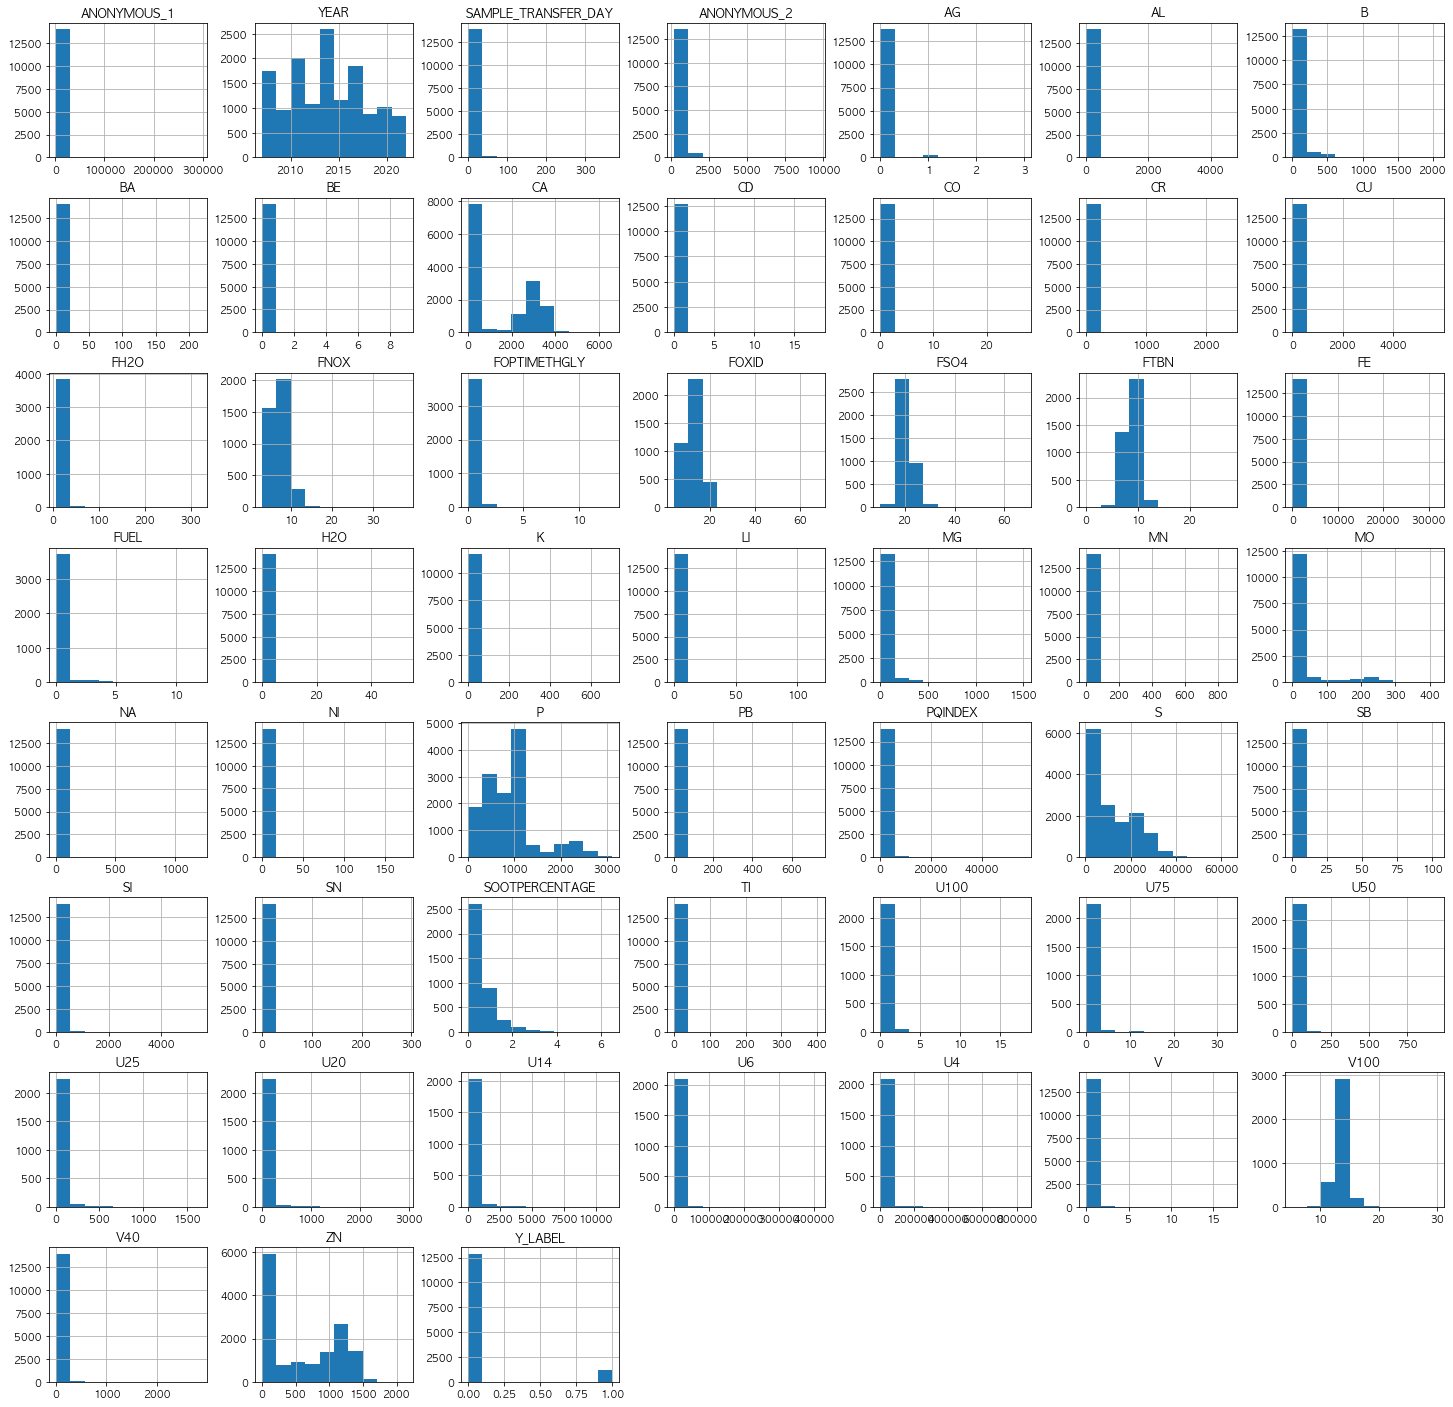

In [10]:
## 분포 확인 
train.hist(figsize=(25,25))
plt.show()

## Train은 너무 많아서 나누어서 분포 재확인 

In [11]:
train_hist1 = train.iloc[:,1:10]
train_hist2 = train.iloc[:,11:21]
train_hist3 = train.iloc[:,22:32]
train_hist4 = train.iloc[:,33:43]
train_hist5 = train.iloc[:,43:54]

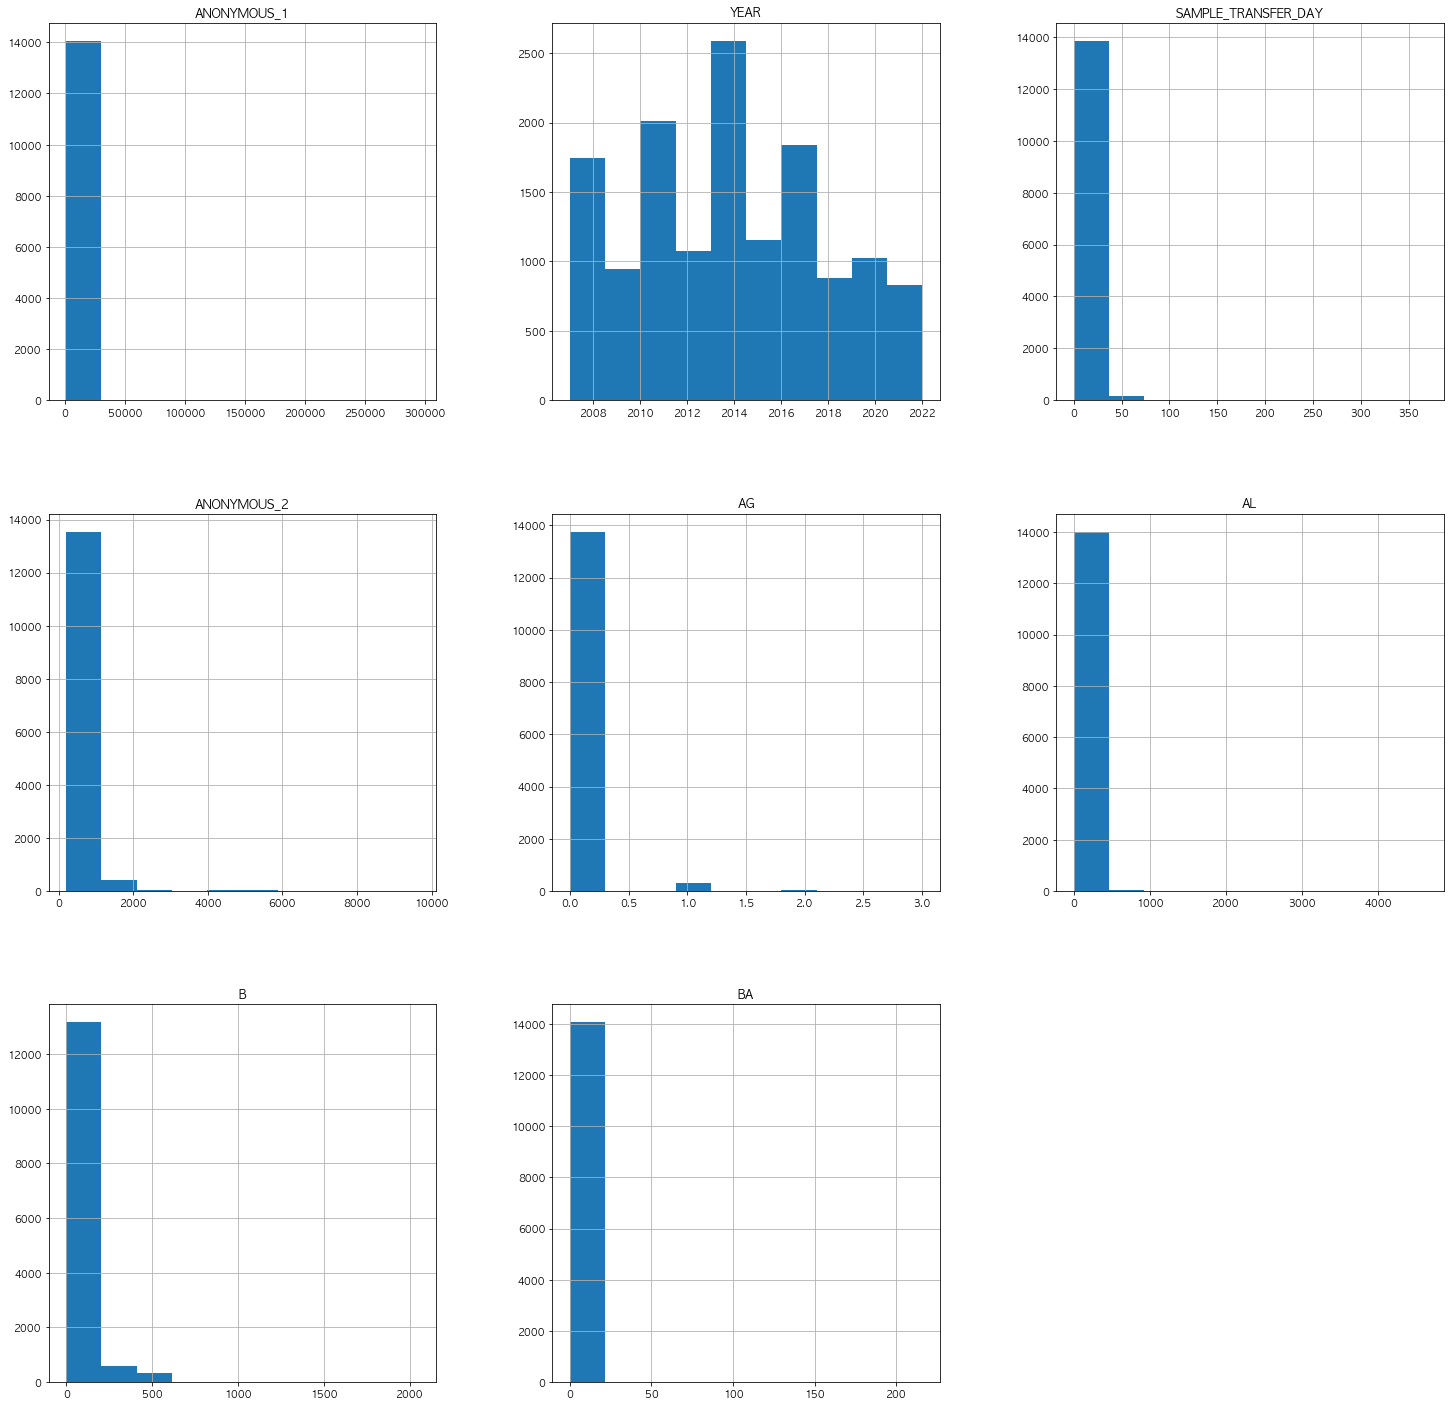

In [12]:
train_hist1.hist(figsize = (25,25))
plt.show()

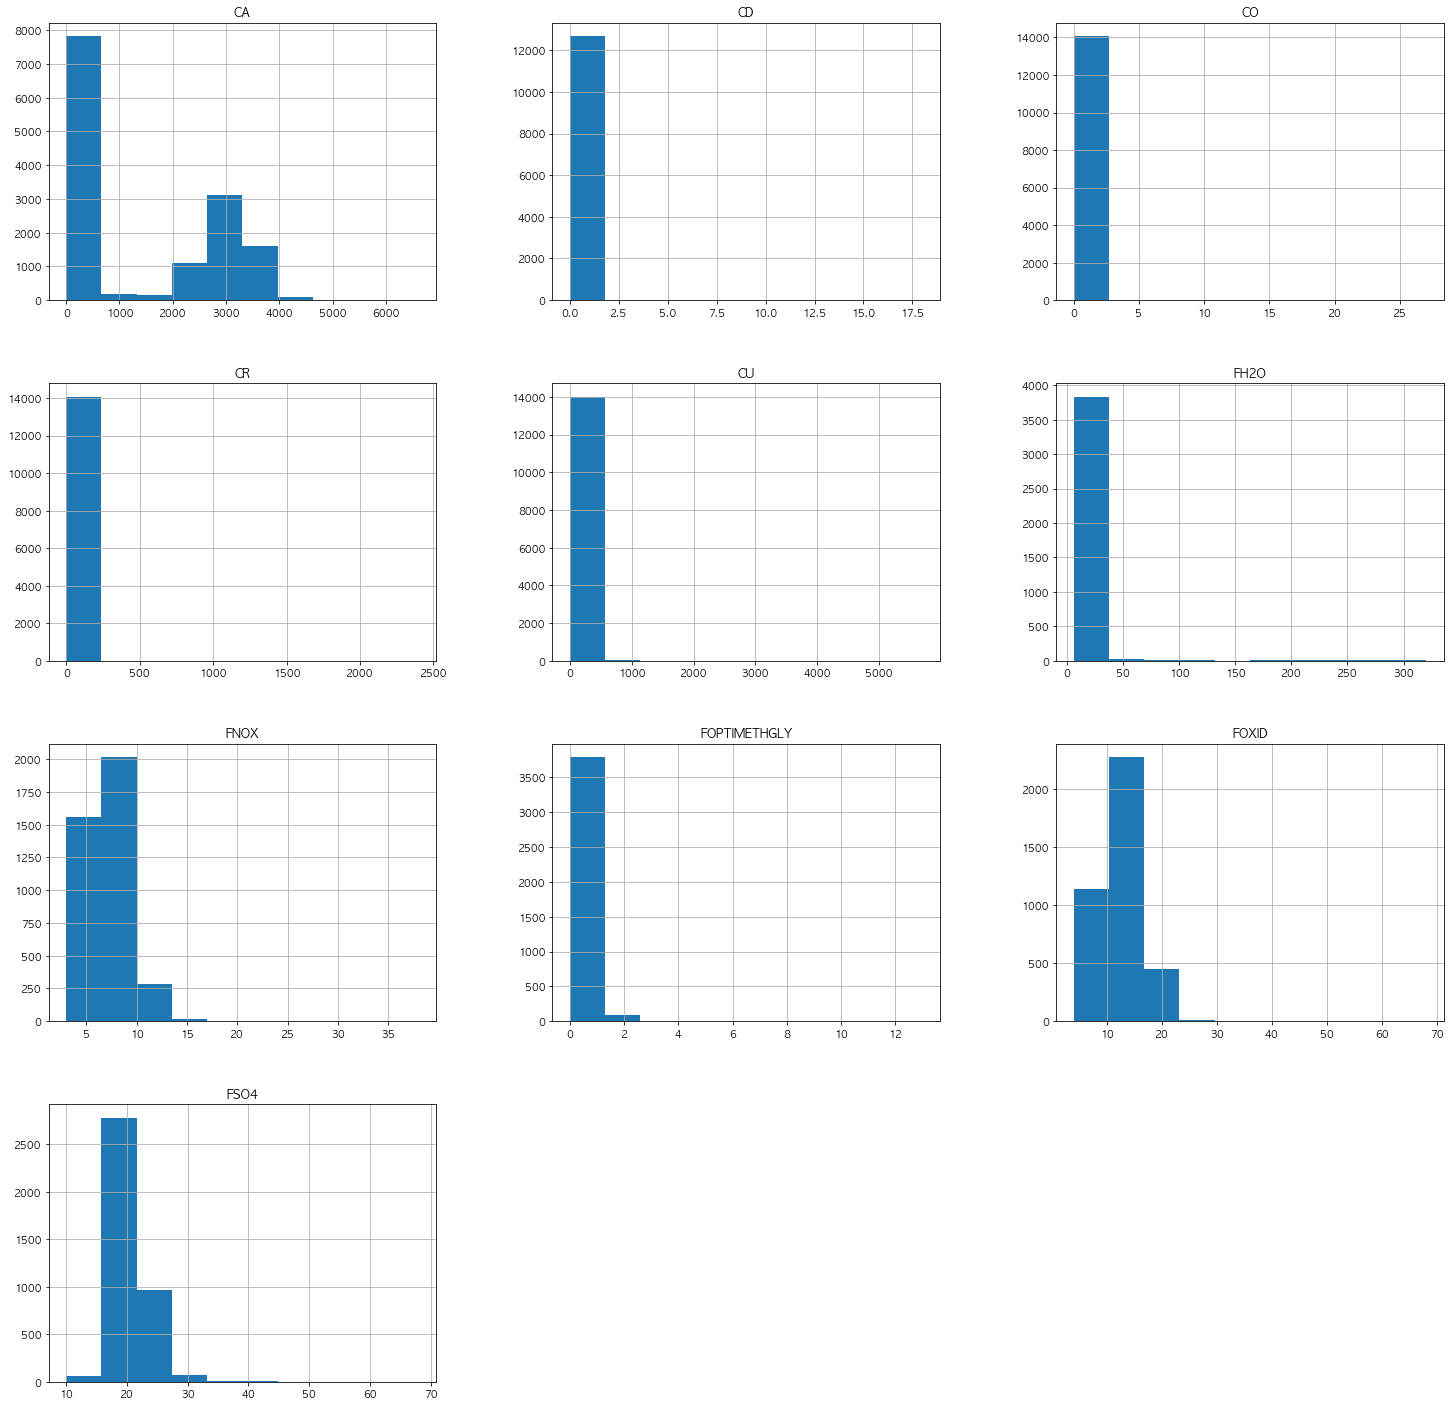

In [13]:
train_hist2.hist(figsize = (25,25))
plt.show()

### Observation
train_hist1의 데이터 중 원소들은 대부분 일정한 분포를 그리고 있음. CU와 FH20 처럼 약간의 이상치를 보이고 있는 값이 있어 전처리가 필요한 것 같음. 
FSO4, FTBN의 값의 분포는 쌍봉낙타 분포를 이루고 있음. 자세한 전처리 및 EDA가 필요해보임.

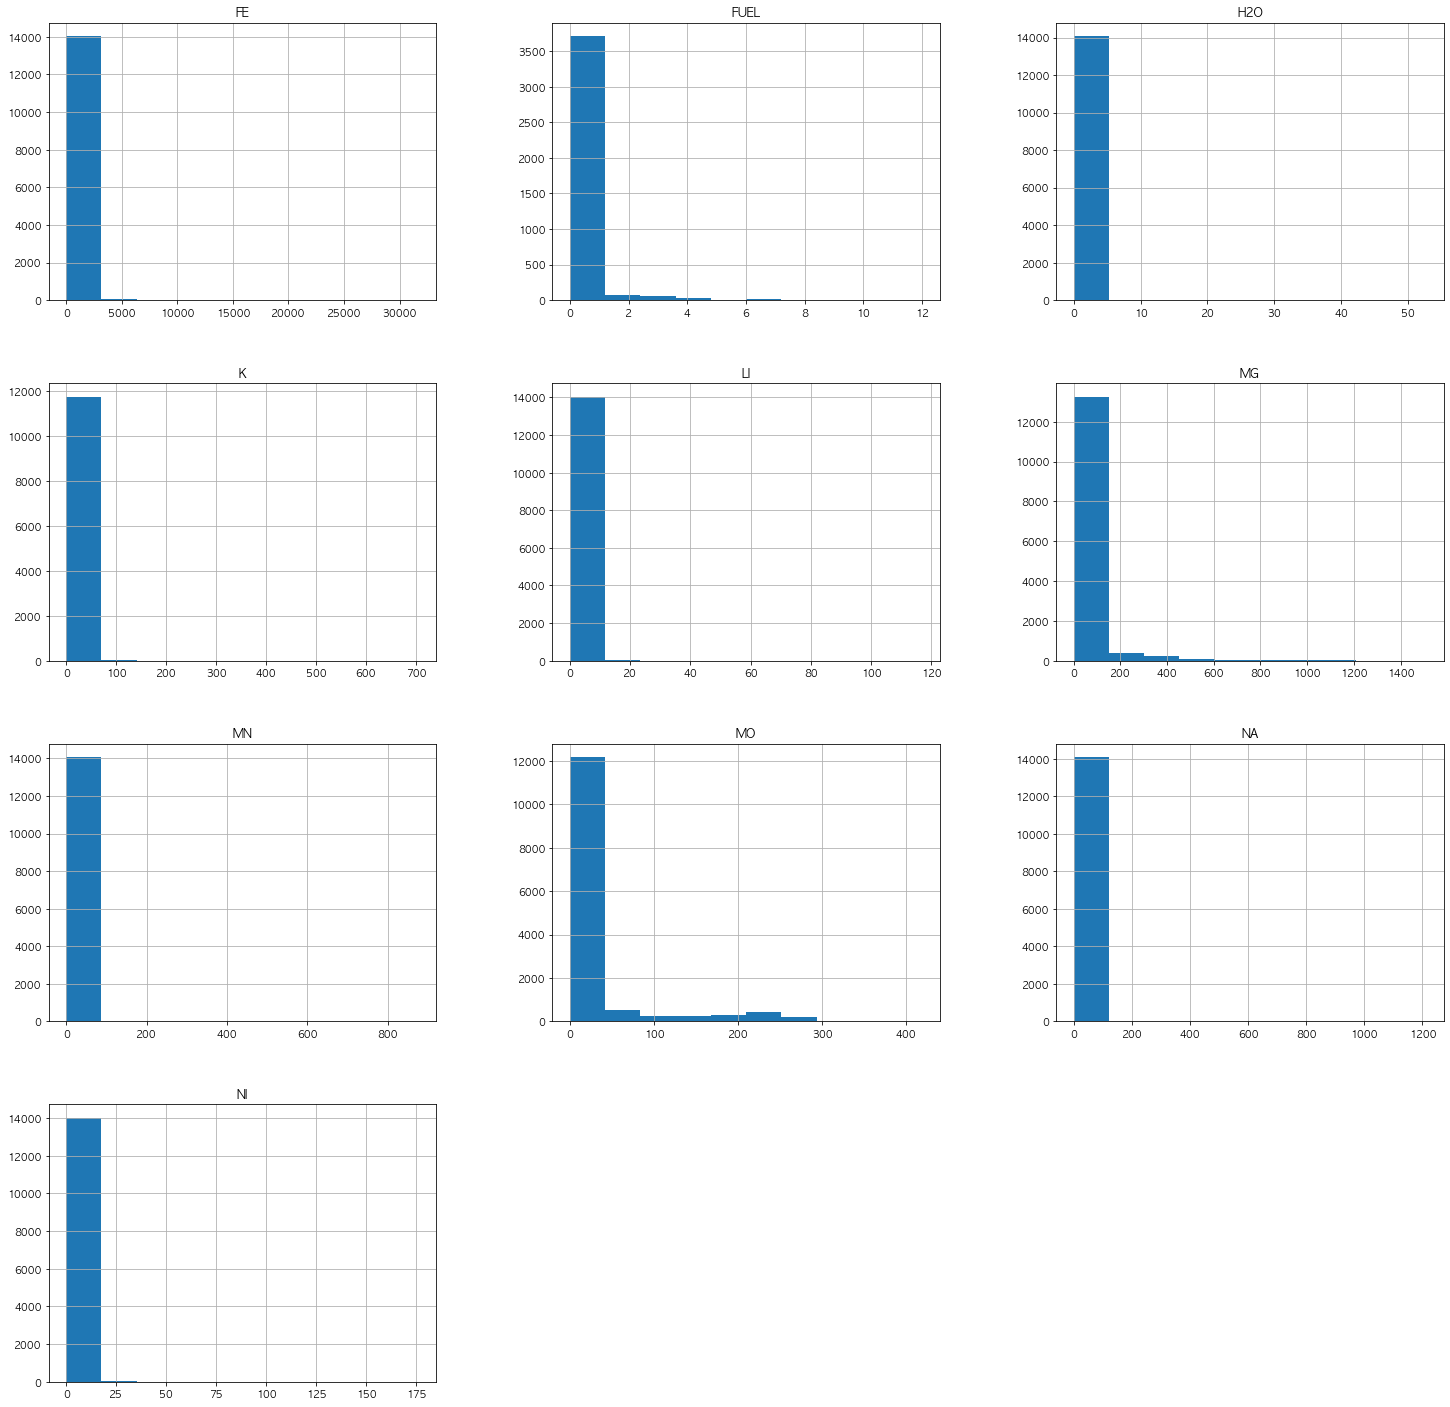

In [14]:
train_hist3.hist(figsize = (25,25))
plt.show()

### observation 
train_hist2의 데이터 값 중 mg, MO, NI, 등 이상치가 있는 값이 있으나 분포는 대부분 특정 범위에 모여있는 걸 확인 할 수 있었음. 
다만, P(인)의 경우에는 분포가 일정하지 않아 EDA가 필요해보임. 
개인적으로는 원소들의 분포 차이가 나는 것이 중요한 Key Feature 같아 보임. 인에 따라 입자 크기의 차이 및 오일 상태 정상여부 EDA 필요.

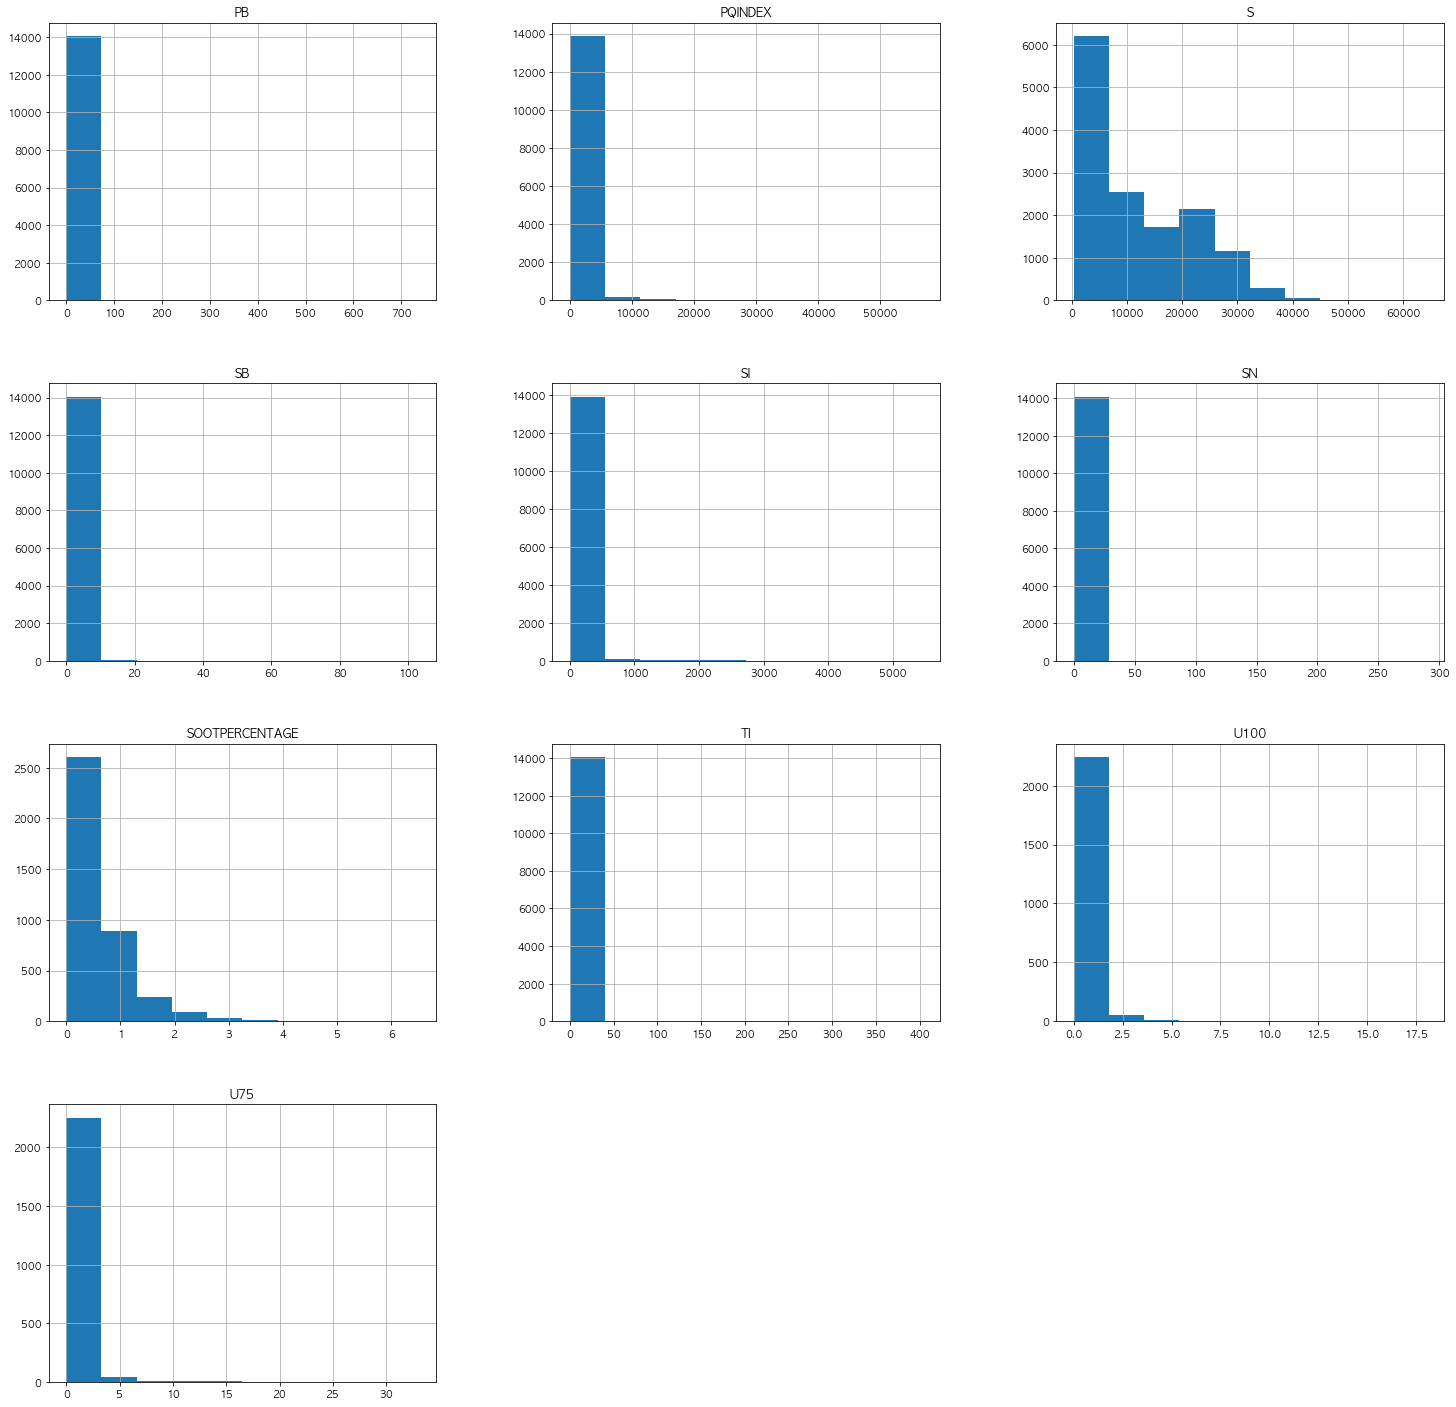

In [15]:
train_hist4.hist(figsize = (25,25))
plt.show()

### Observation
원소들의 분포는 다 일정. 다만 S(Sulfur)의 경우네는 그래프가 하향선을 그리고 있음. 
오일 상태 정상 여부에 따른 EDA를 진행하여 조금 더 자세히 보아야할 것 같음. 

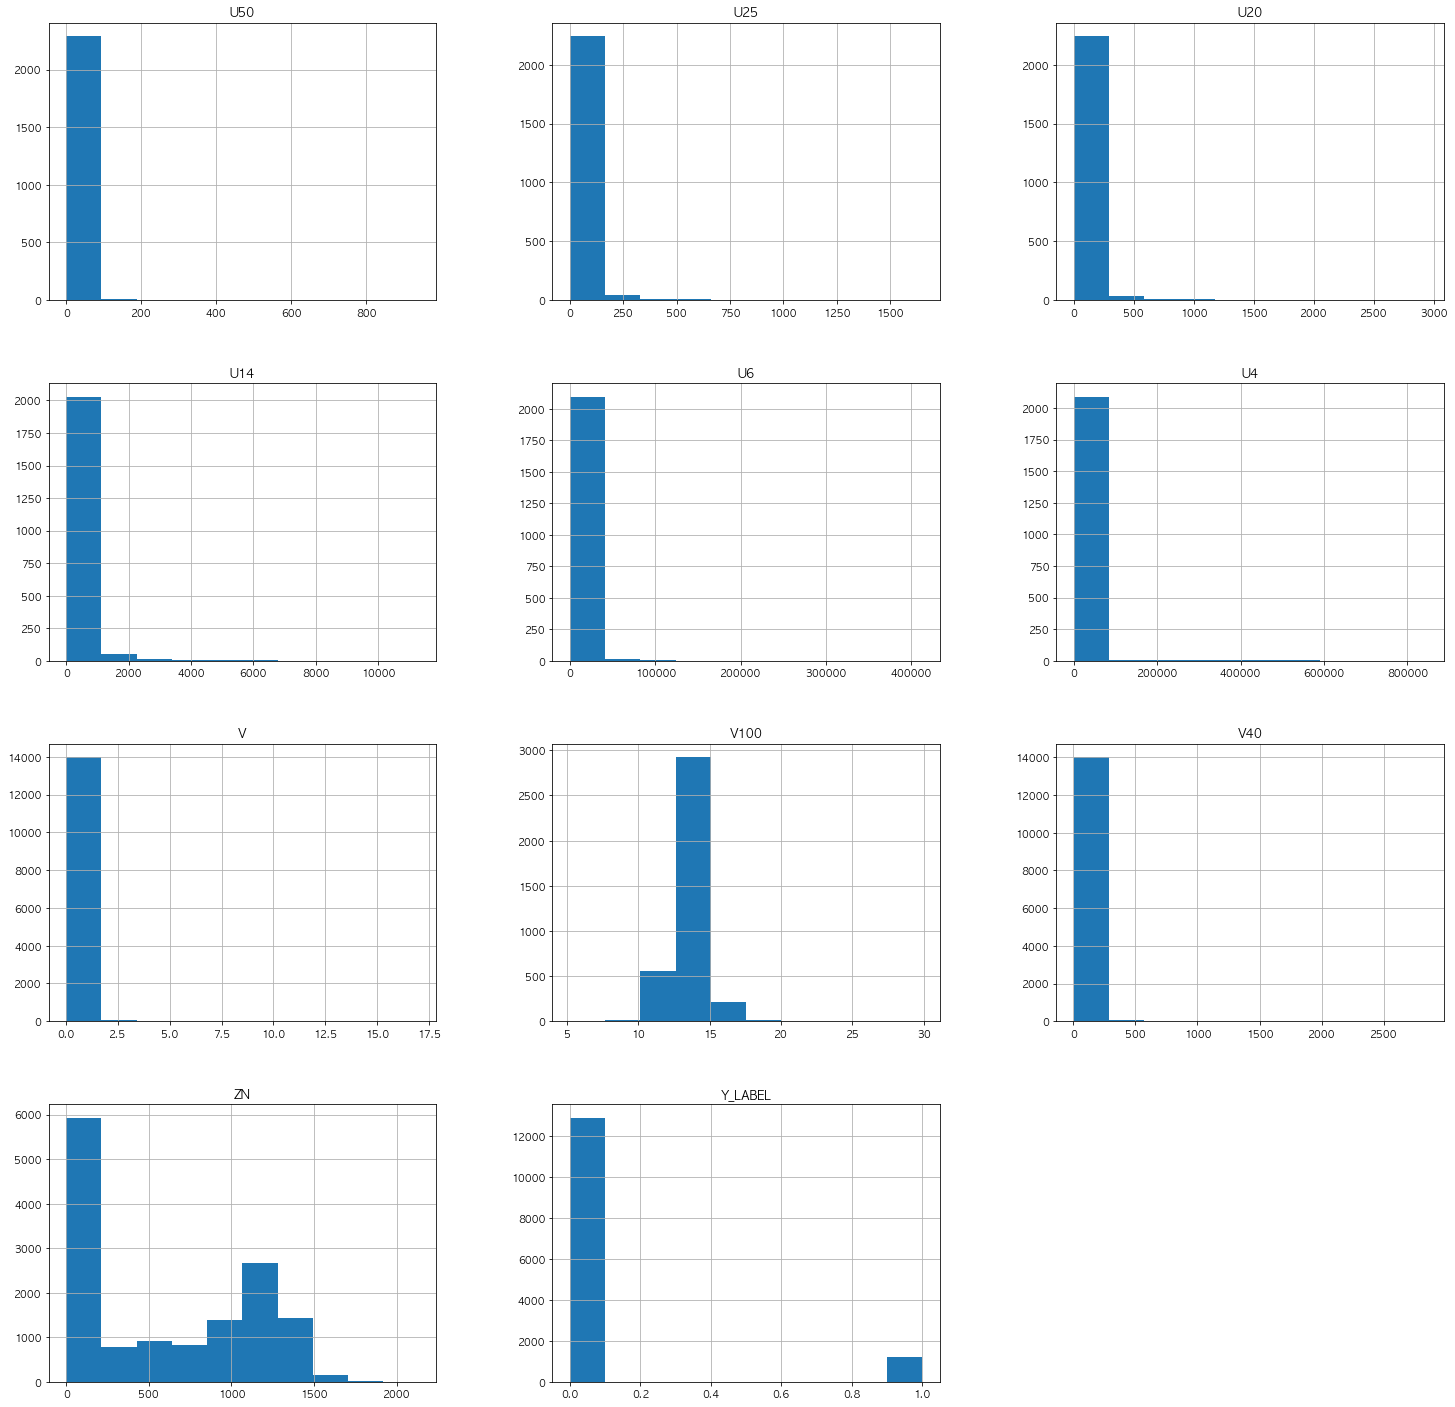

In [16]:
train_hist5.hist(figsize = (25,25))
plt.show()

### Observation
다른 데이터들 또한 일정한 분포를 이루고 있으나 ZN의 함유량의 분포가 일정하지 않음. EDA로 확인 필요
V100 또한 분포가 쌍봉임. 이상치인지 확인이 필요해보임. 

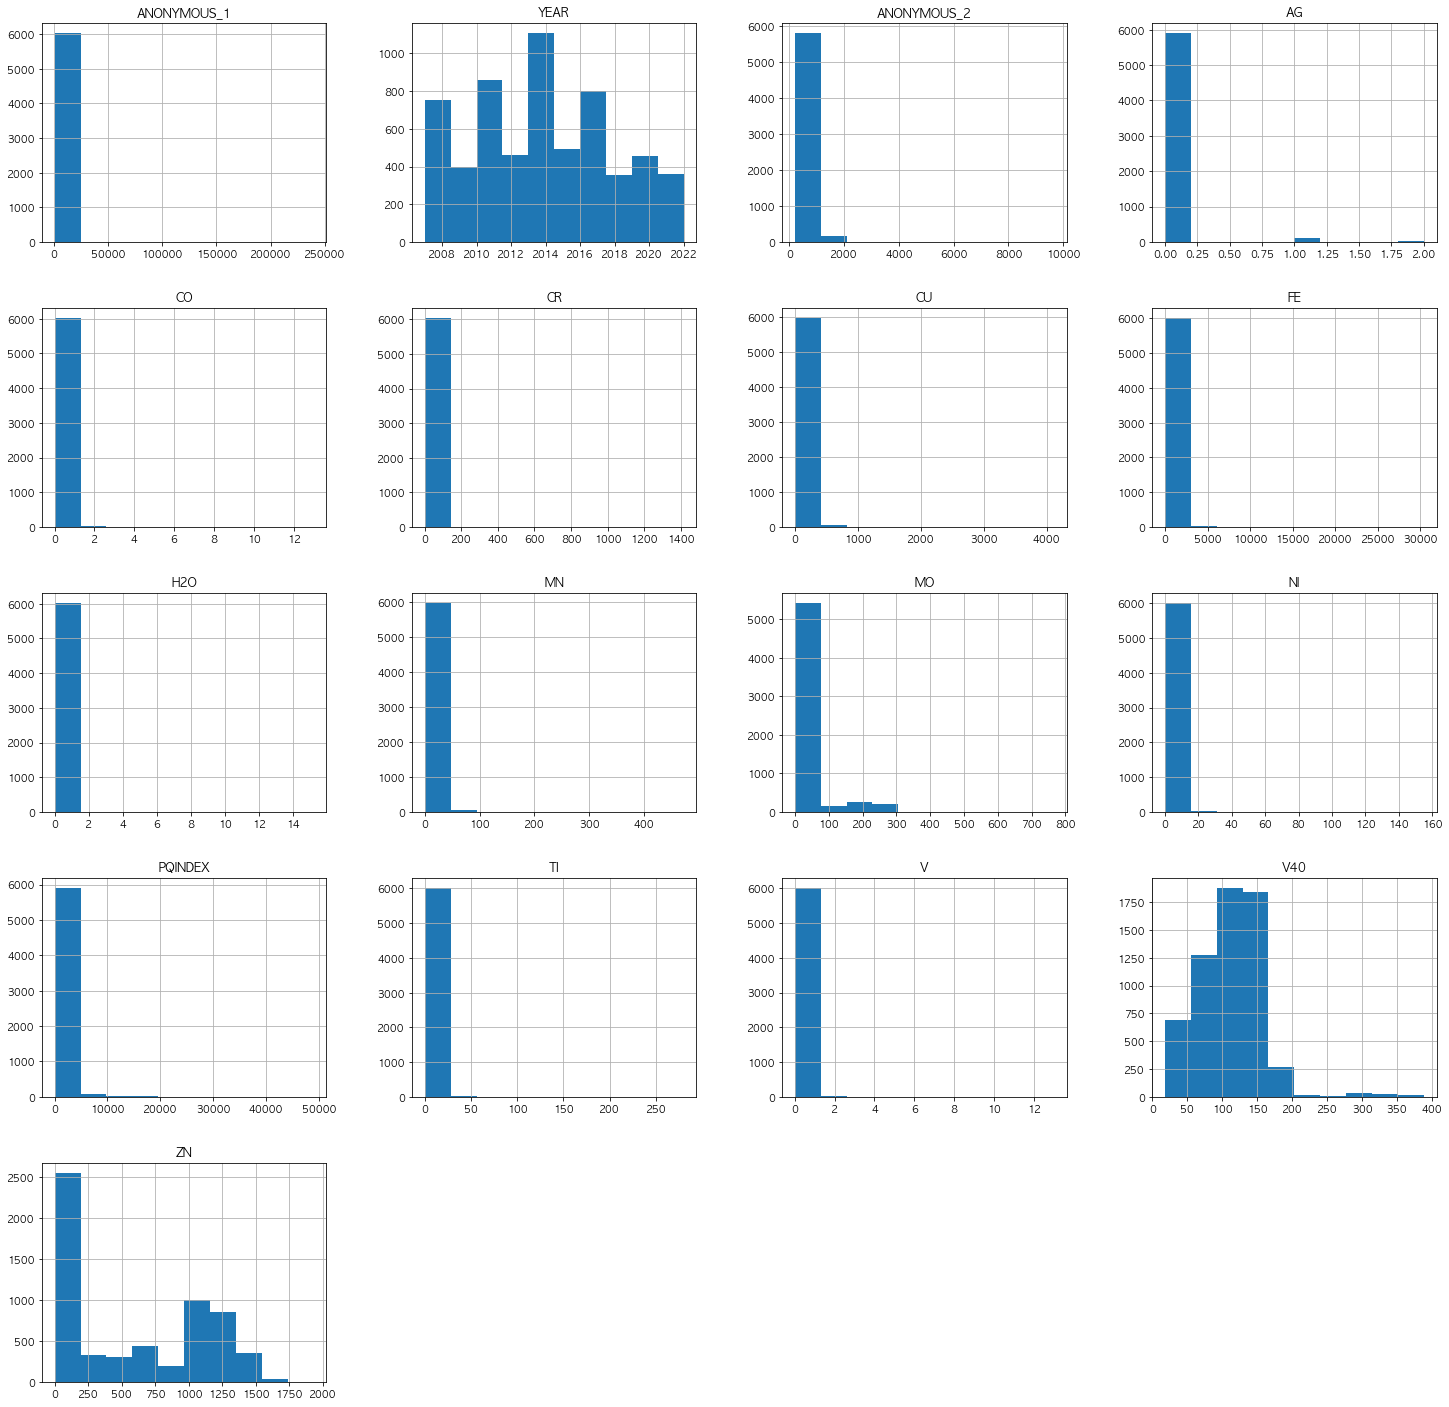

In [17]:
test.hist(figsize = (25,25))
plt.show()

# 간단한 전처리

## 결측치 제거 

In [18]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [19]:
train.info() #각 컬럼의 행 개수가 달라서 결측치가 생기는 것이었음. 각 결측치는 0으로 대체. 
train.replace(np.nan,0,inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [20]:
train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
SAMPLE_TRANSFER_DAY    0
ANONYMOUS_2            0
AG                     0
AL                     0
B                      0
BA                     0
BE                     0
CA                     0
CD                     0
CO                     0
CR                     0
CU                     0
FH2O                   0
FNOX                   0
FOPTIMETHGLY           0
FOXID                  0
FSO4                   0
FTBN                   0
FE                     0
FUEL                   0
H2O                    0
K                      0
LI                     0
MG                     0
MN                     0
MO                     0
NA                     0
NI                     0
P                      0
PB                     0
PQINDEX                0
S                      0
SB                     0
SI                     0
SN                     0
SOOTPERCENTAGE         0


# 범주형 변수 전처리 

## Component 전처리

In [21]:
train['COMPONENT_ARBITRARY'].unique()

array(['COMPONENT3', 'COMPONENT2', 'COMPONENT1', 'COMPONENT4'],
      dtype=object)

In [22]:
component = {'COMPONENT1': 1, 'COMPONENT2': 2, 'COMPONENT3':3, 'COMPONENT4':4}

In [23]:
#Component도 그저 1,2,3처럼 범주형 변수임. heatmap 표현을 위해 1,2,3으로 전처리 
train_sample = train
train_sample['Component'] = train_sample['COMPONENT_ARBITRARY'].map(component)
train_sample.drop(['COMPONENT_ARBITRARY'],axis = 1,inplace = True)
train_sample

,ID,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL,Component
0,TRAIN_00000,1486,2011,7,200,0,3,93,0,0,...,0.0,0.0,0.0,0.0,0,0.0,154.0,75,0,3
1,TRAIN_00001,1350,2021,51,375,0,2,19,0,0,...,4.0,6.0,216.0,1454.0,0,0.0,44.0,652,0,2
2,TRAIN_00002,2415,2015,2,200,0,110,1,1,0,...,3.0,39.0,11261.0,41081.0,0,0.0,72.6,412,1,2
3,TRAIN_00003,7389,2010,2,200,0,8,3,0,0,...,0.0,0.0,0.0,0.0,0,0.0,133.3,7,0,3
4,TRAIN_00004,3954,2015,4,200,0,1,157,0,0,...,0.0,0.0,0.0,0.0,0,0.0,133.1,128,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,1616,2014,8,200,0,2,201,1,0,...,0.0,0.0,0.0,0.0,0,0.0,135.4,16,0,3
14091,TRAIN_14091,2784,2013,2,200,0,3,85,0,0,...,0.0,0.0,0.0,0.0,0,14.5,117.5,1408,0,1
14092,TRAIN_14092,1788,2008,9,550,0,6,0,1,0,...,0.0,0.0,0.0,0.0,0,0.0,54.0,1301,0,3
14093,TRAIN_14093,2498,2009,19,550,0,2,4,0,0,...,8.0,100.0,1625.0,18890.0,0,0.0,44.3,652,0,2


In [24]:
#COMPONENT의 순서를 앞으로 변경. 
col1 = train_sample.columns[-1:].to_list()
col2 = train_sample.columns[1:-1].to_list()
#col3 = train_sample.columns[:1].to_list()
new_col = col1 + col2
new_train_sample = train_sample[new_col]
new_train_sample

,Component,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,3,1486,2011,7,200,0,3,93,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,154.0,75,0
1,2,1350,2021,51,375,0,2,19,0,0,...,2.0,4.0,6.0,216.0,1454.0,0,0.0,44.0,652,0
2,2,2415,2015,2,200,0,110,1,1,0,...,0.0,3.0,39.0,11261.0,41081.0,0,0.0,72.6,412,1
3,3,7389,2010,2,200,0,8,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.3,7,0
4,3,3954,2015,4,200,0,1,157,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,3,1616,2014,8,200,0,2,201,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,135.4,16,0
14091,1,2784,2013,2,200,0,3,85,0,0,...,0.0,0.0,0.0,0.0,0.0,0,14.5,117.5,1408,0
14092,3,1788,2008,9,550,0,6,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,54.0,1301,0
14093,2,2498,2009,19,550,0,2,4,0,0,...,7.0,8.0,100.0,1625.0,18890.0,0,0.0,44.3,652,0


In [25]:
train.shape

(14095, 54)

# 각종 수치에 따른 오일 정상 여부 

In [26]:
# 시각화 함수 
def show_plot(data,columns):
    for col in columns:
        plt.figure(figsize=(36,12))
        plt.plot(data[col])
        plt.title(f'{col}', fontsize=40)
        plt.tight_layout()

##  각종 수치

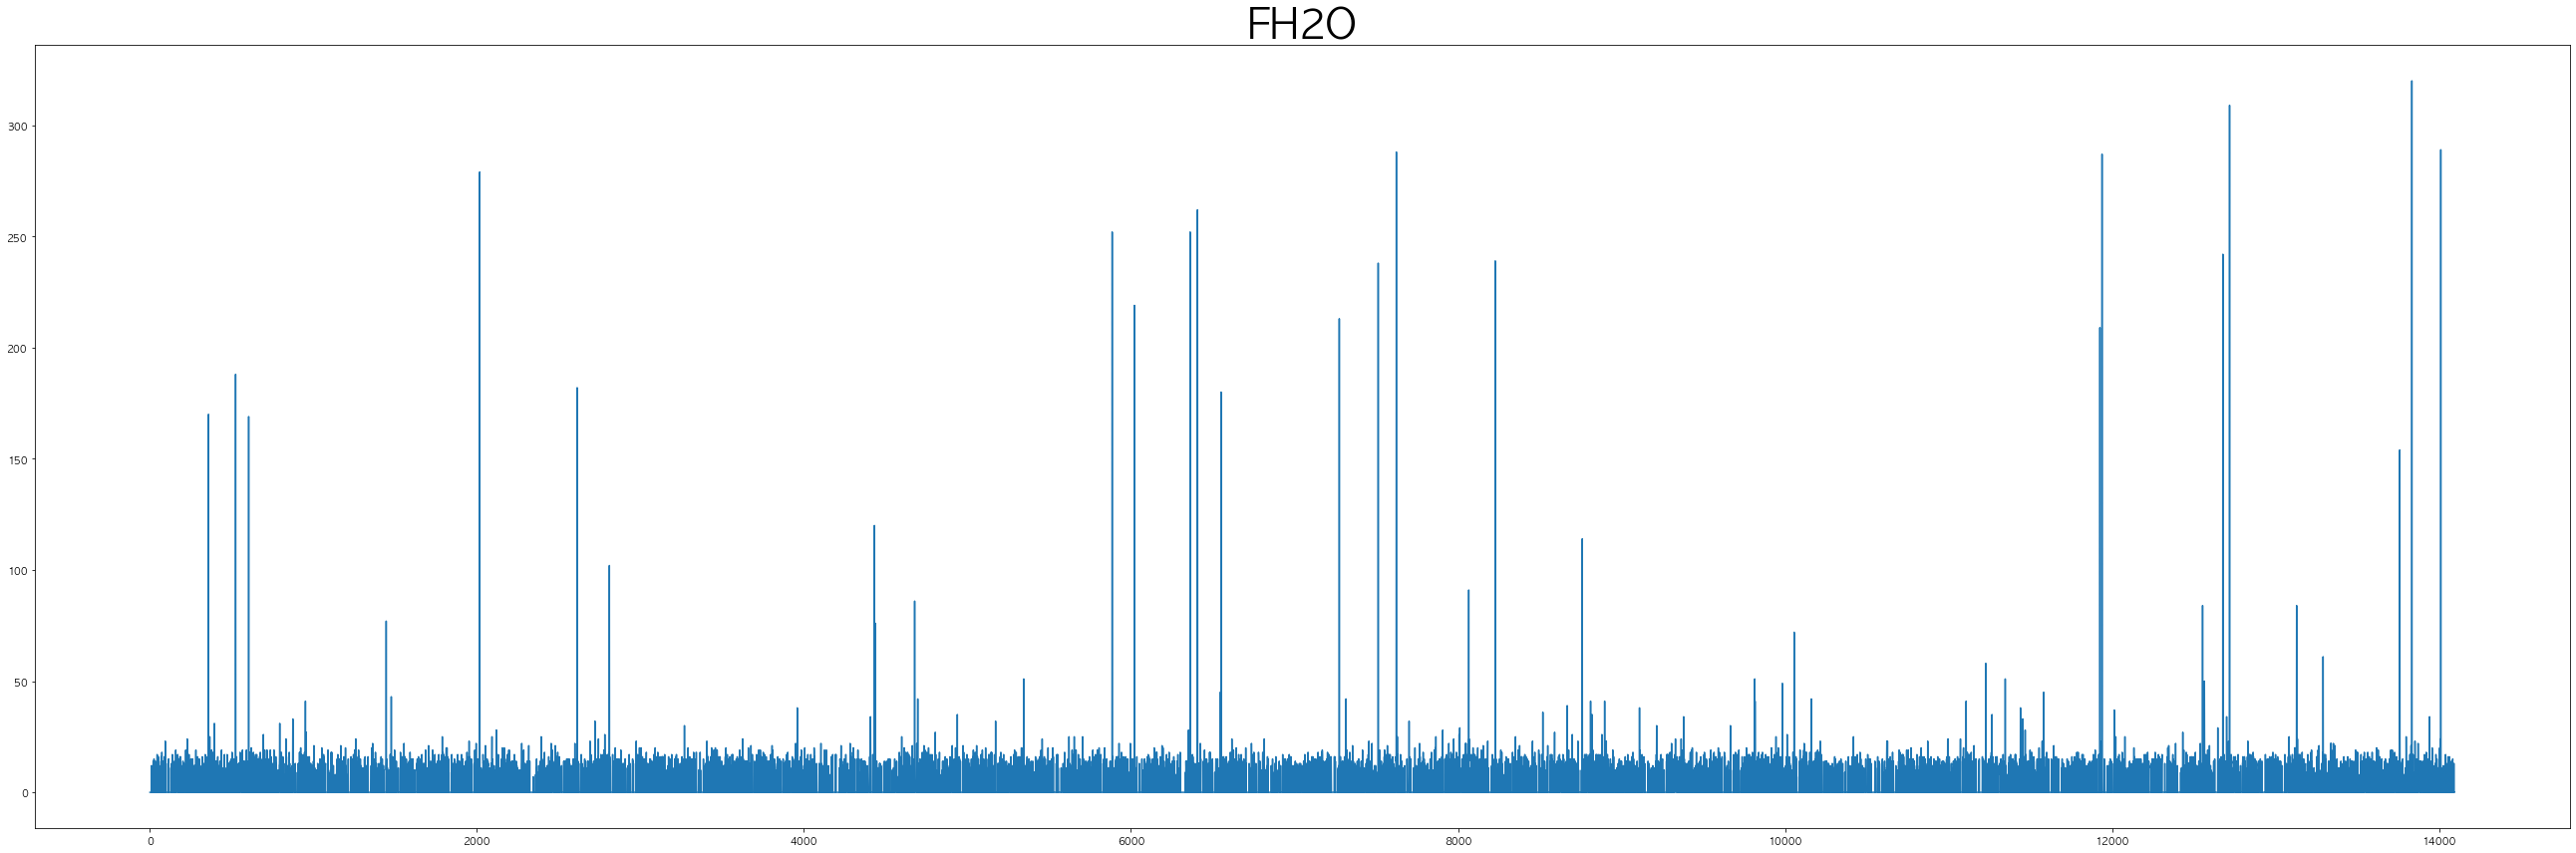

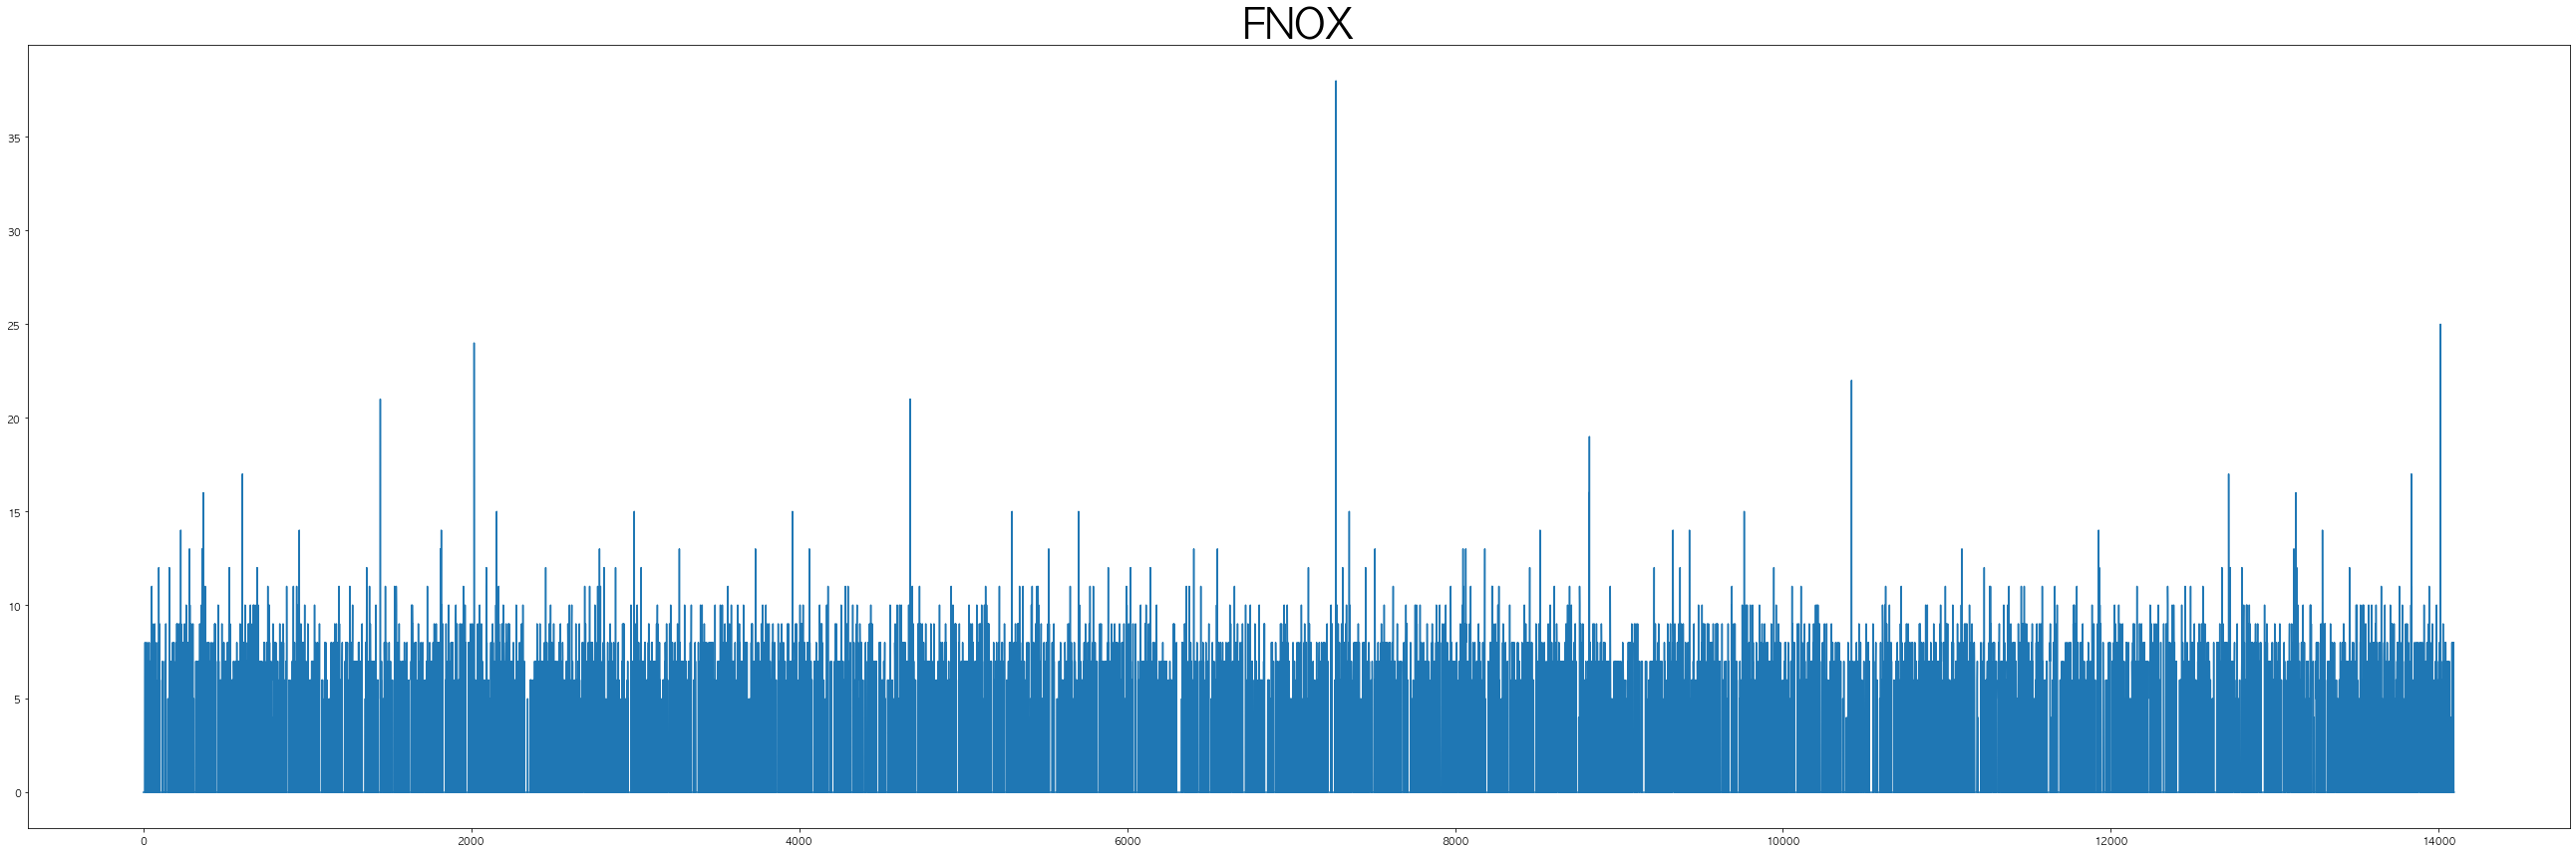

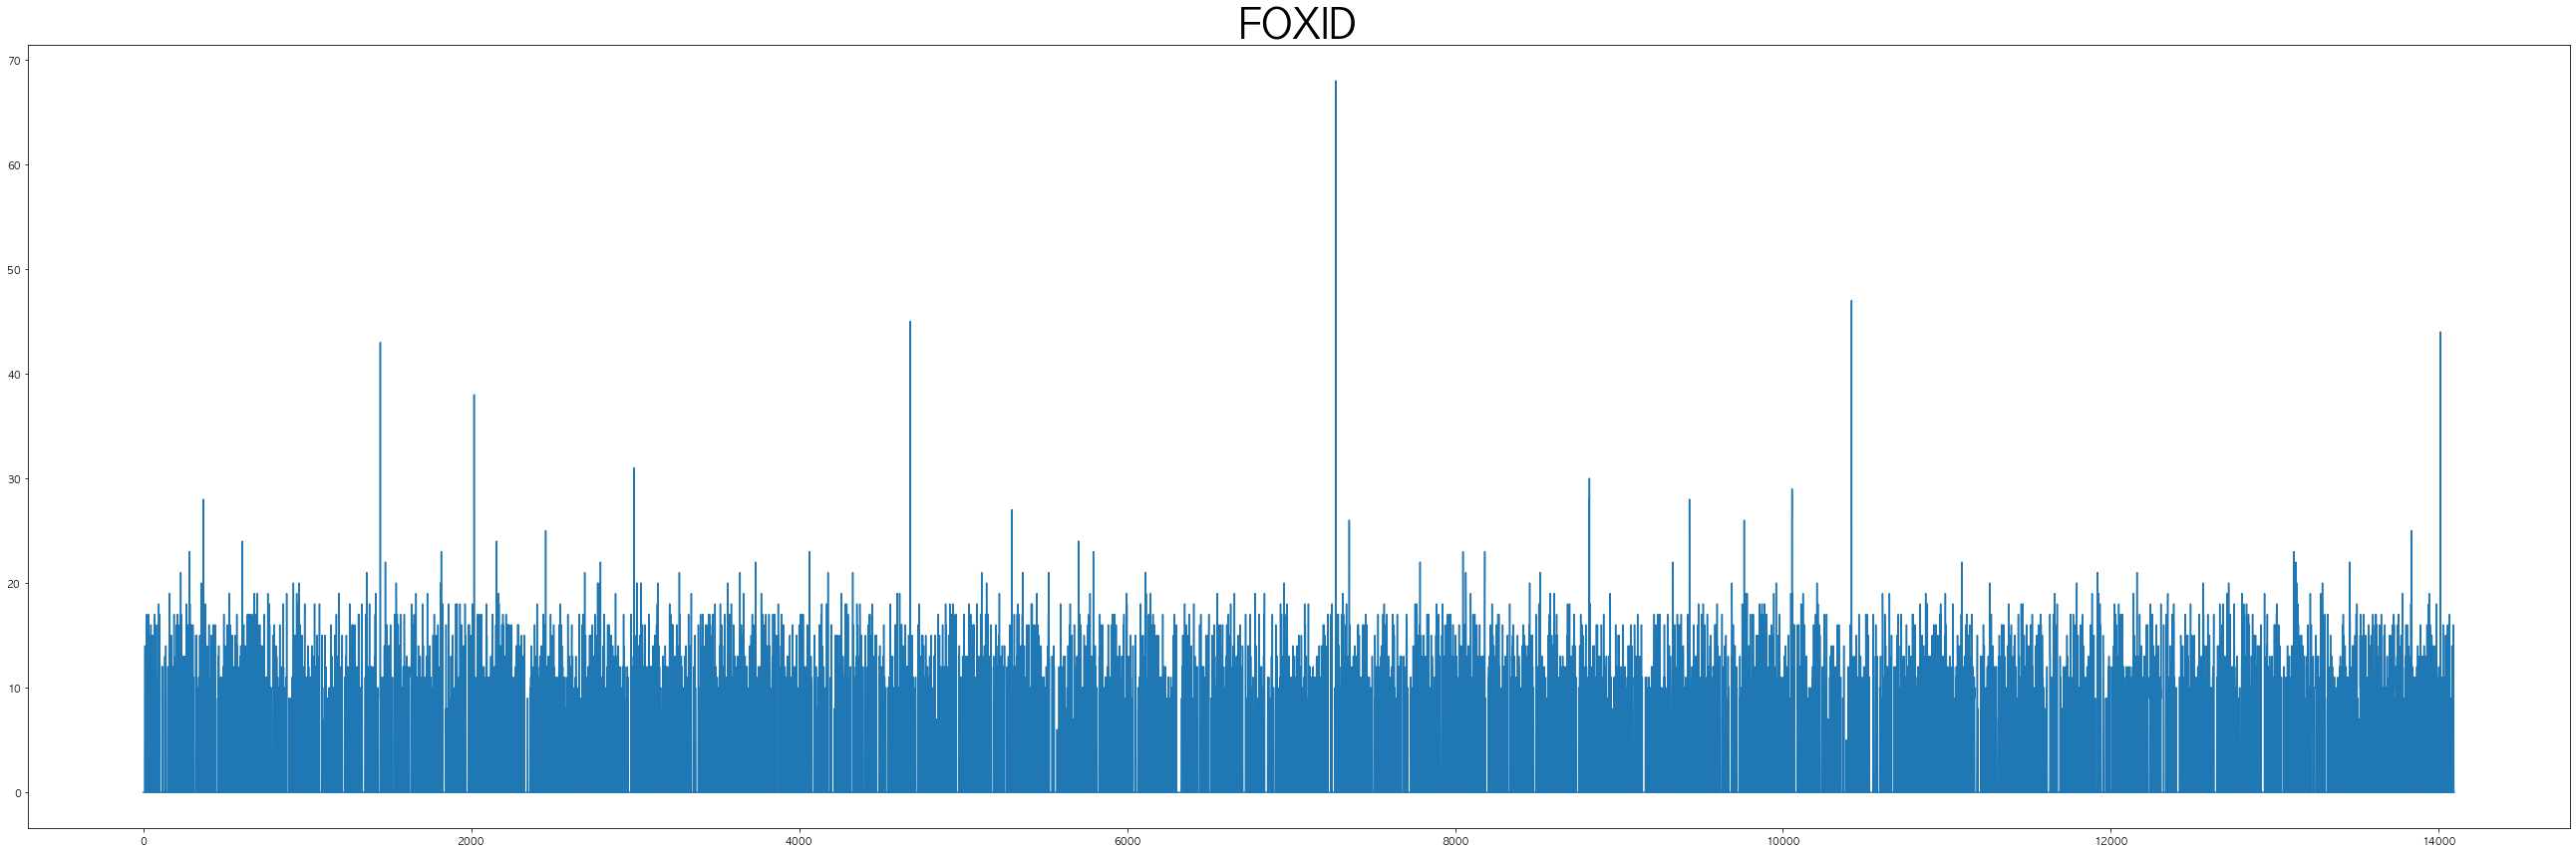

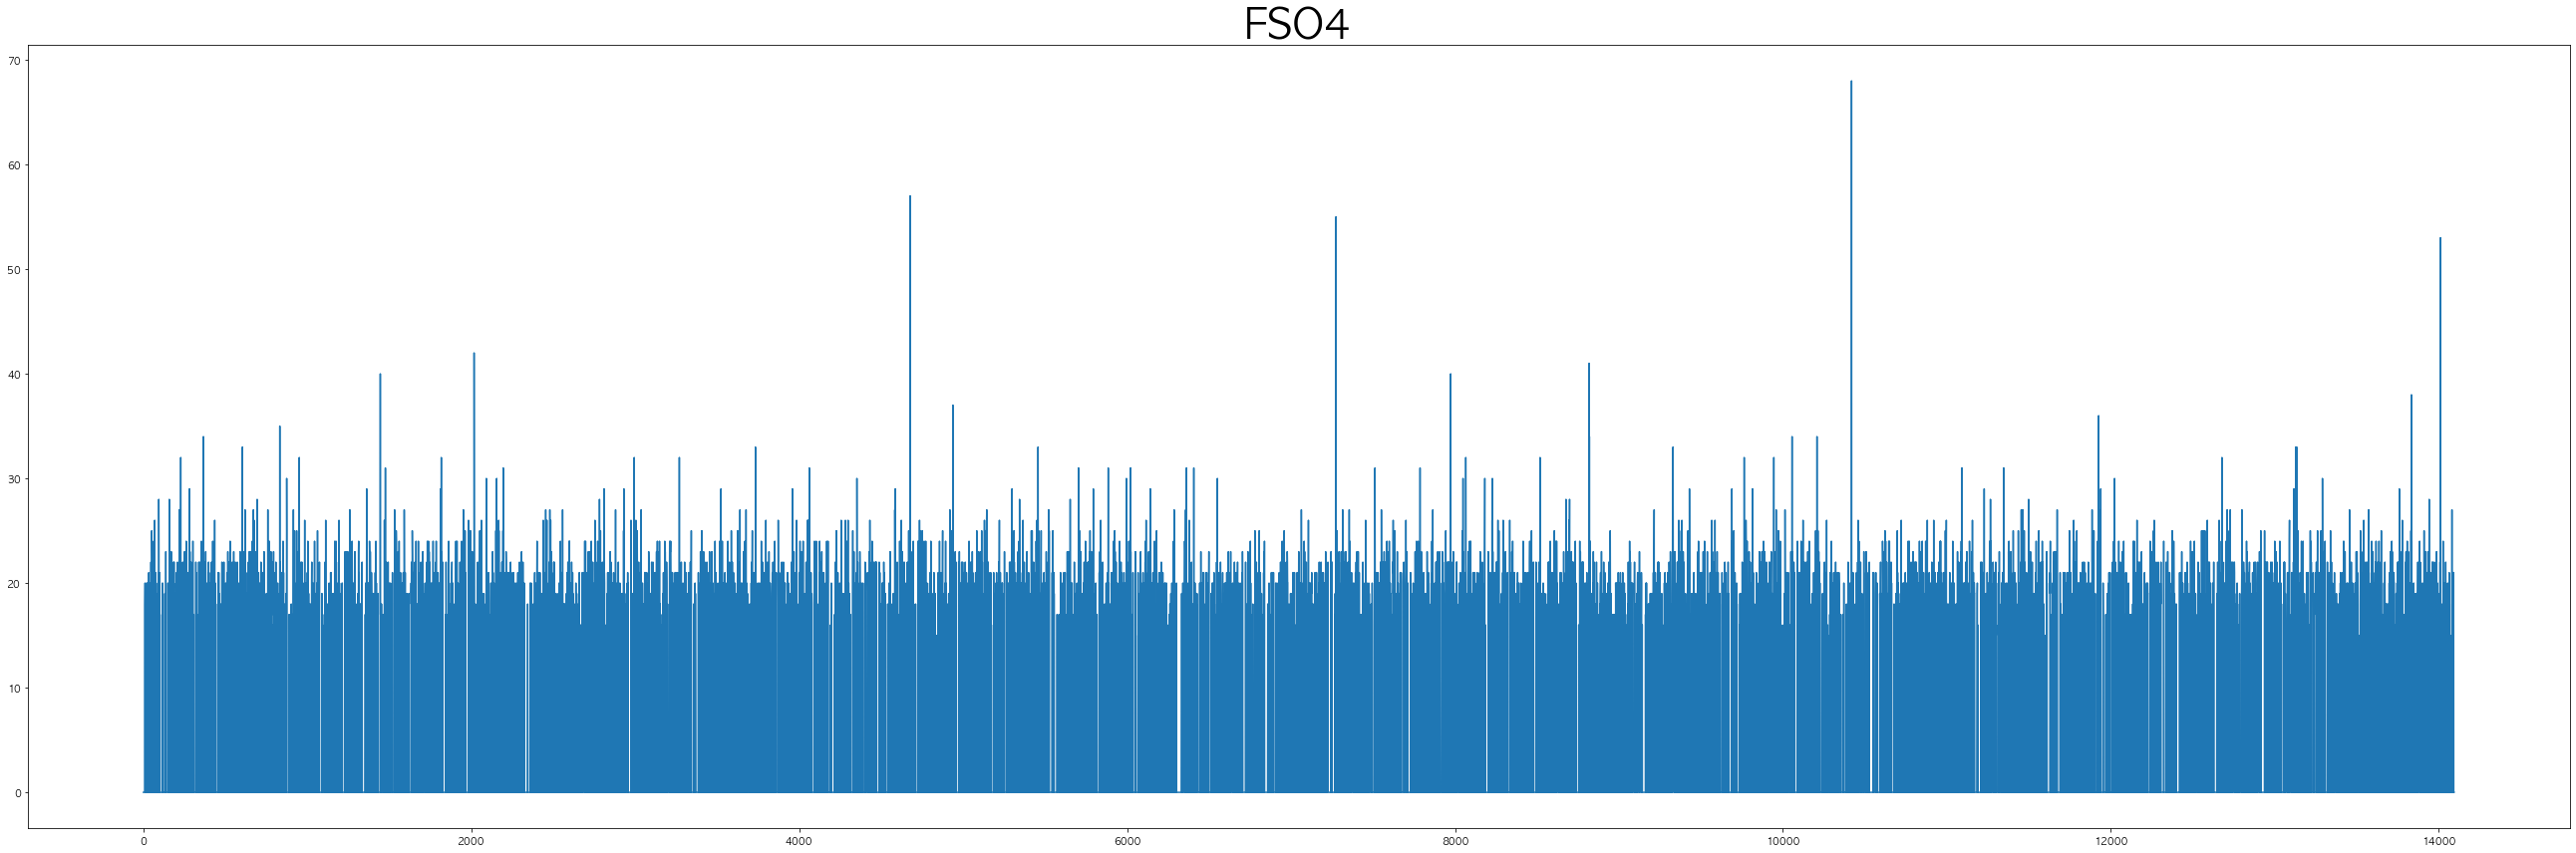

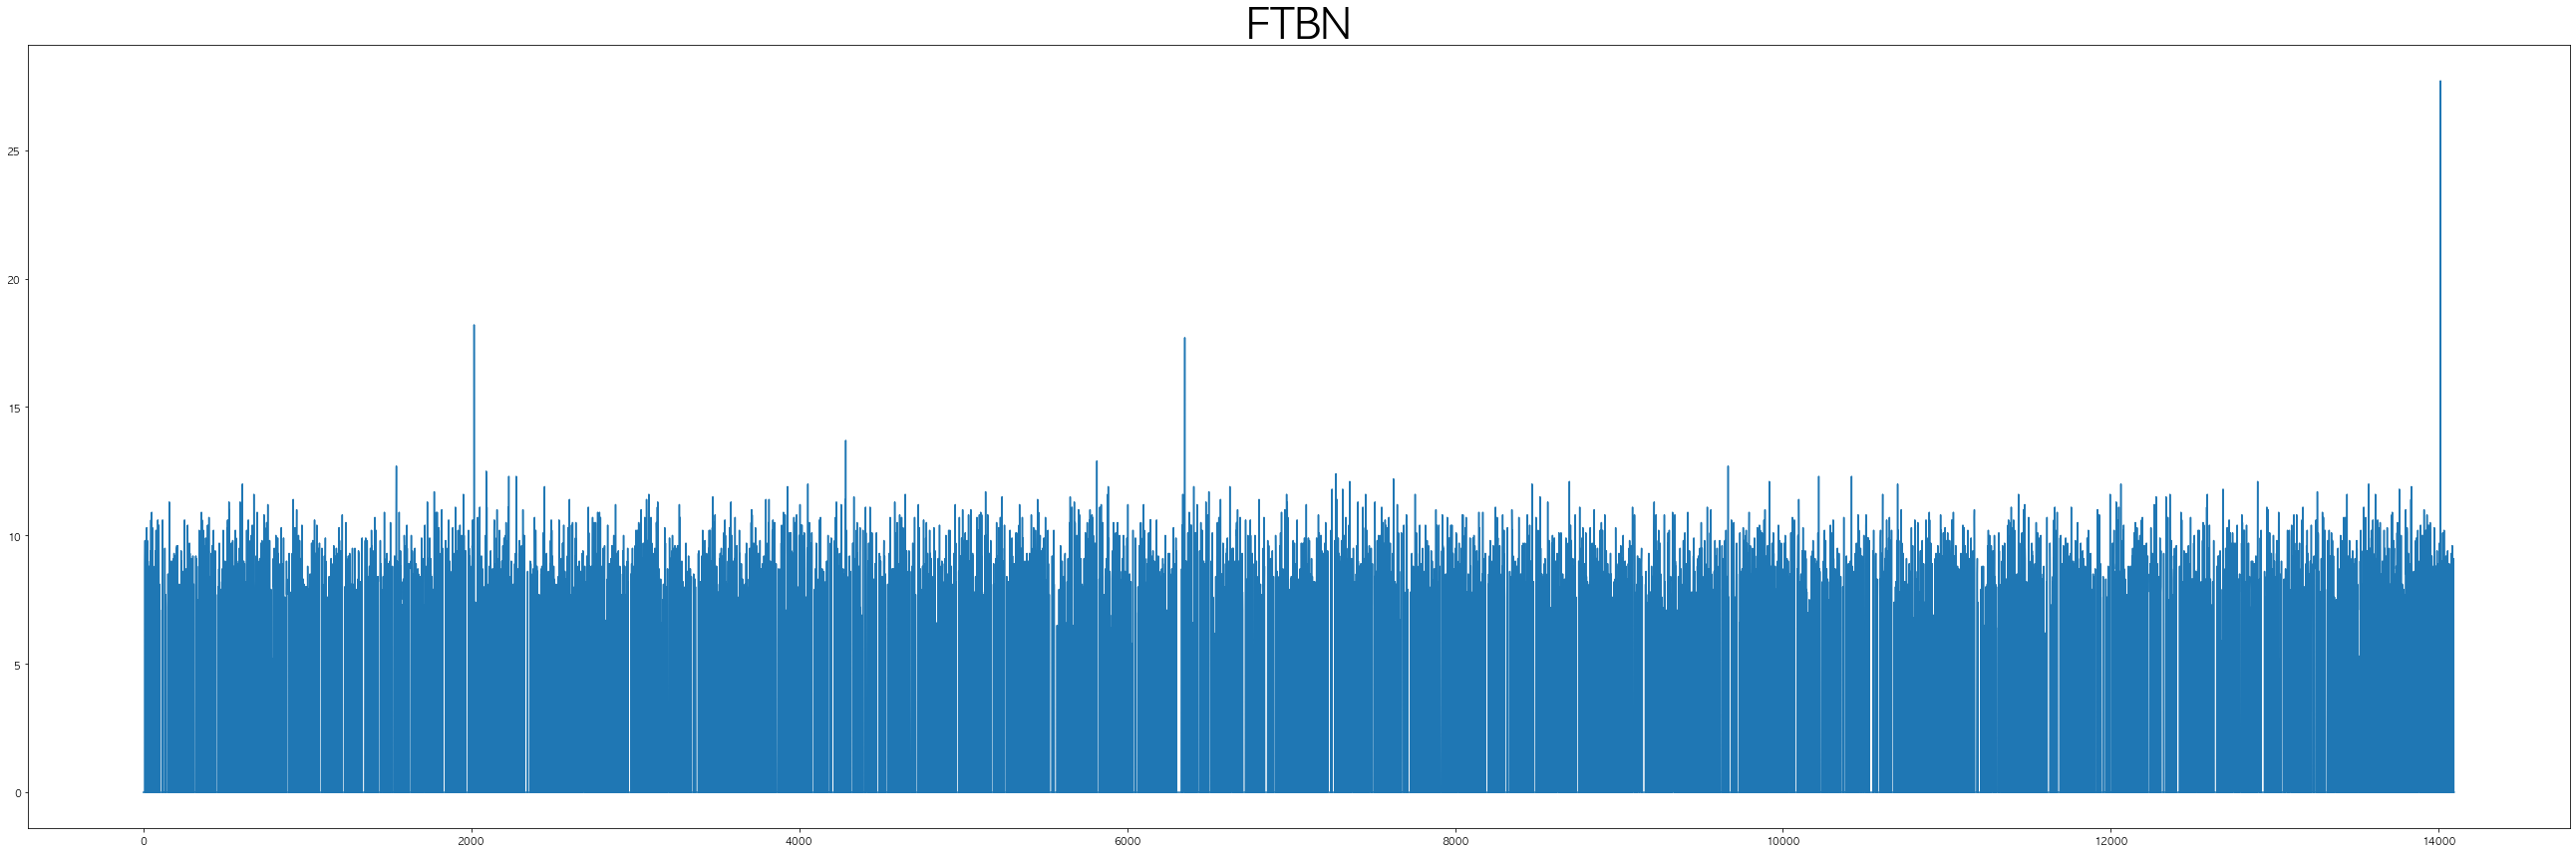

In [27]:
show_plot(train_sample,['FH2O','FNOX','FOXID','FSO4','FTBN'] )

### Observation
#### 각 수치에 따른 편차는 보이지 않음.

# 원소 함유량에 따른 오일 정상 여부

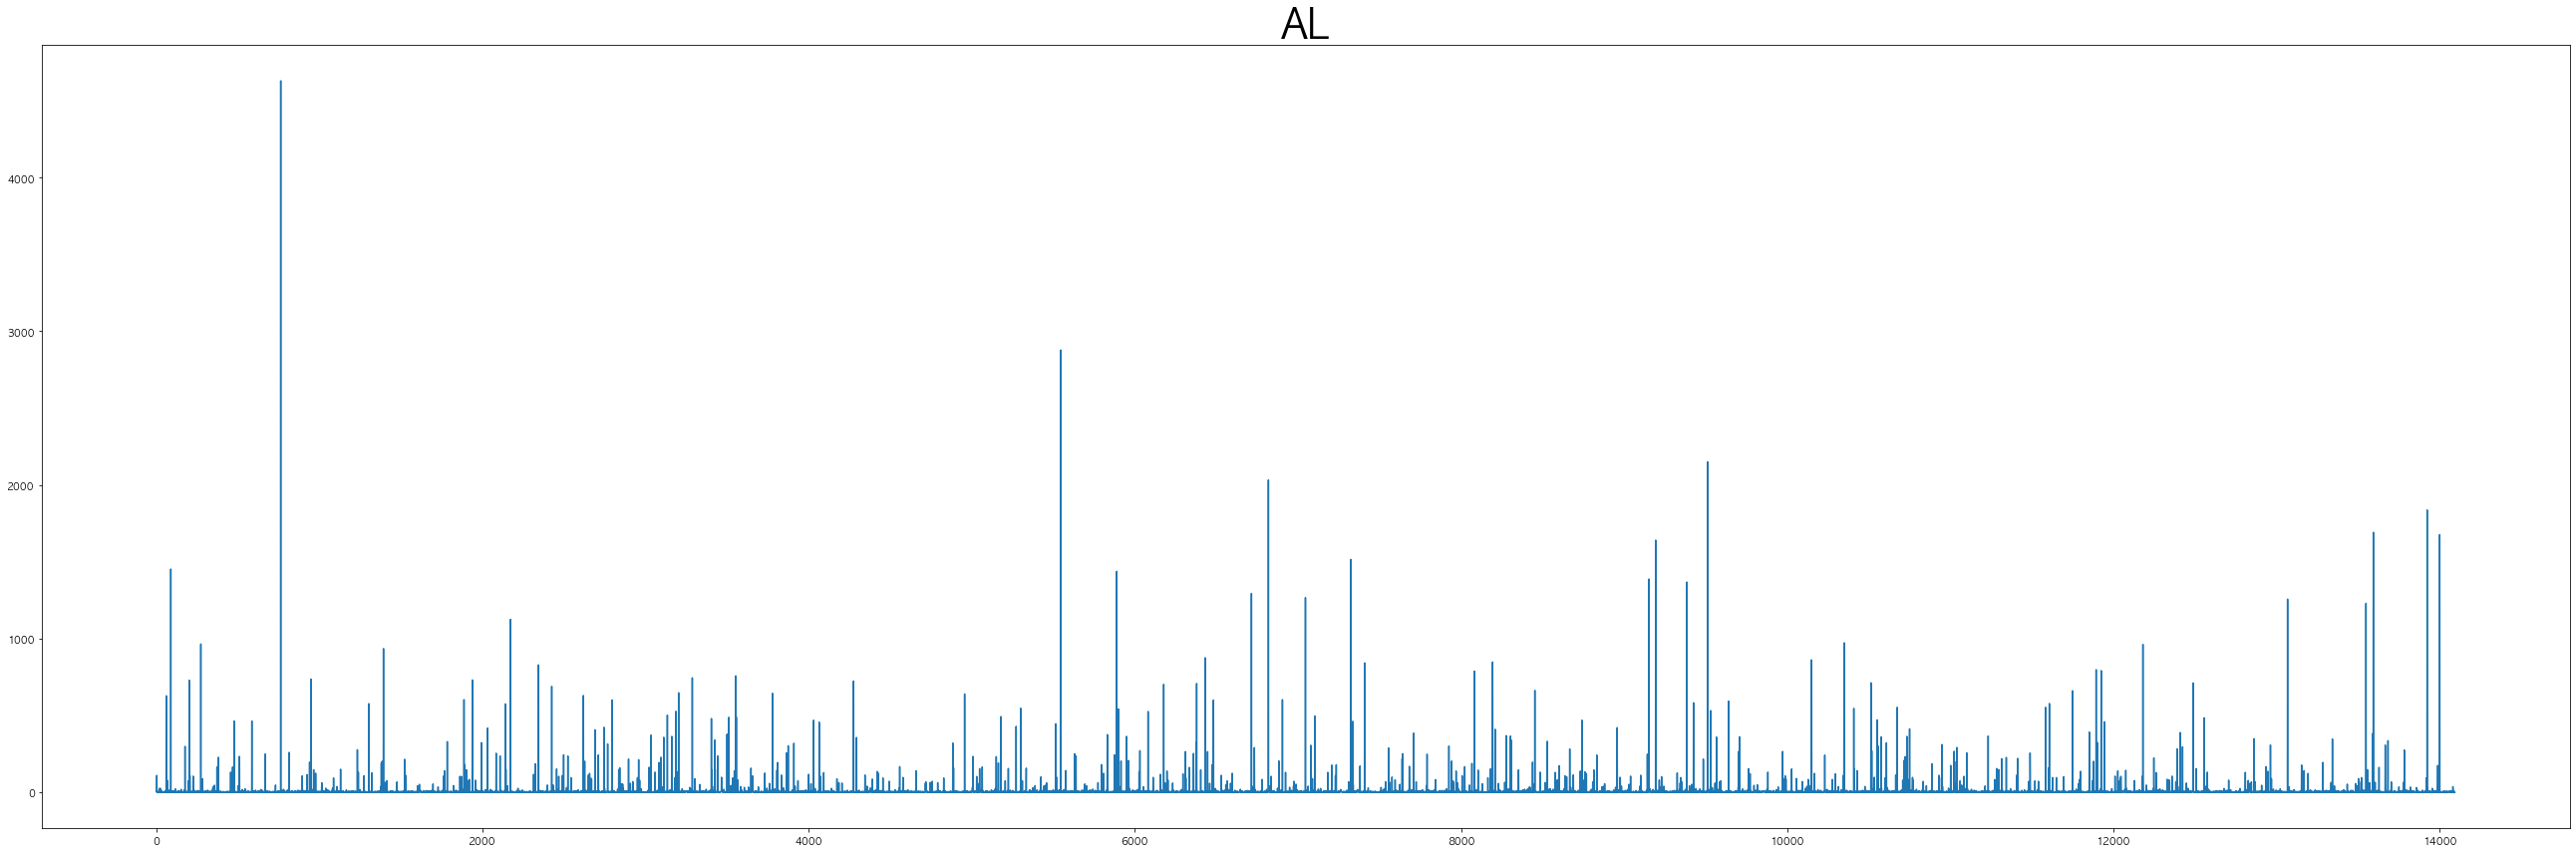

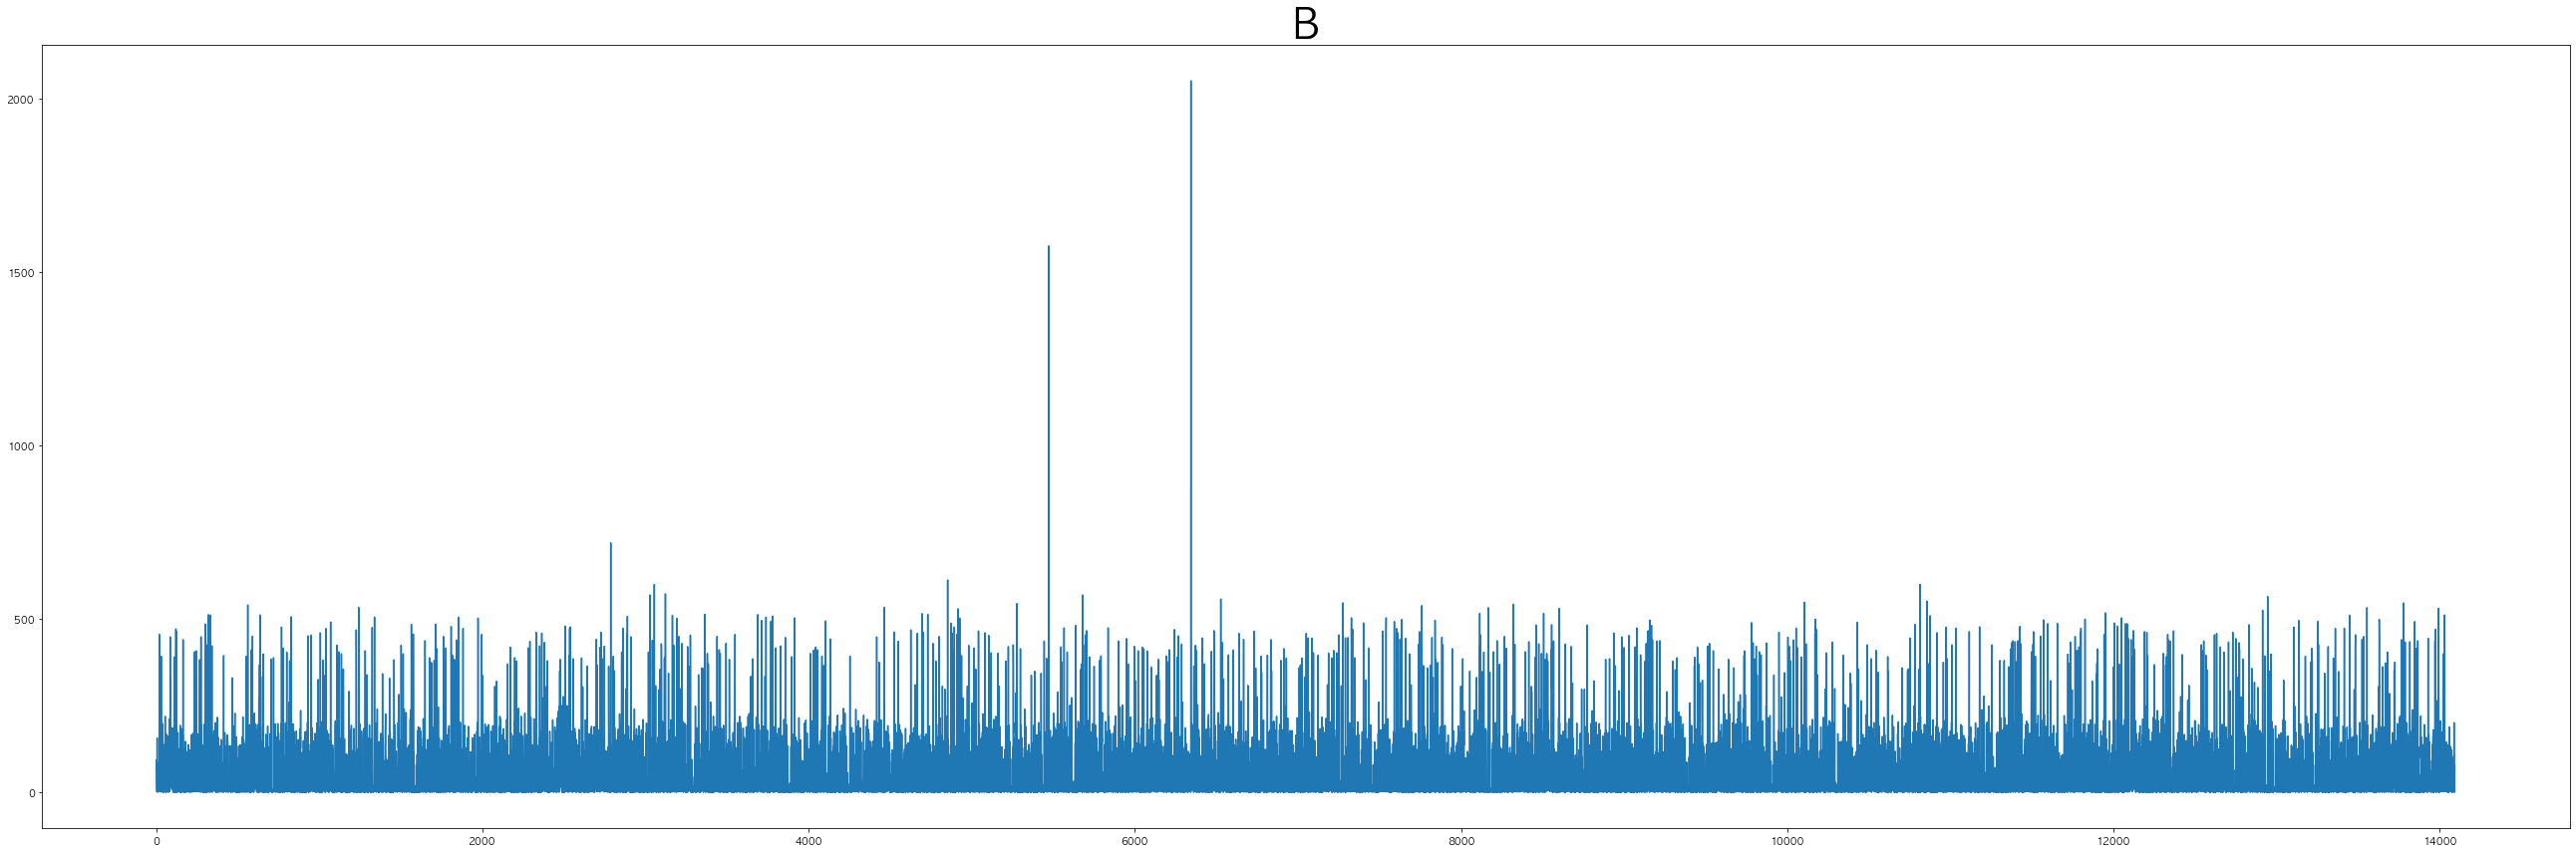

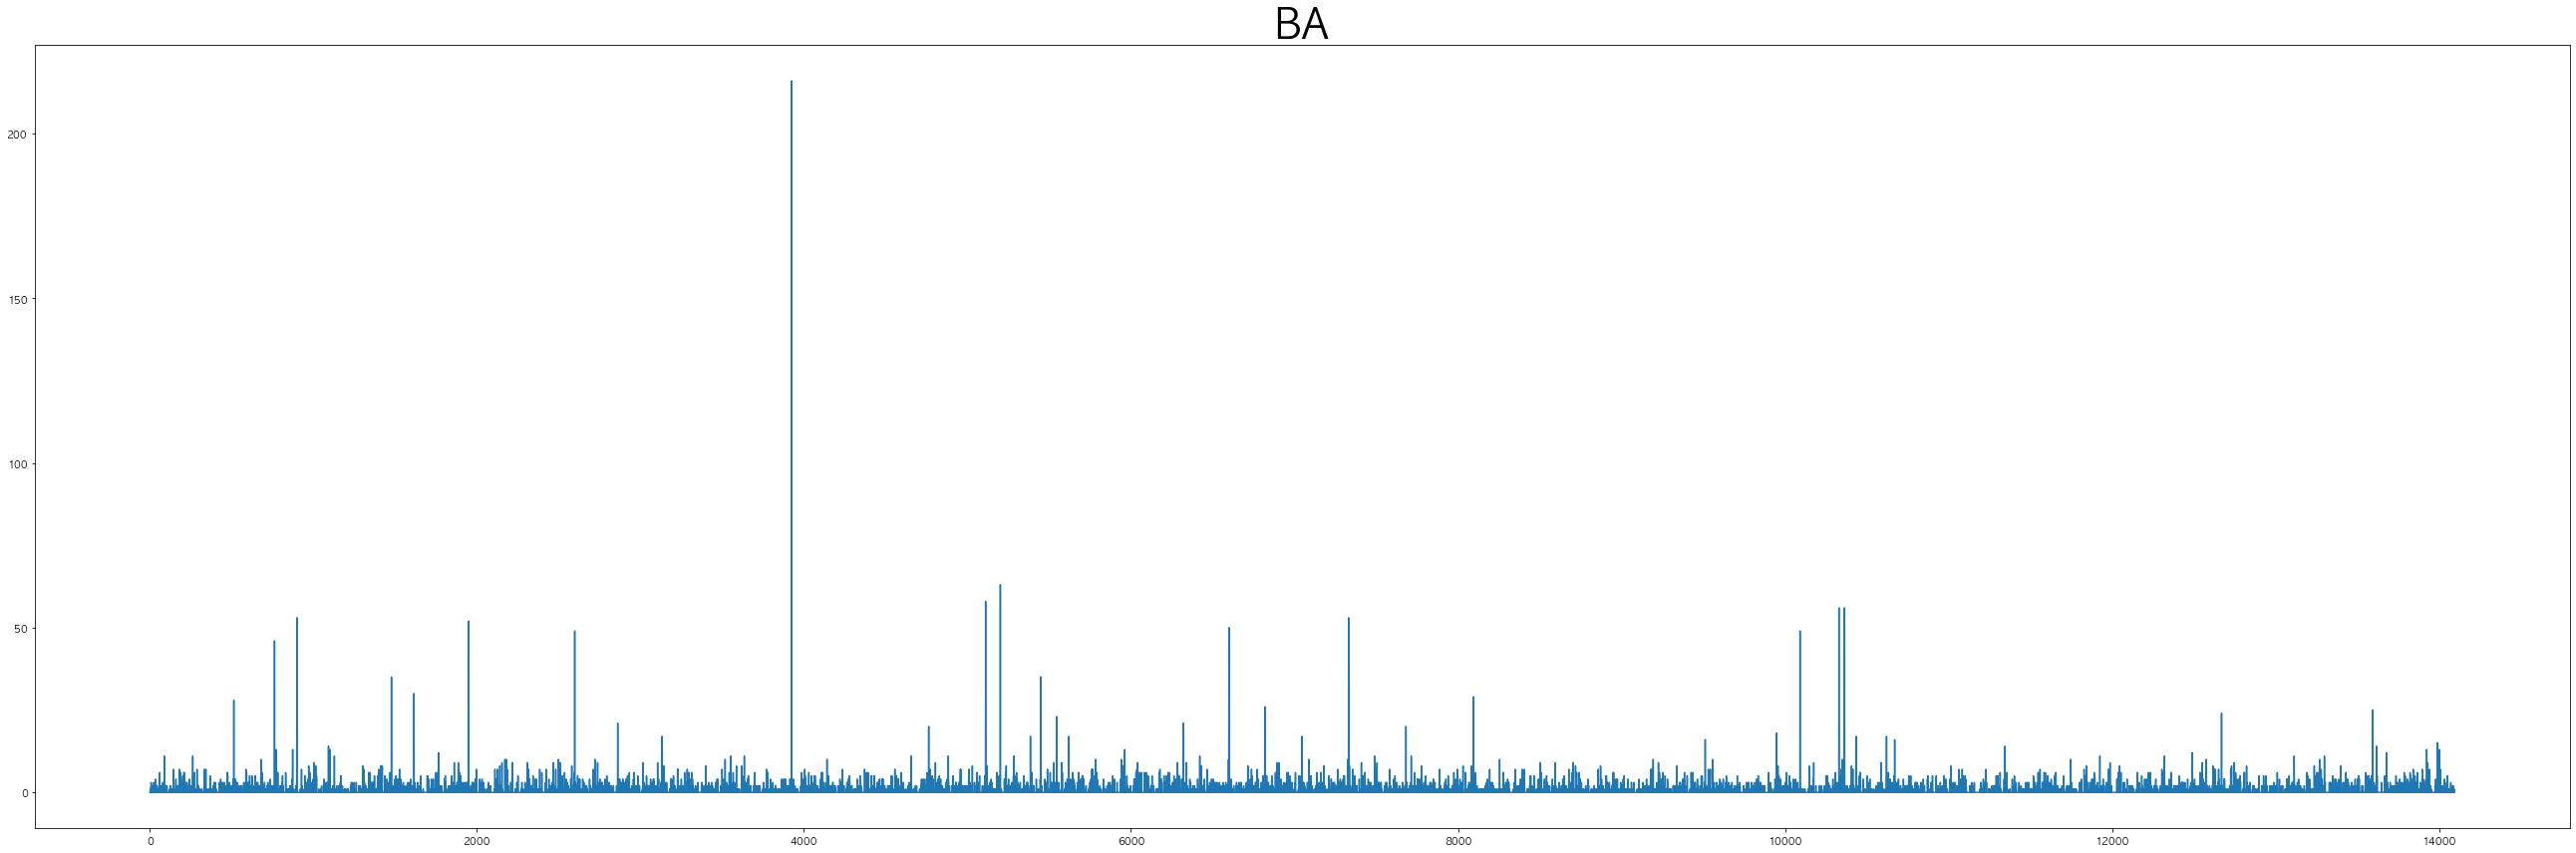

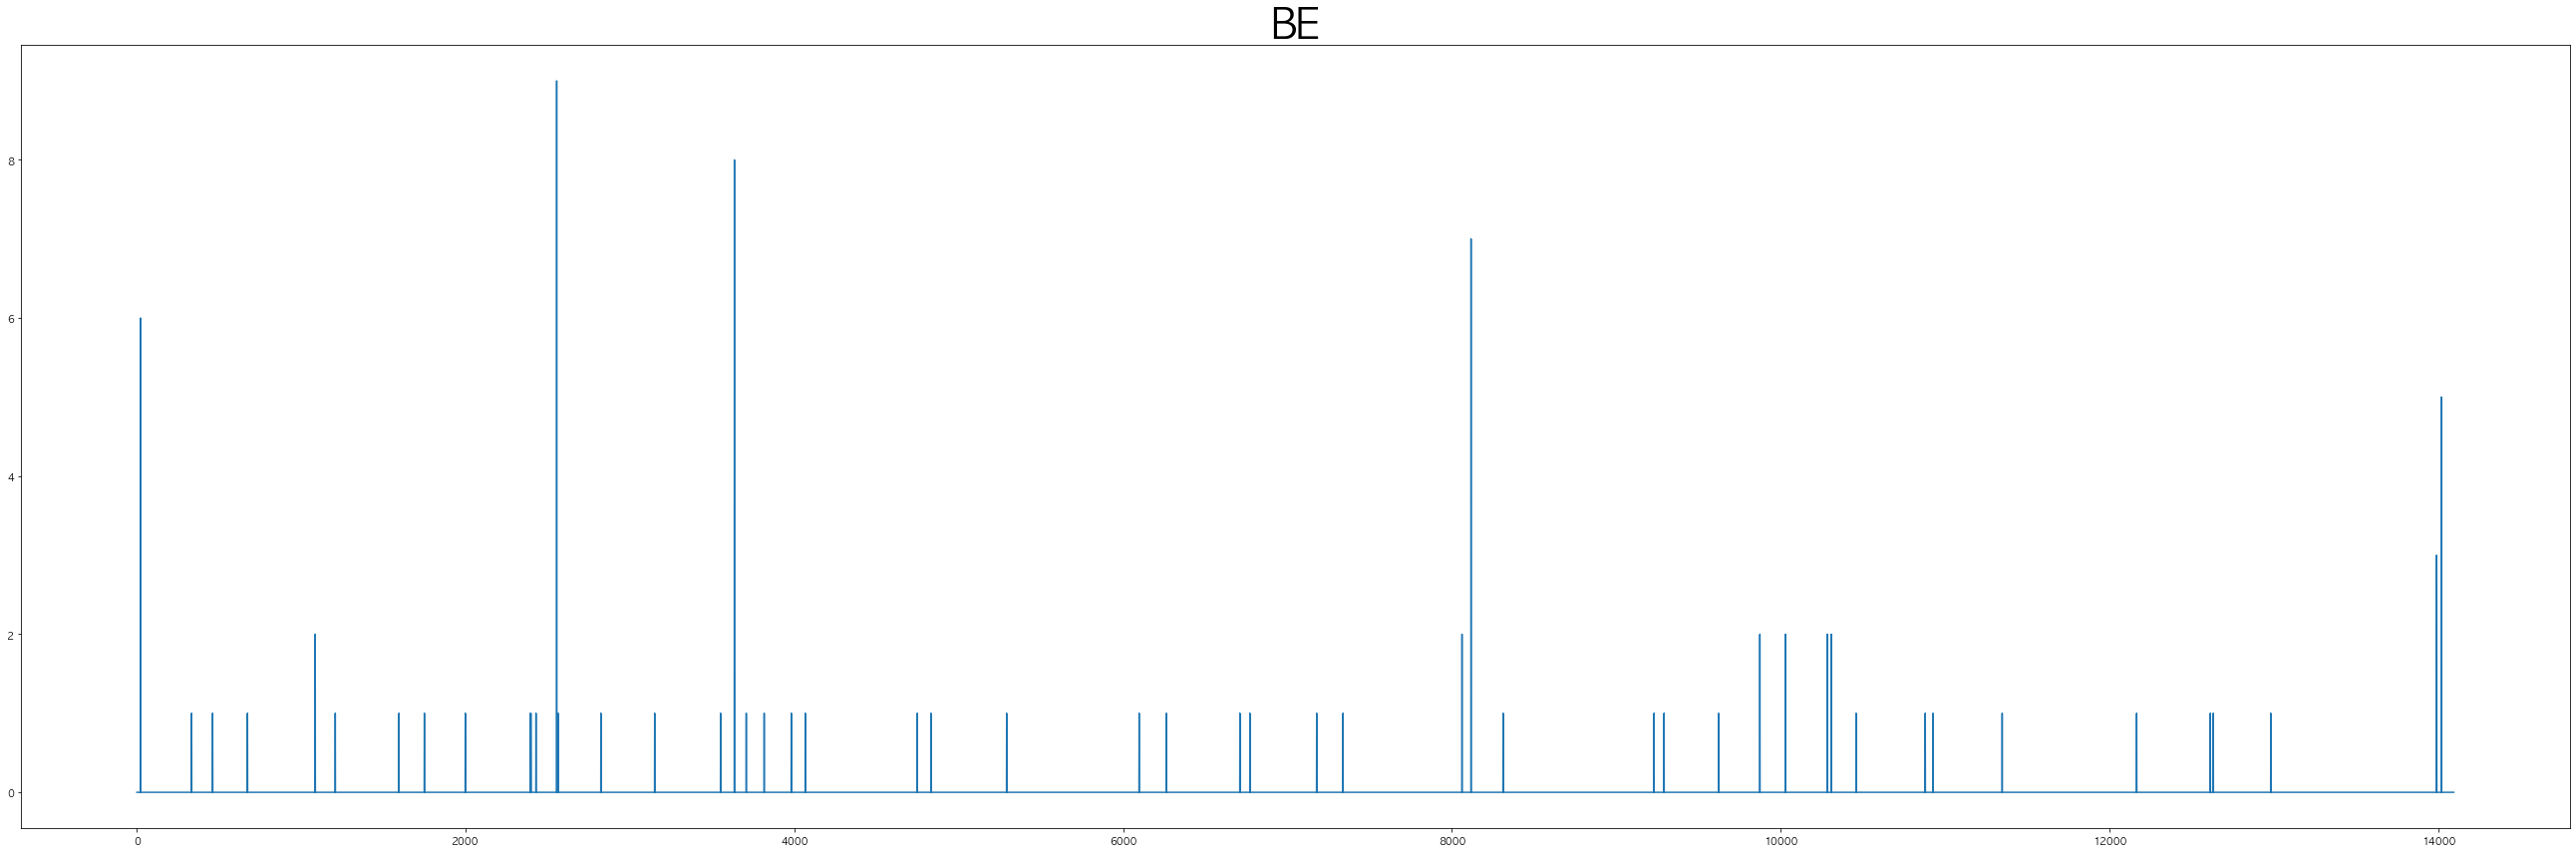

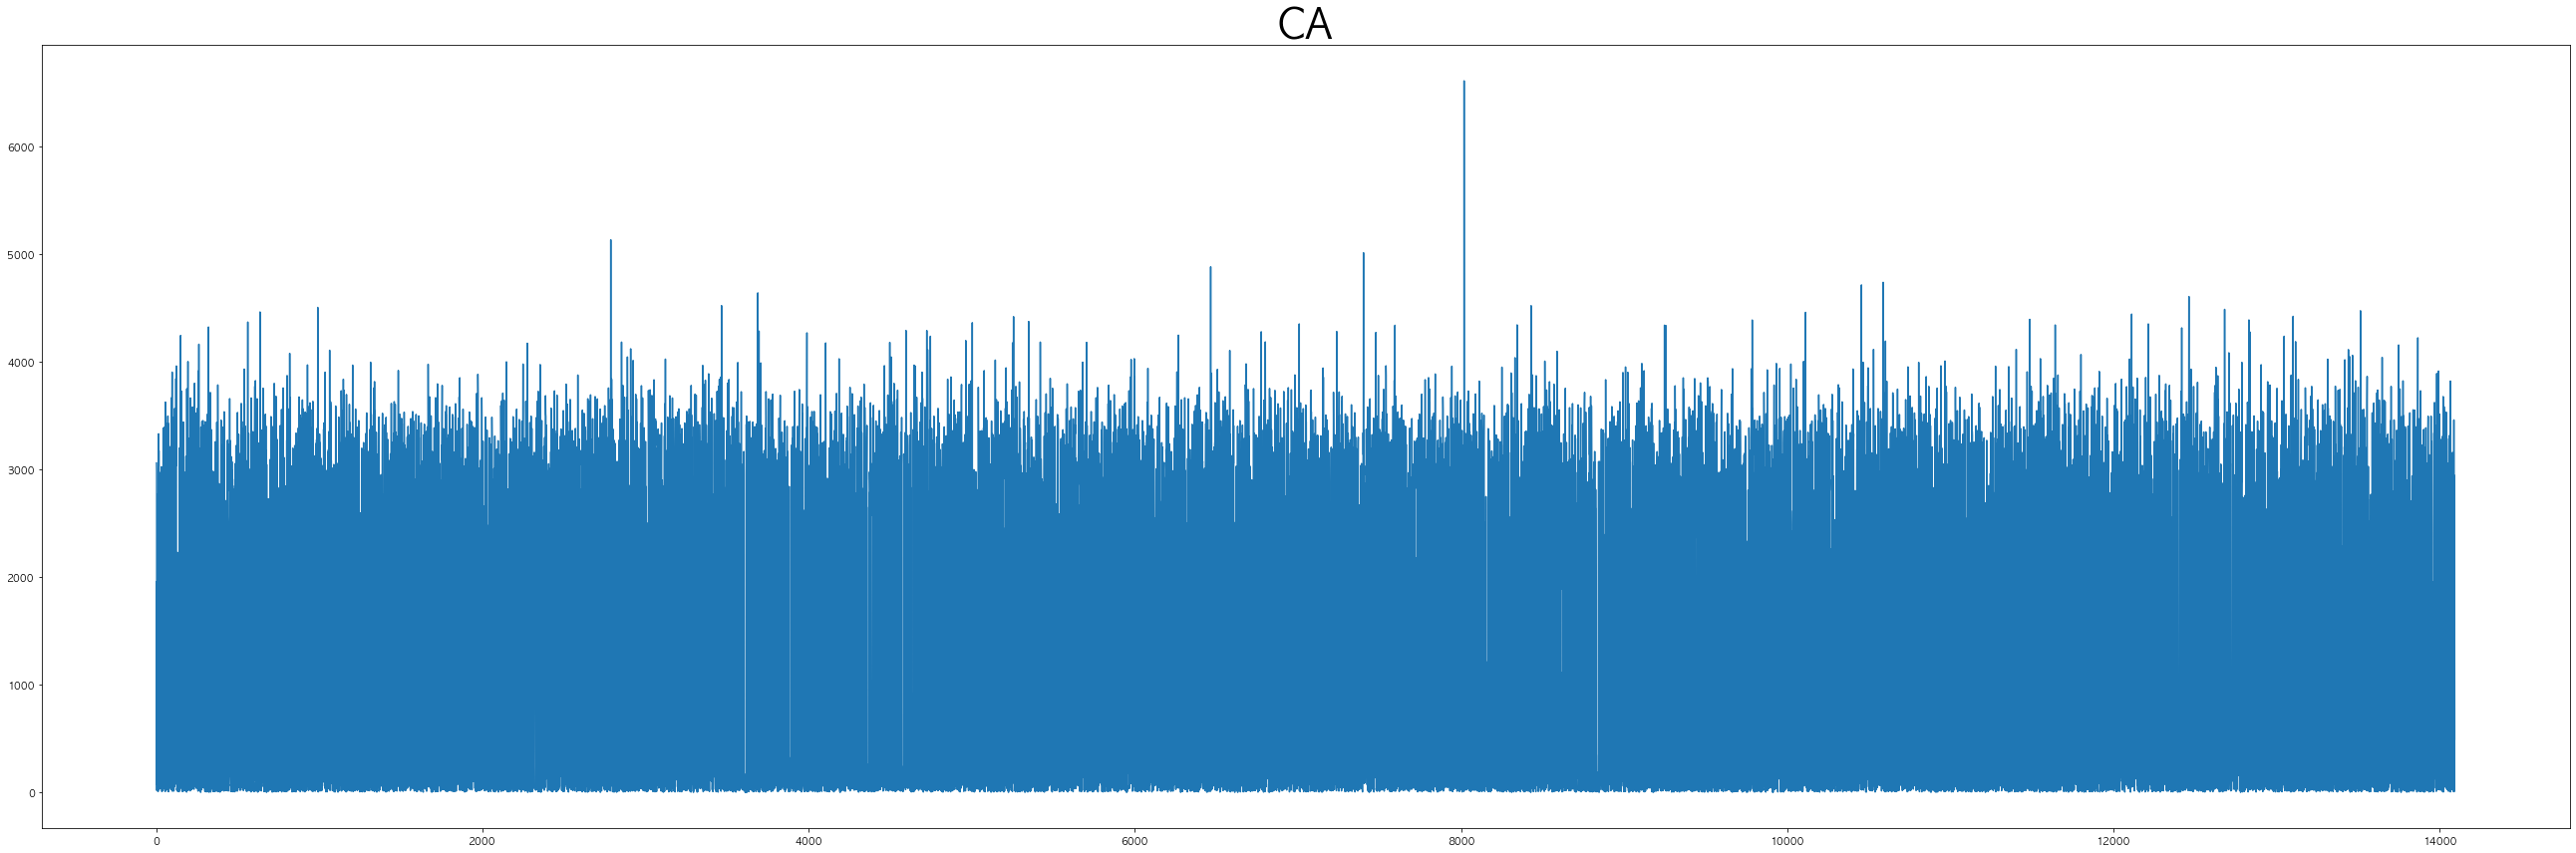

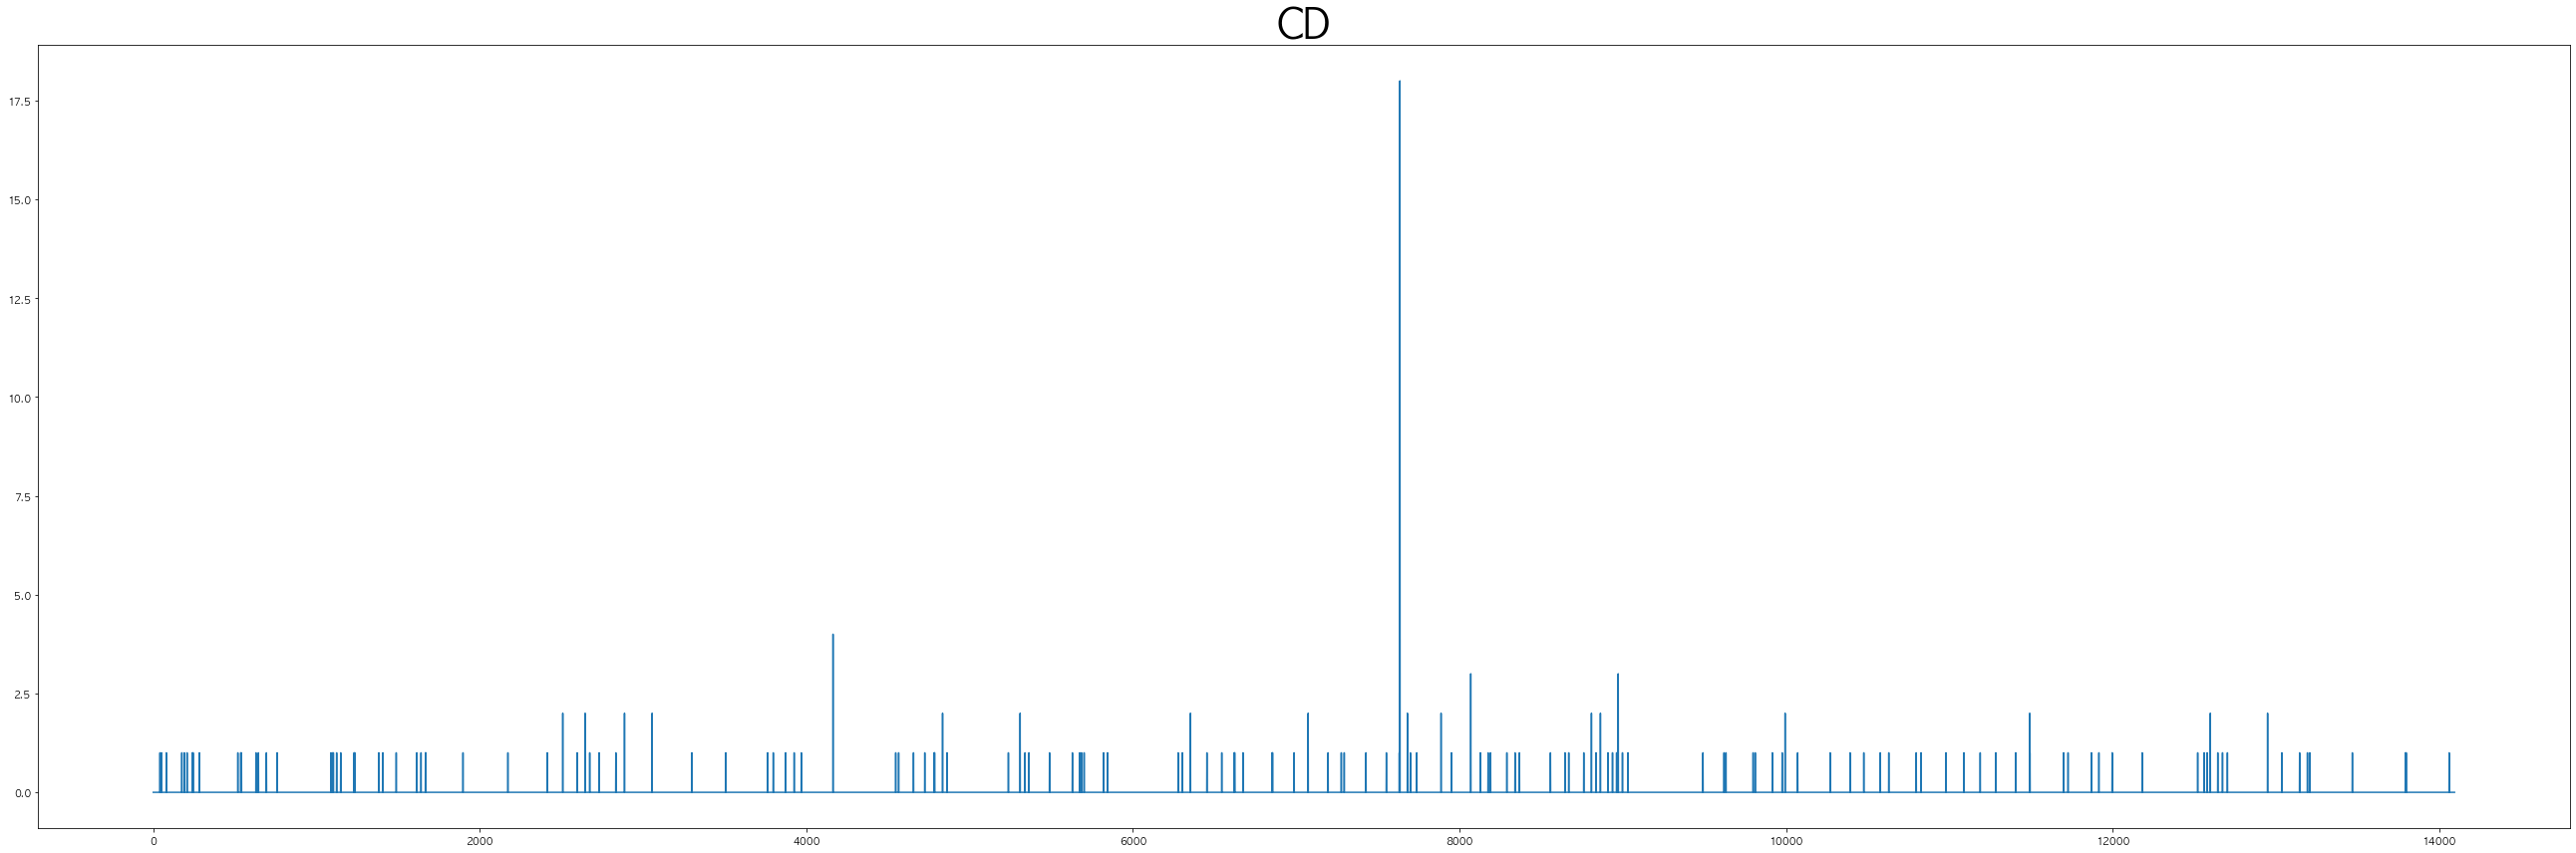

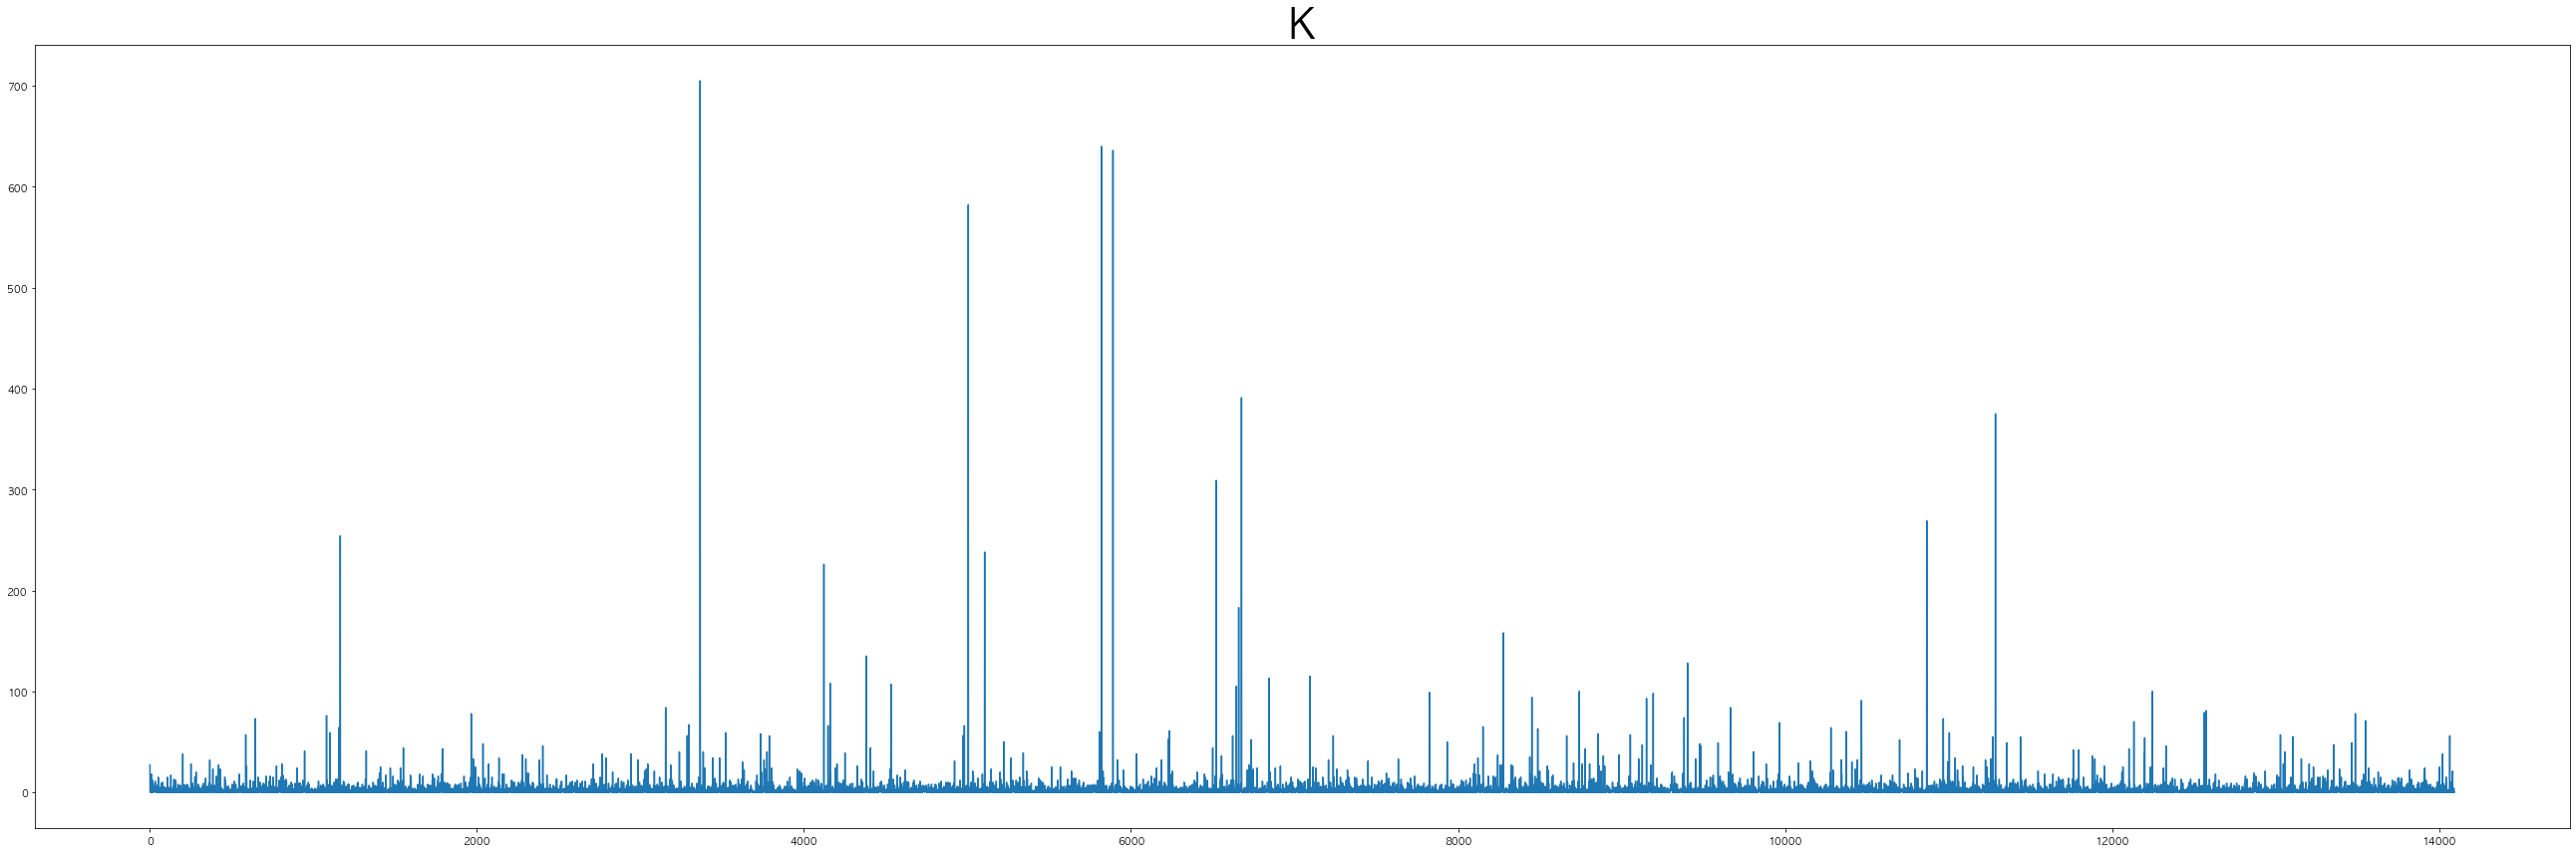

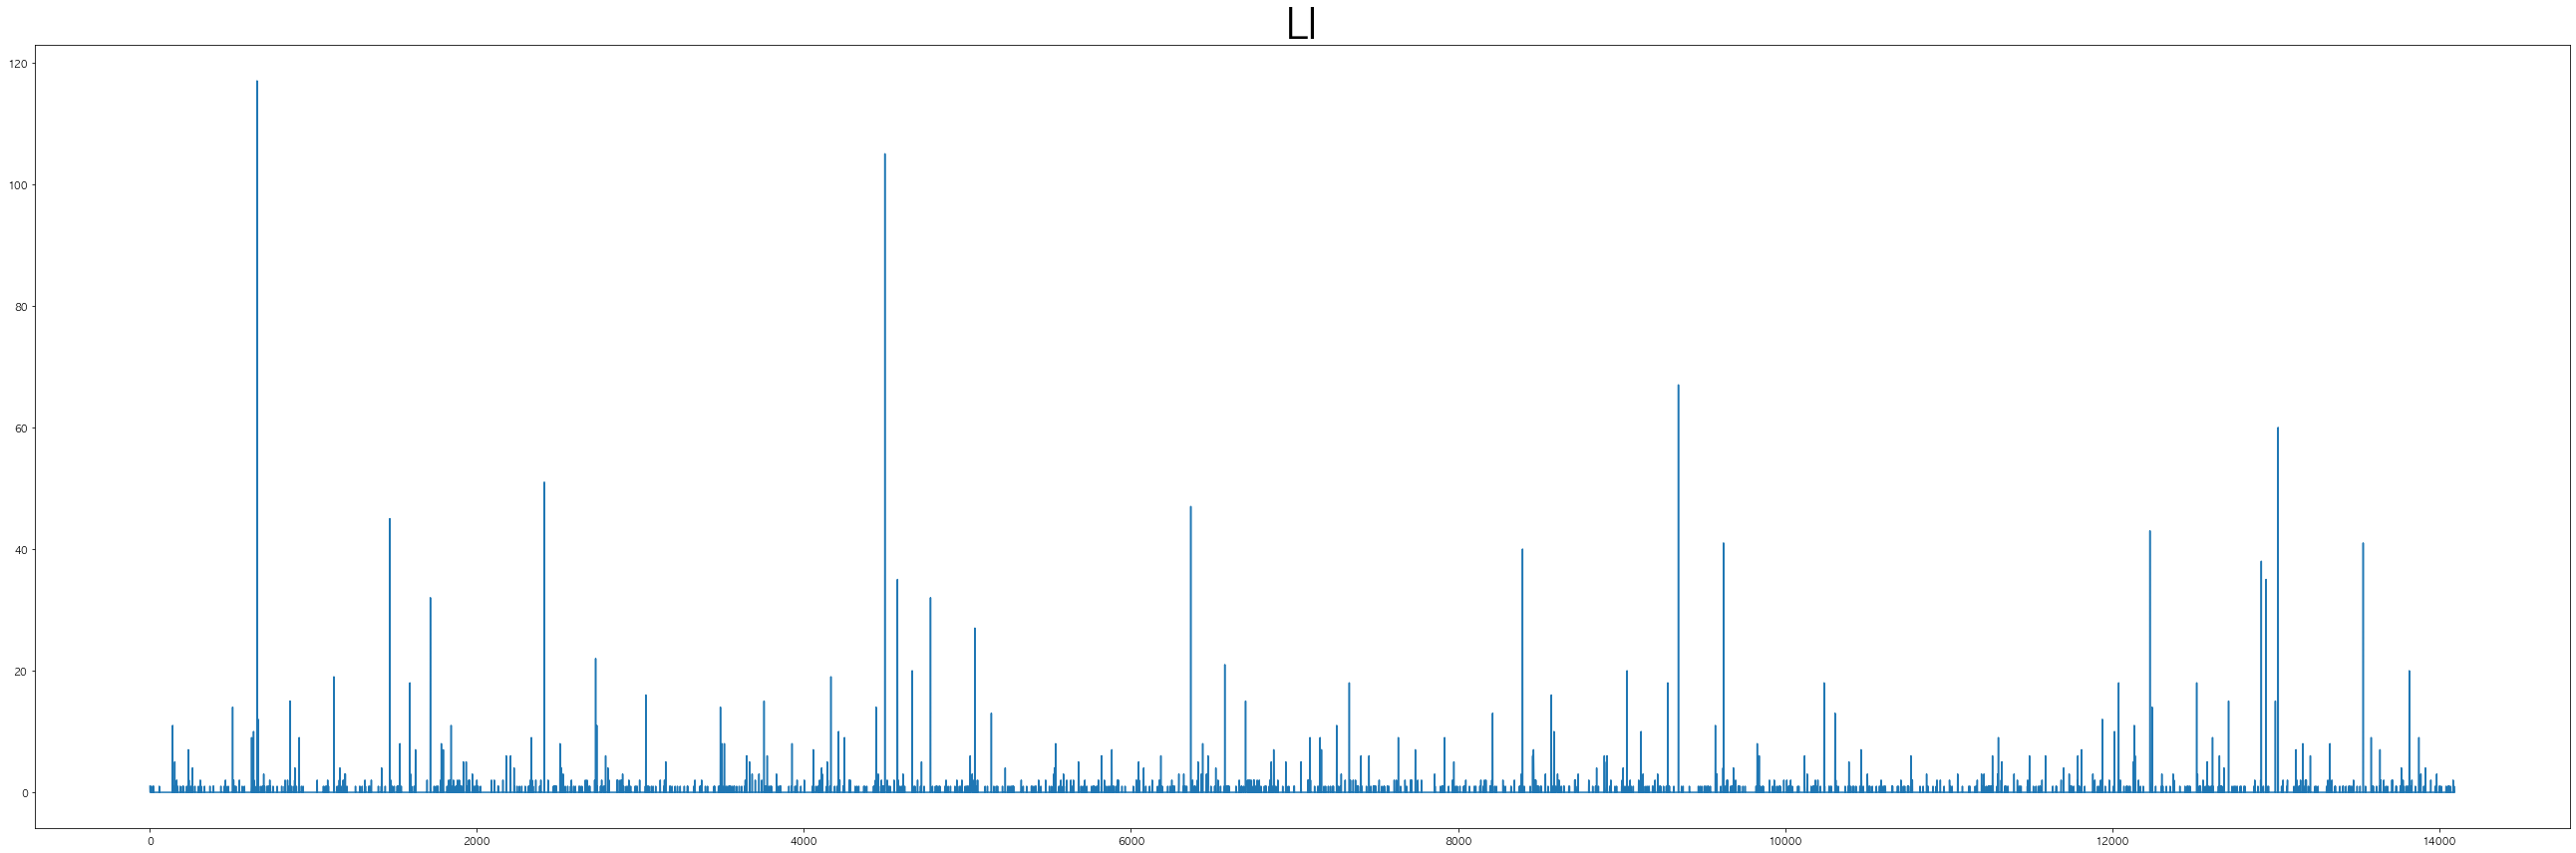

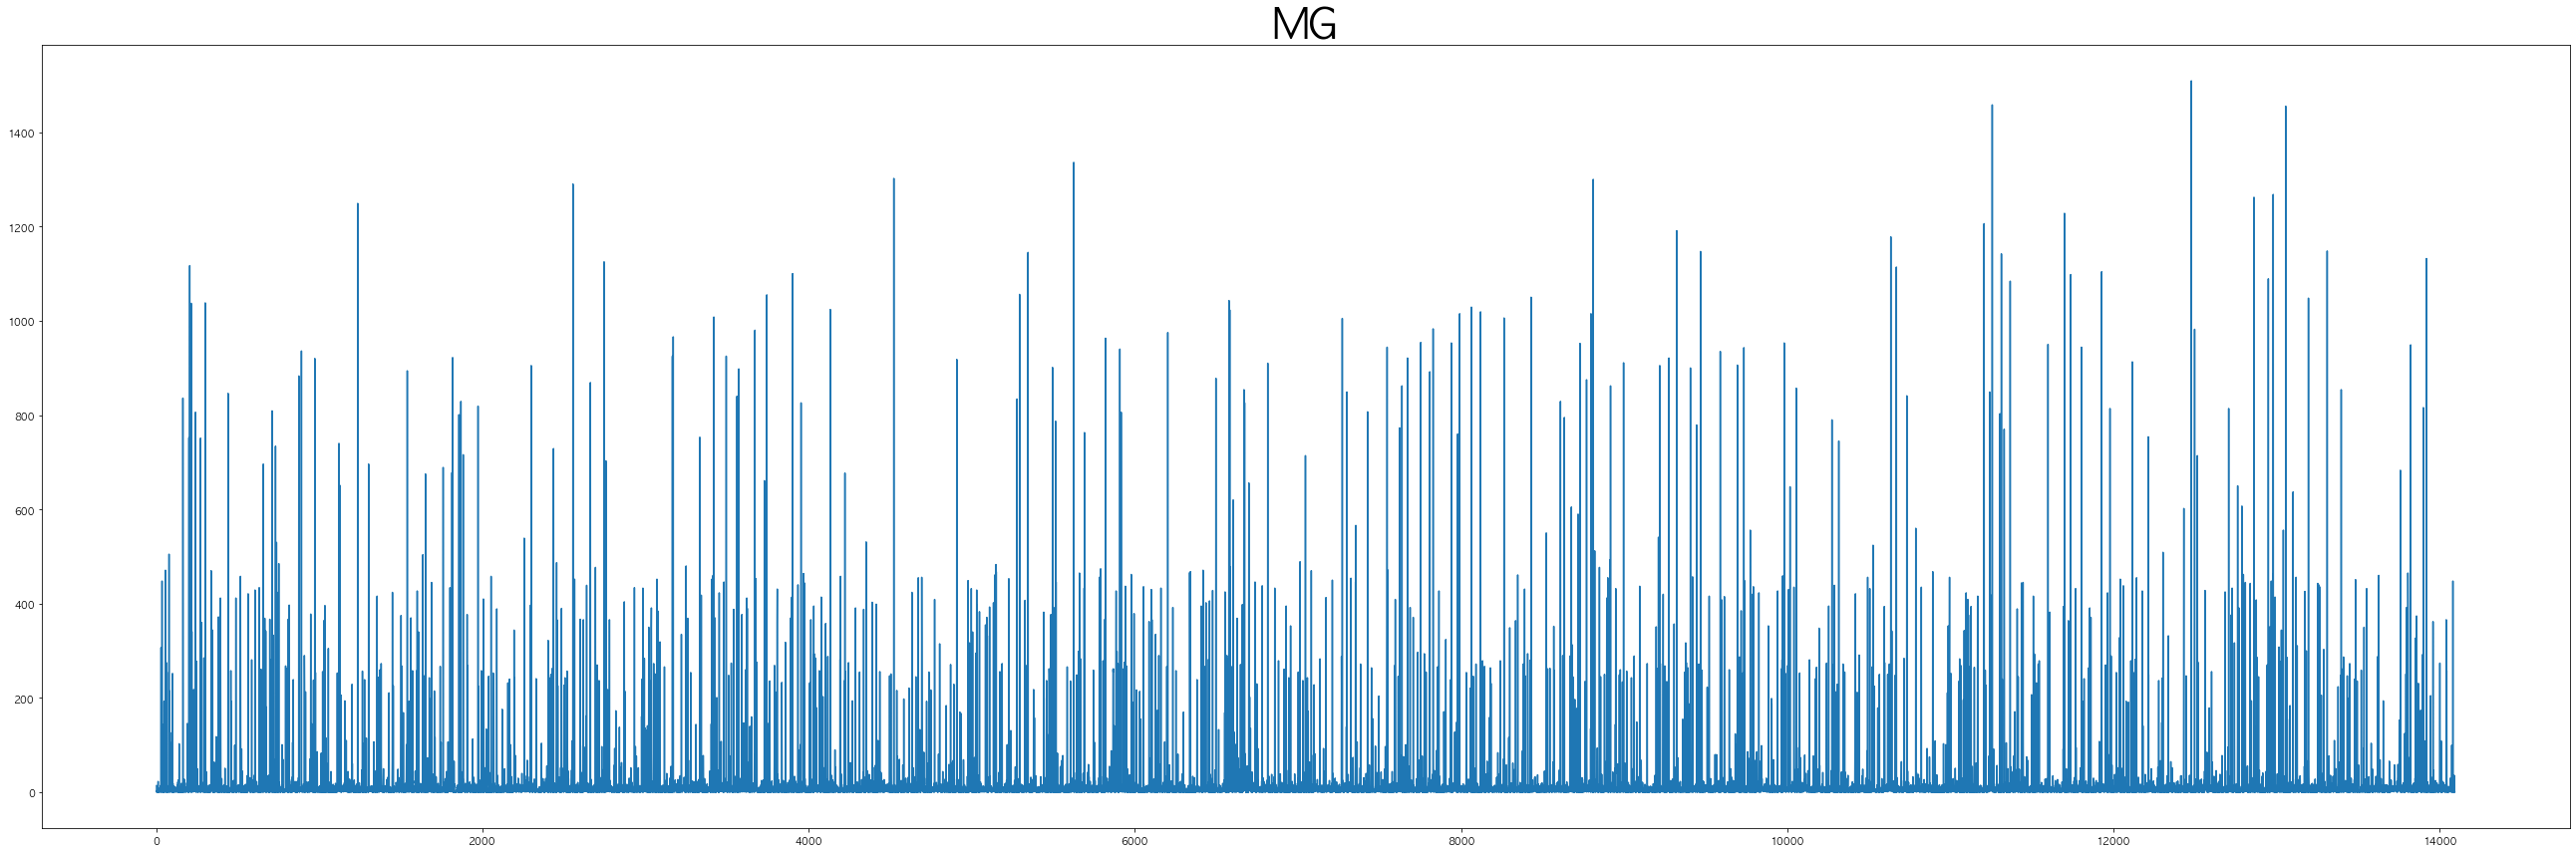

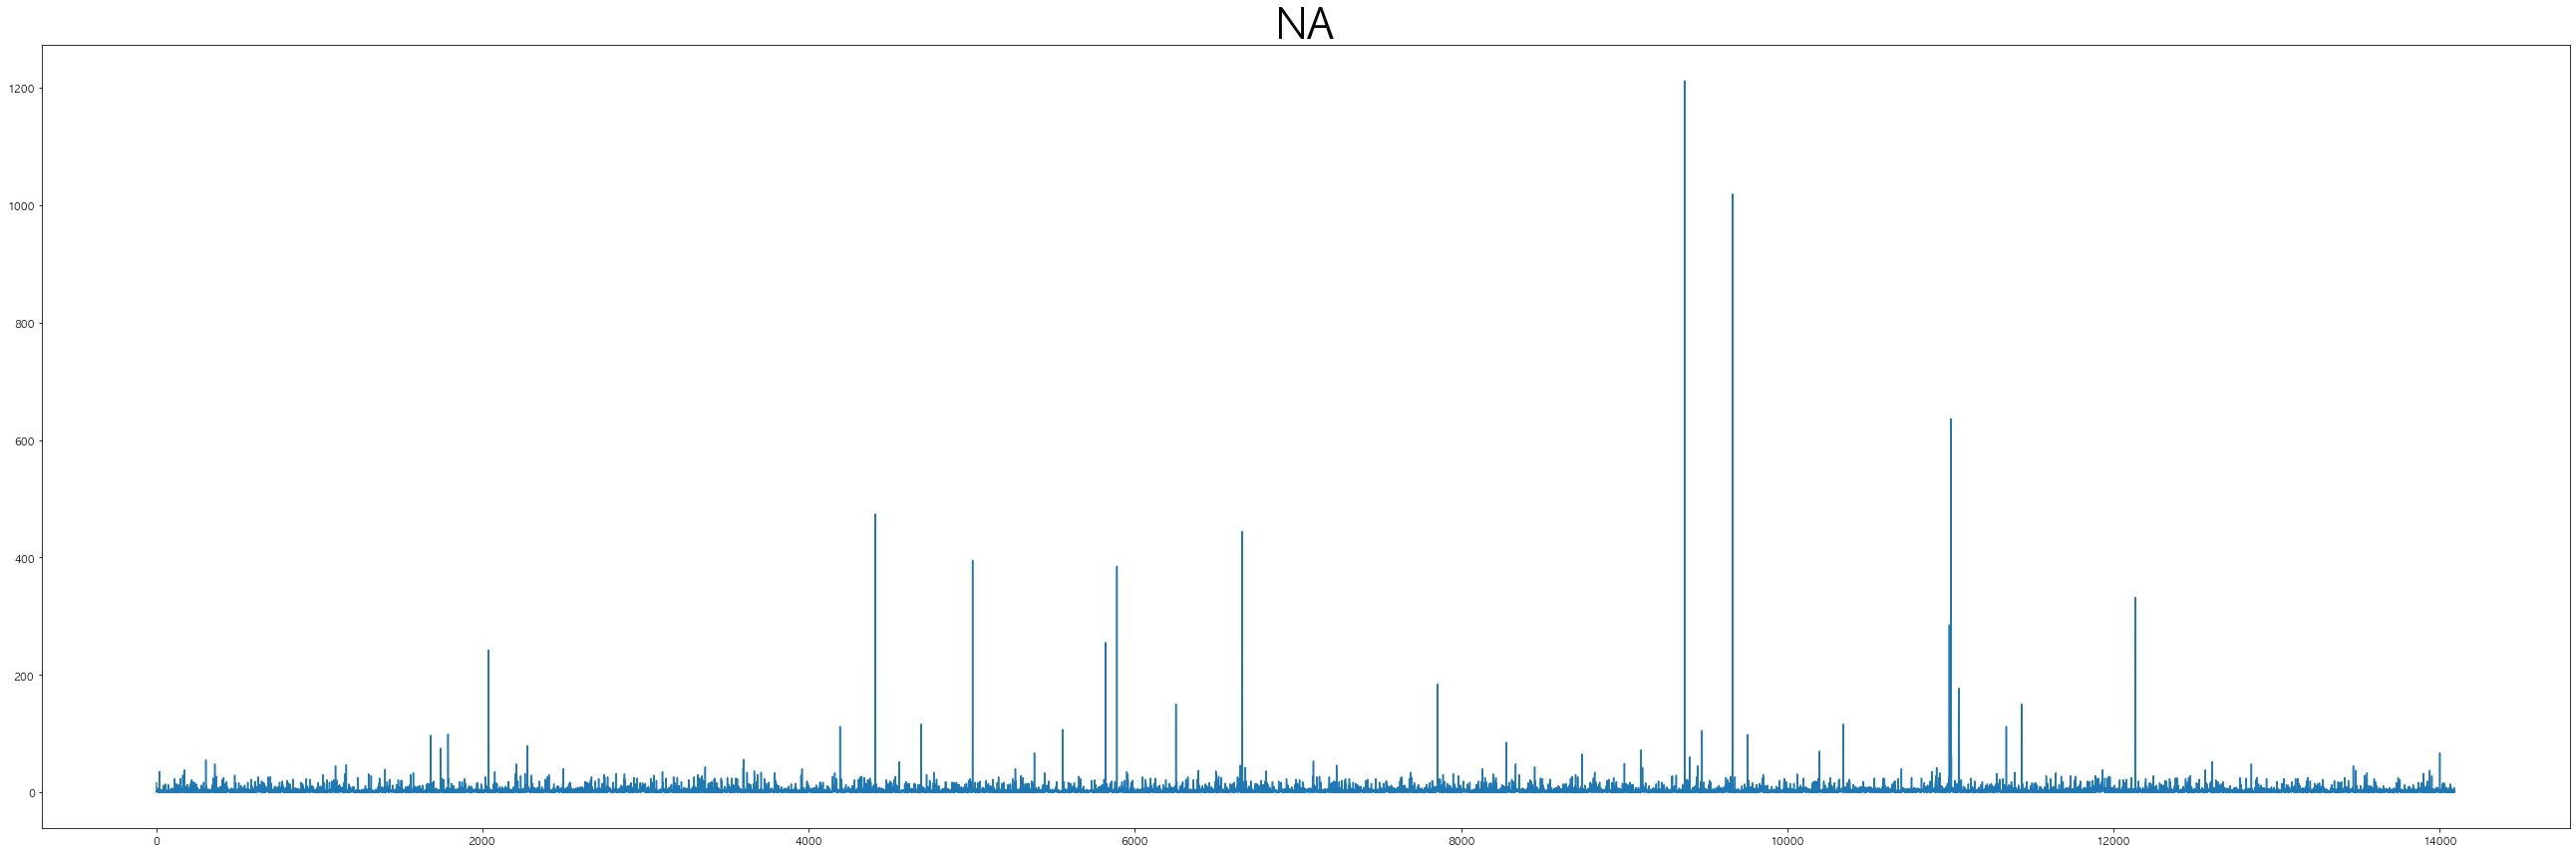

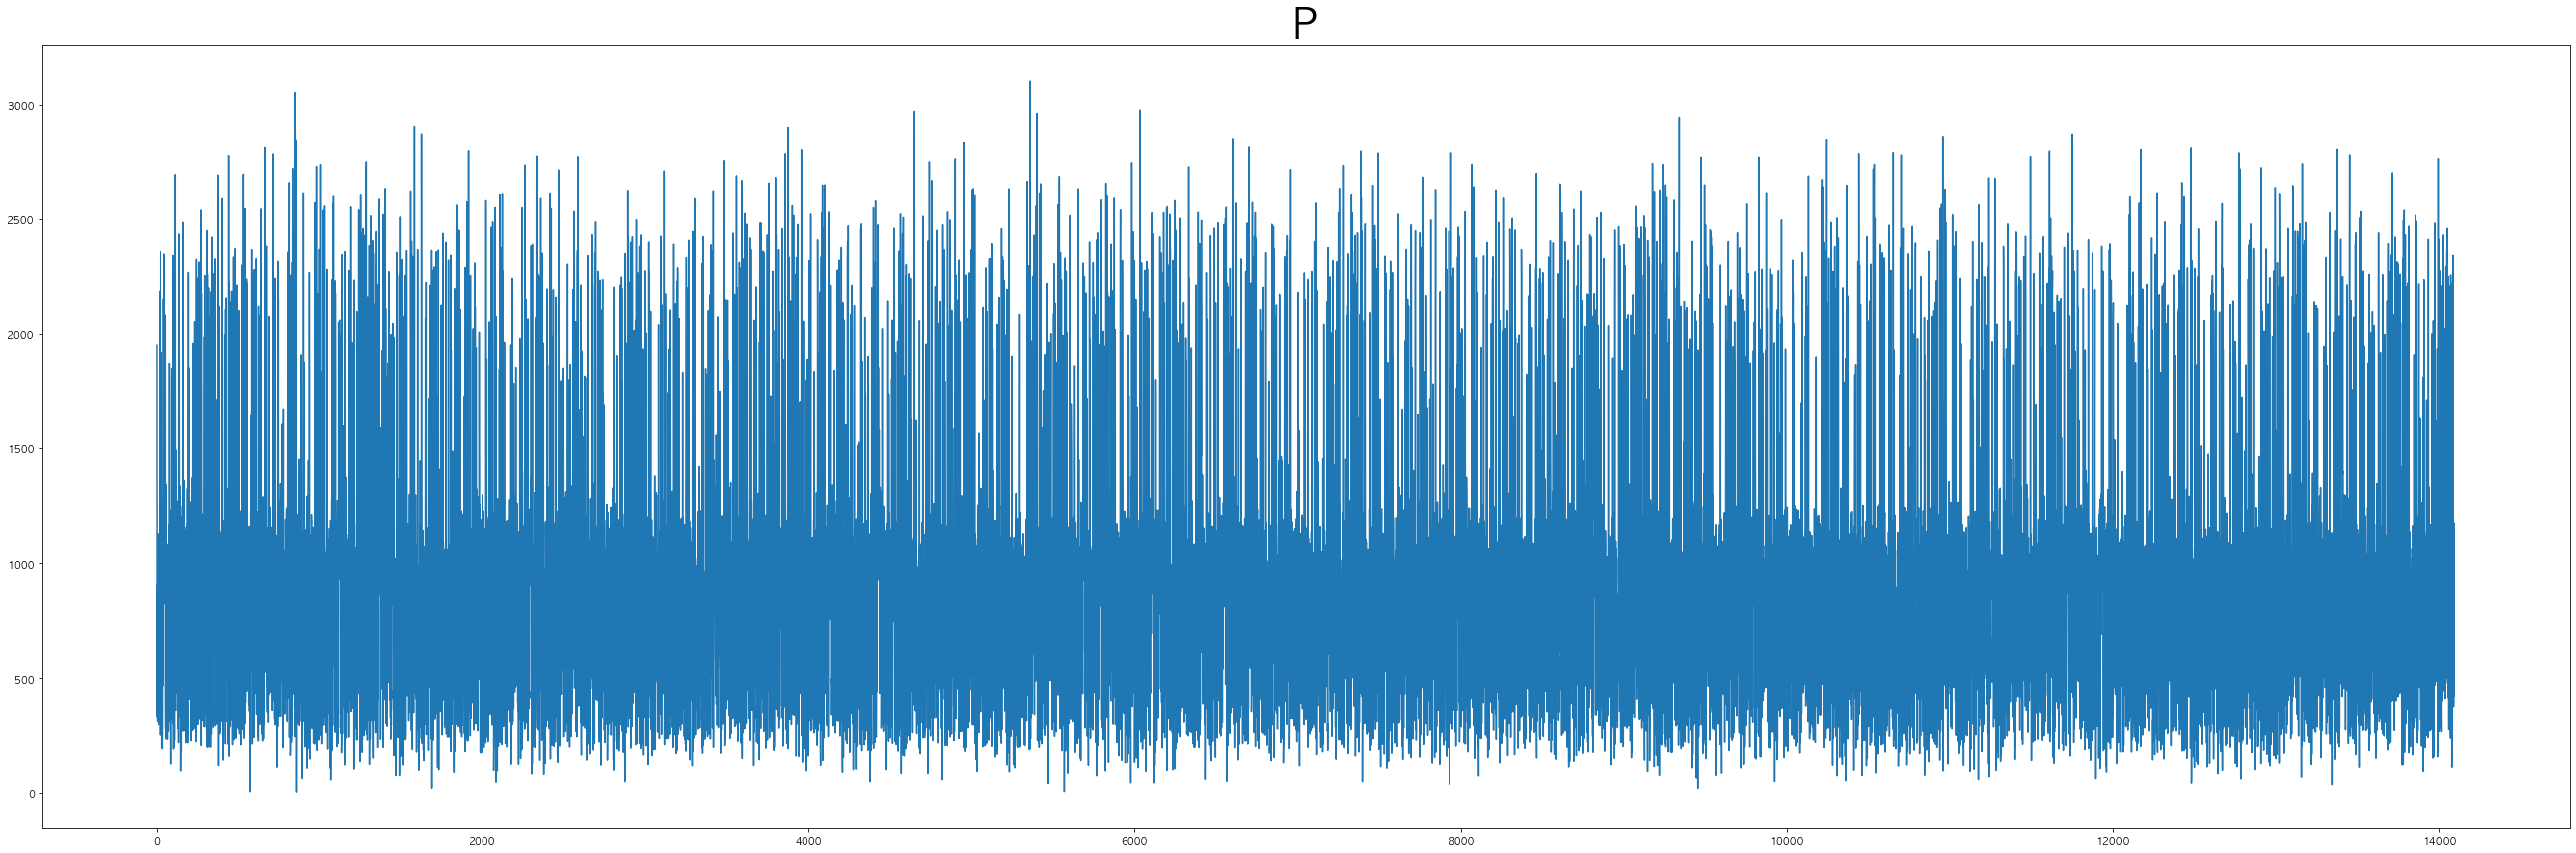

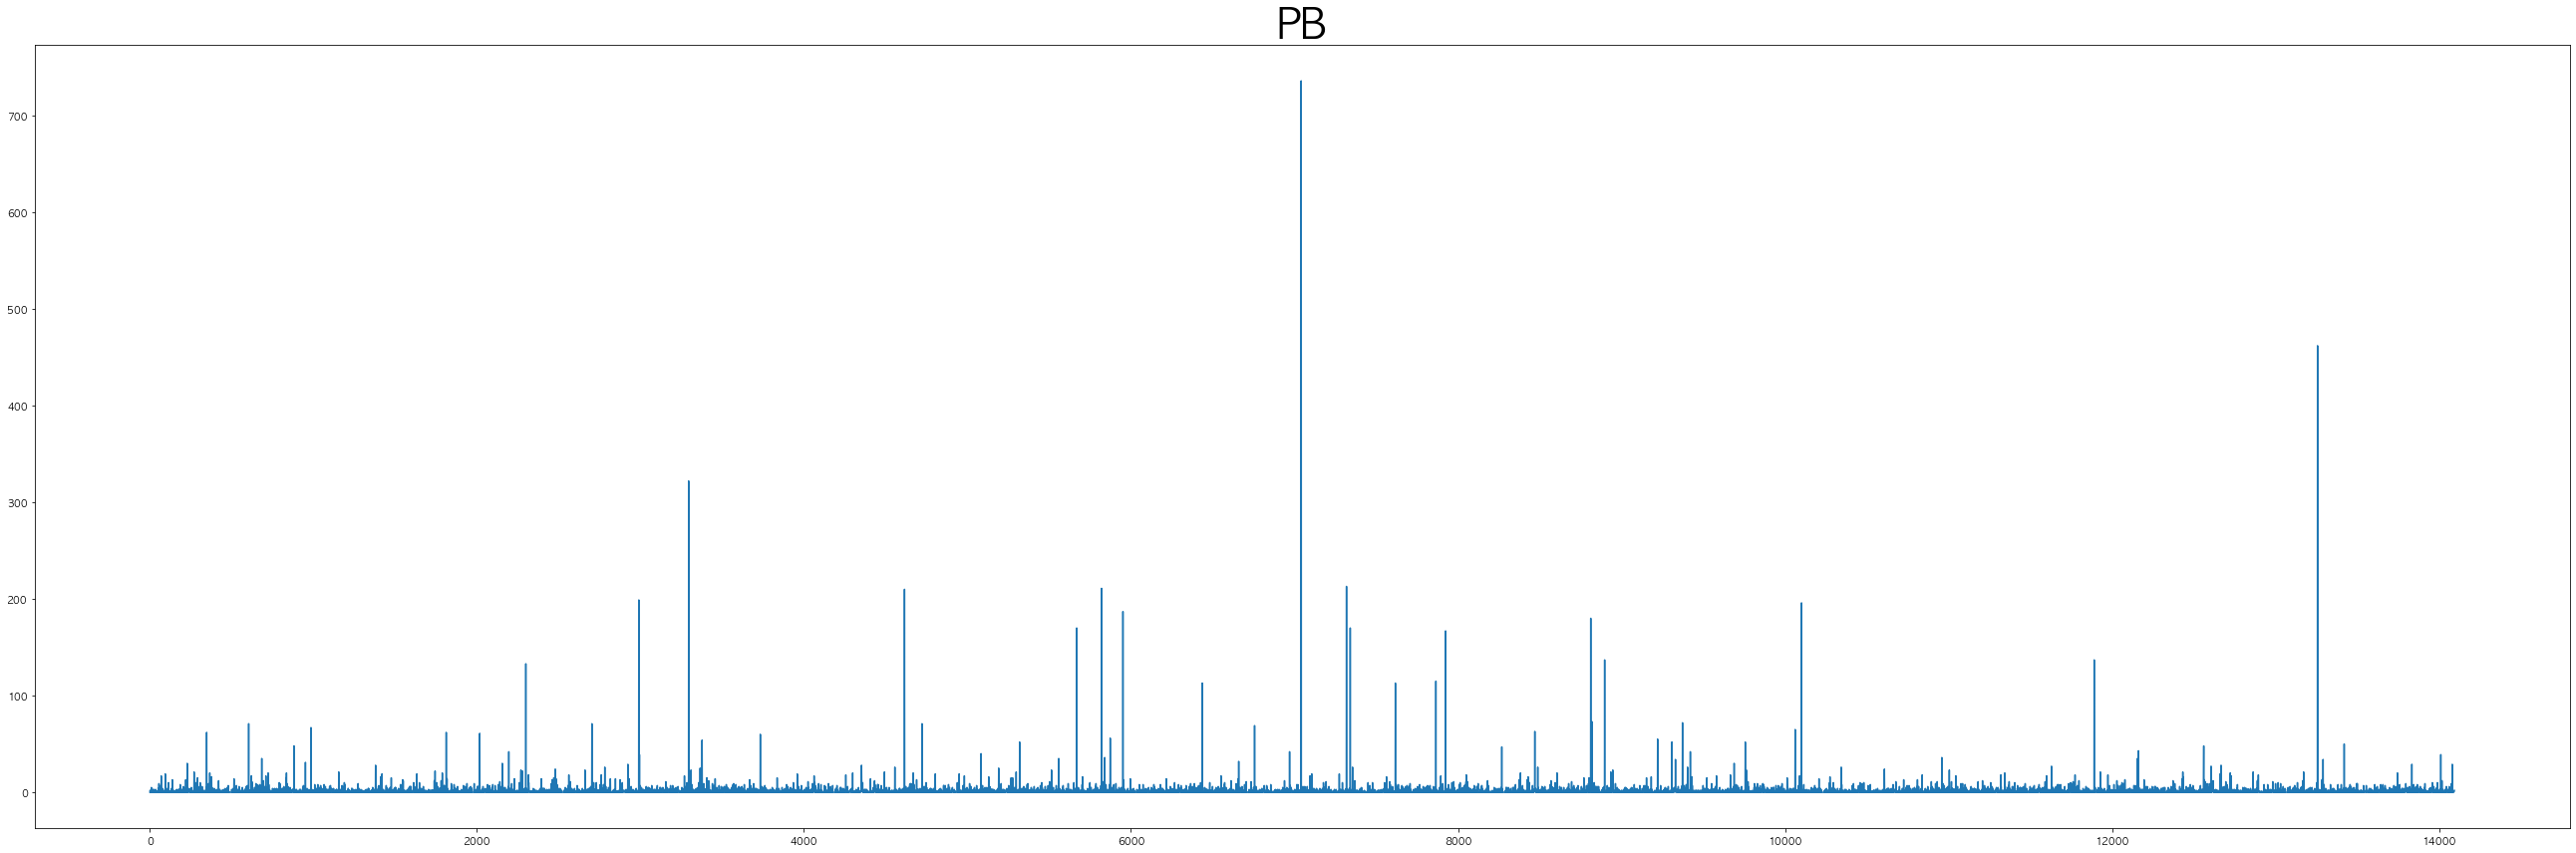

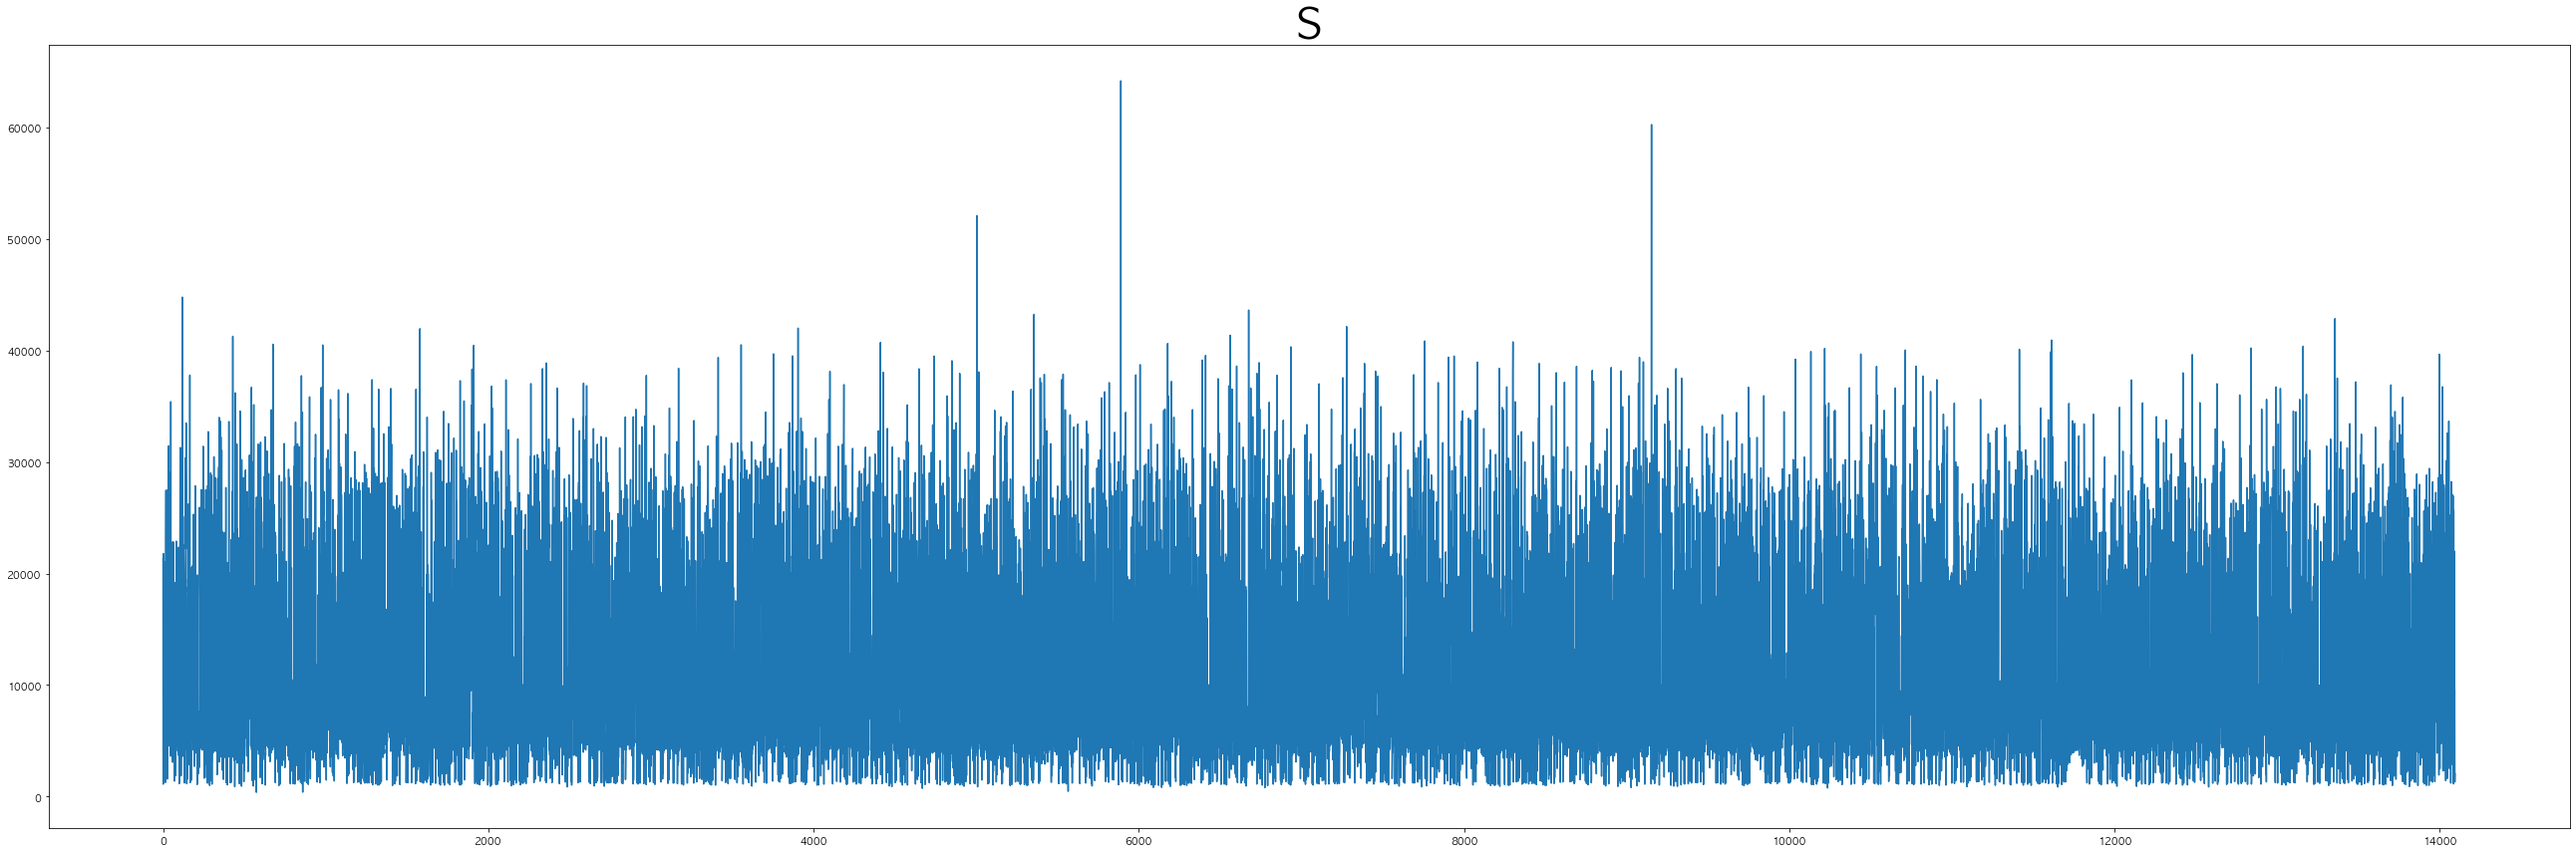

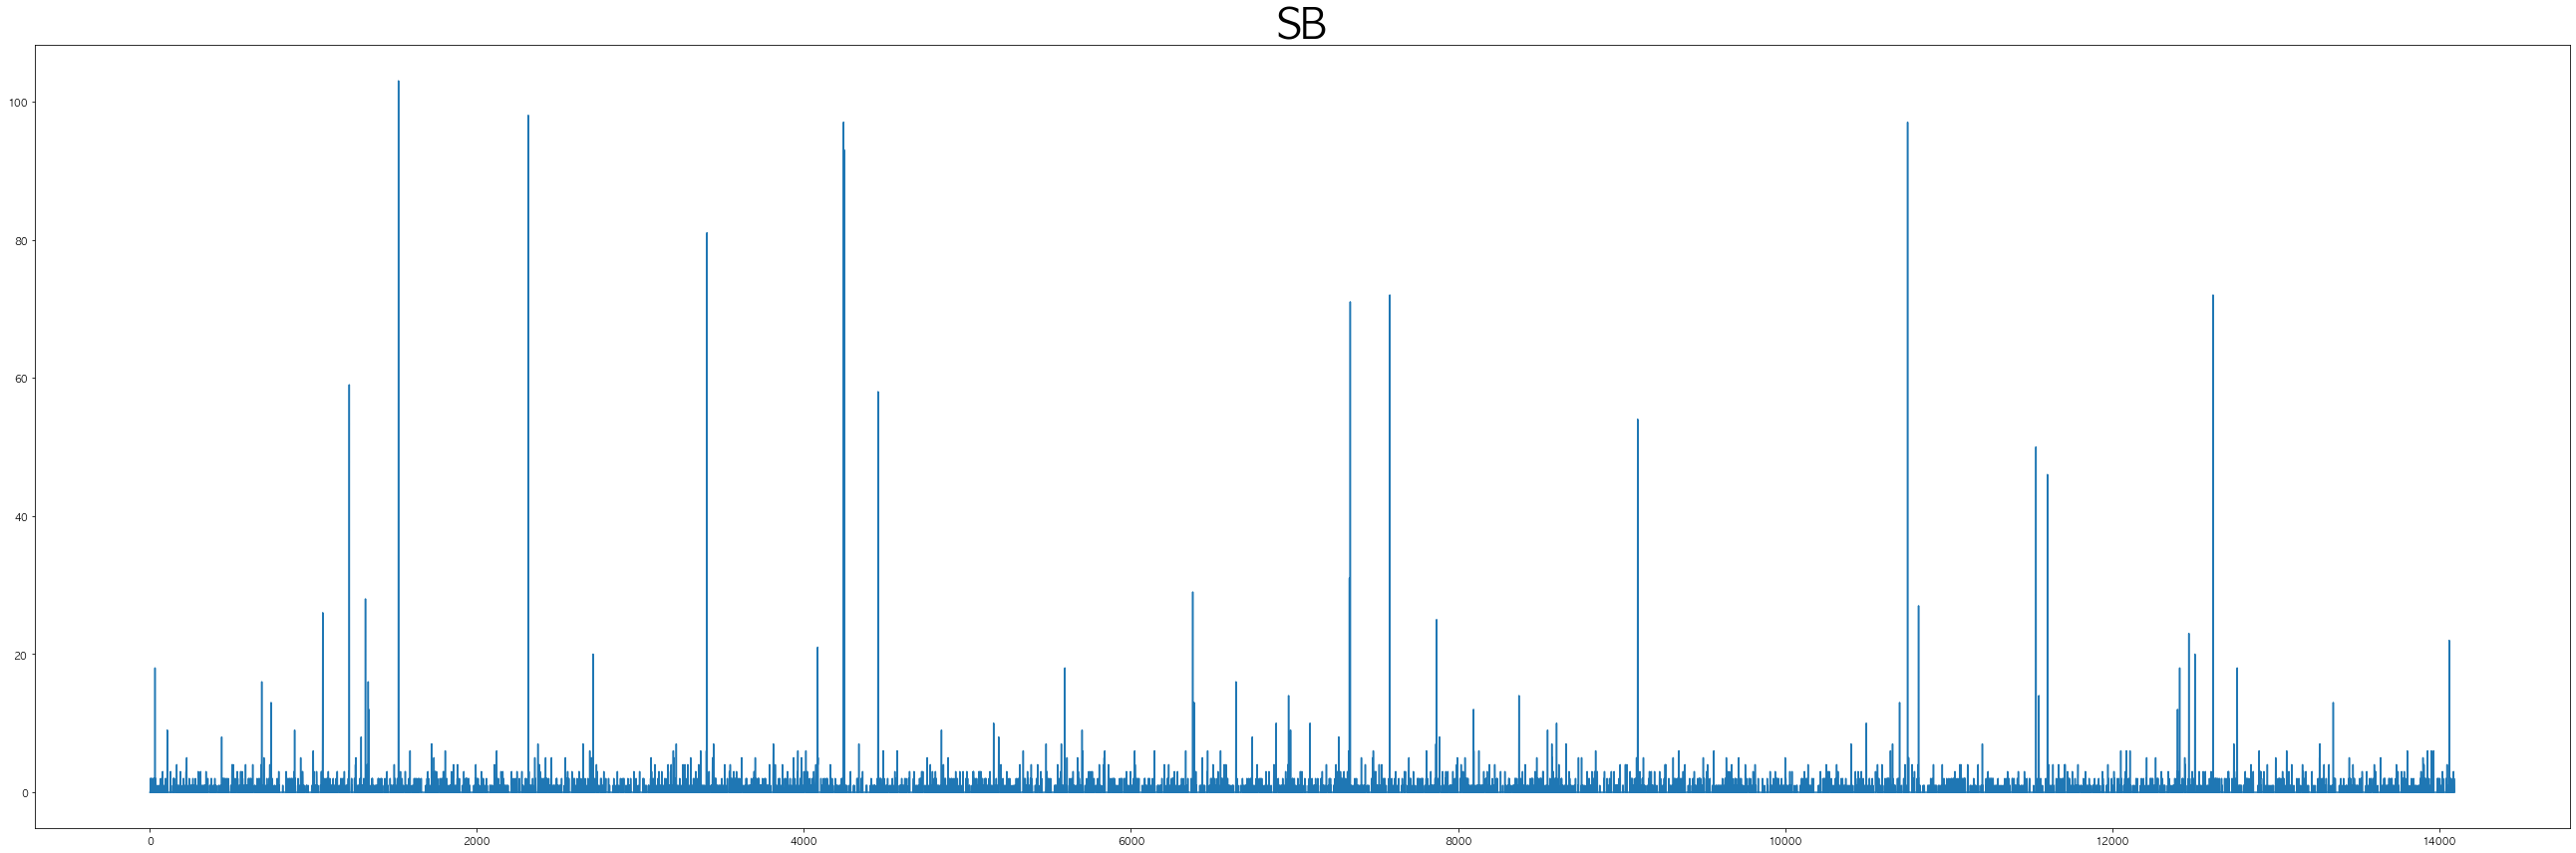

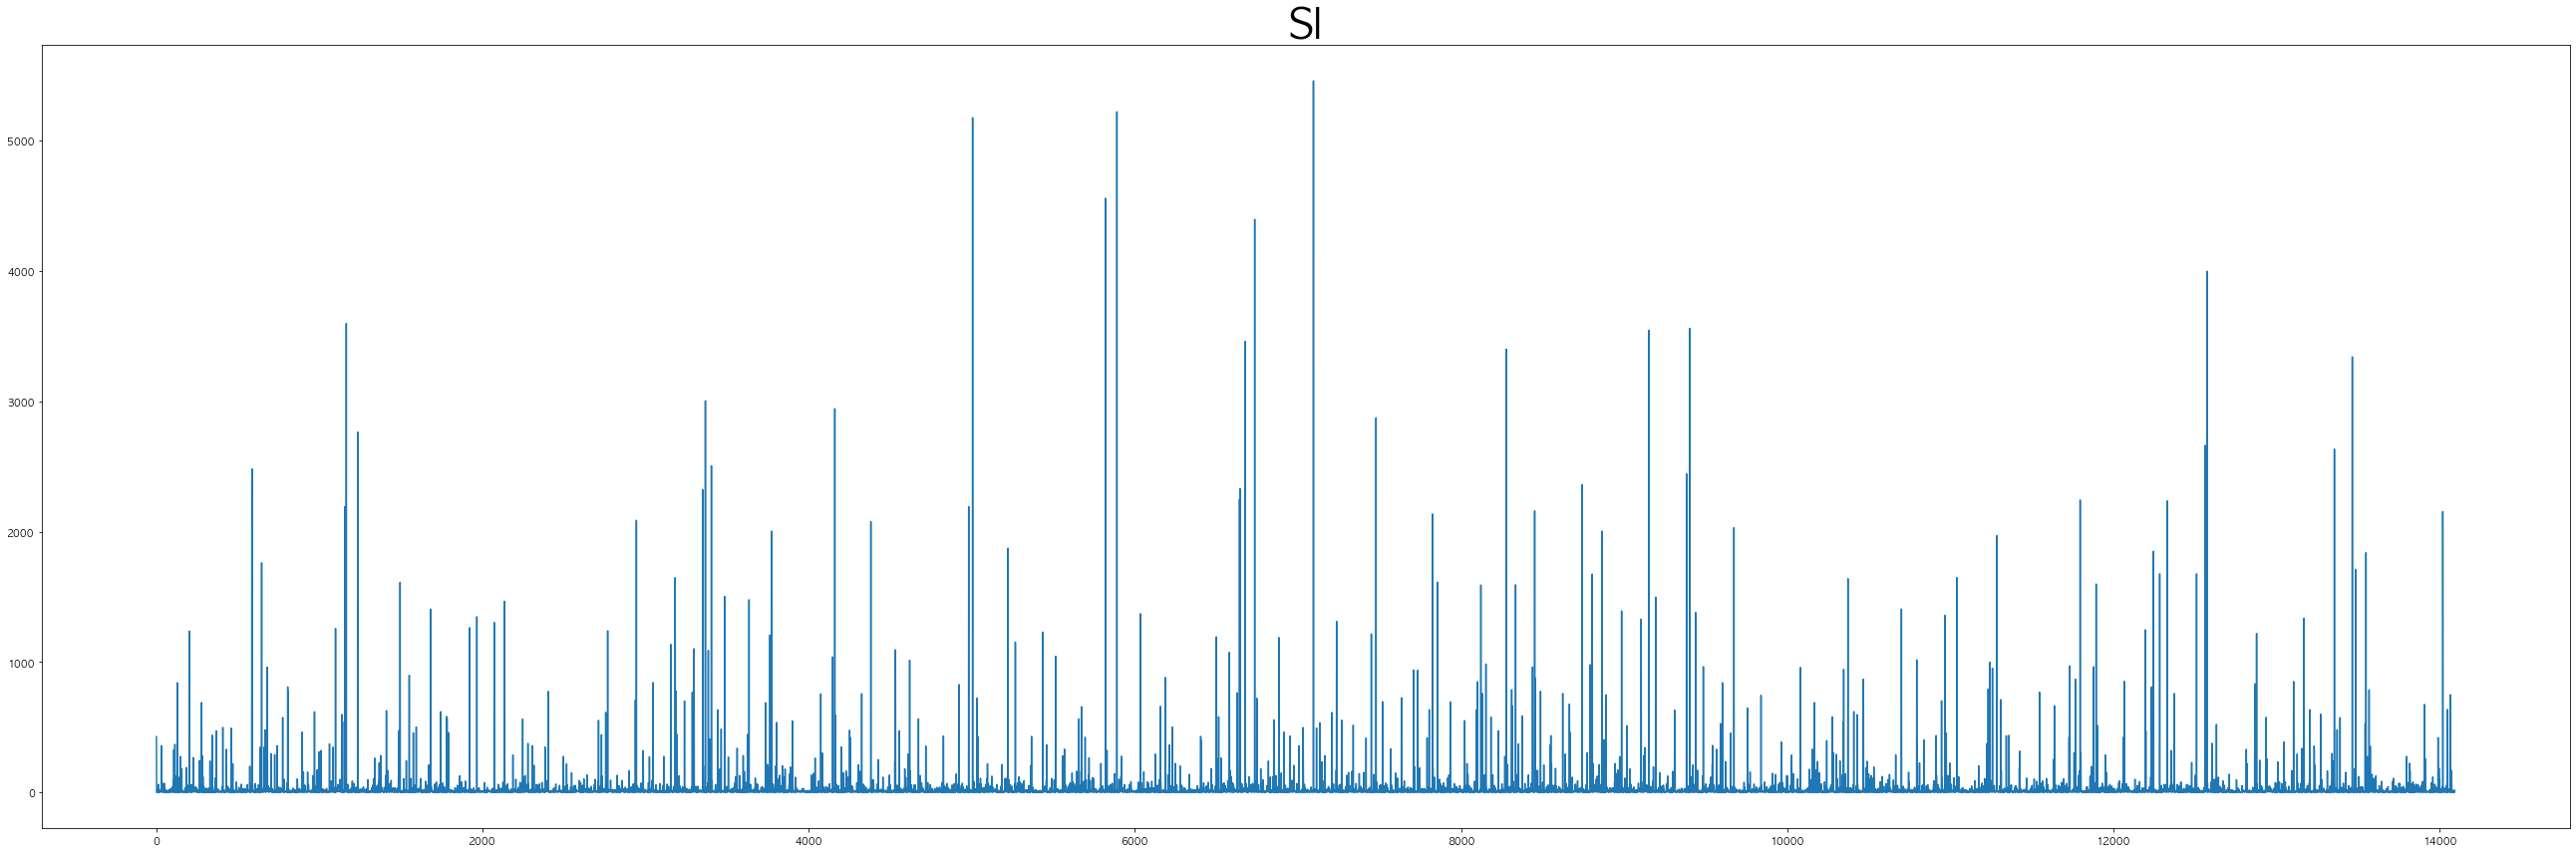

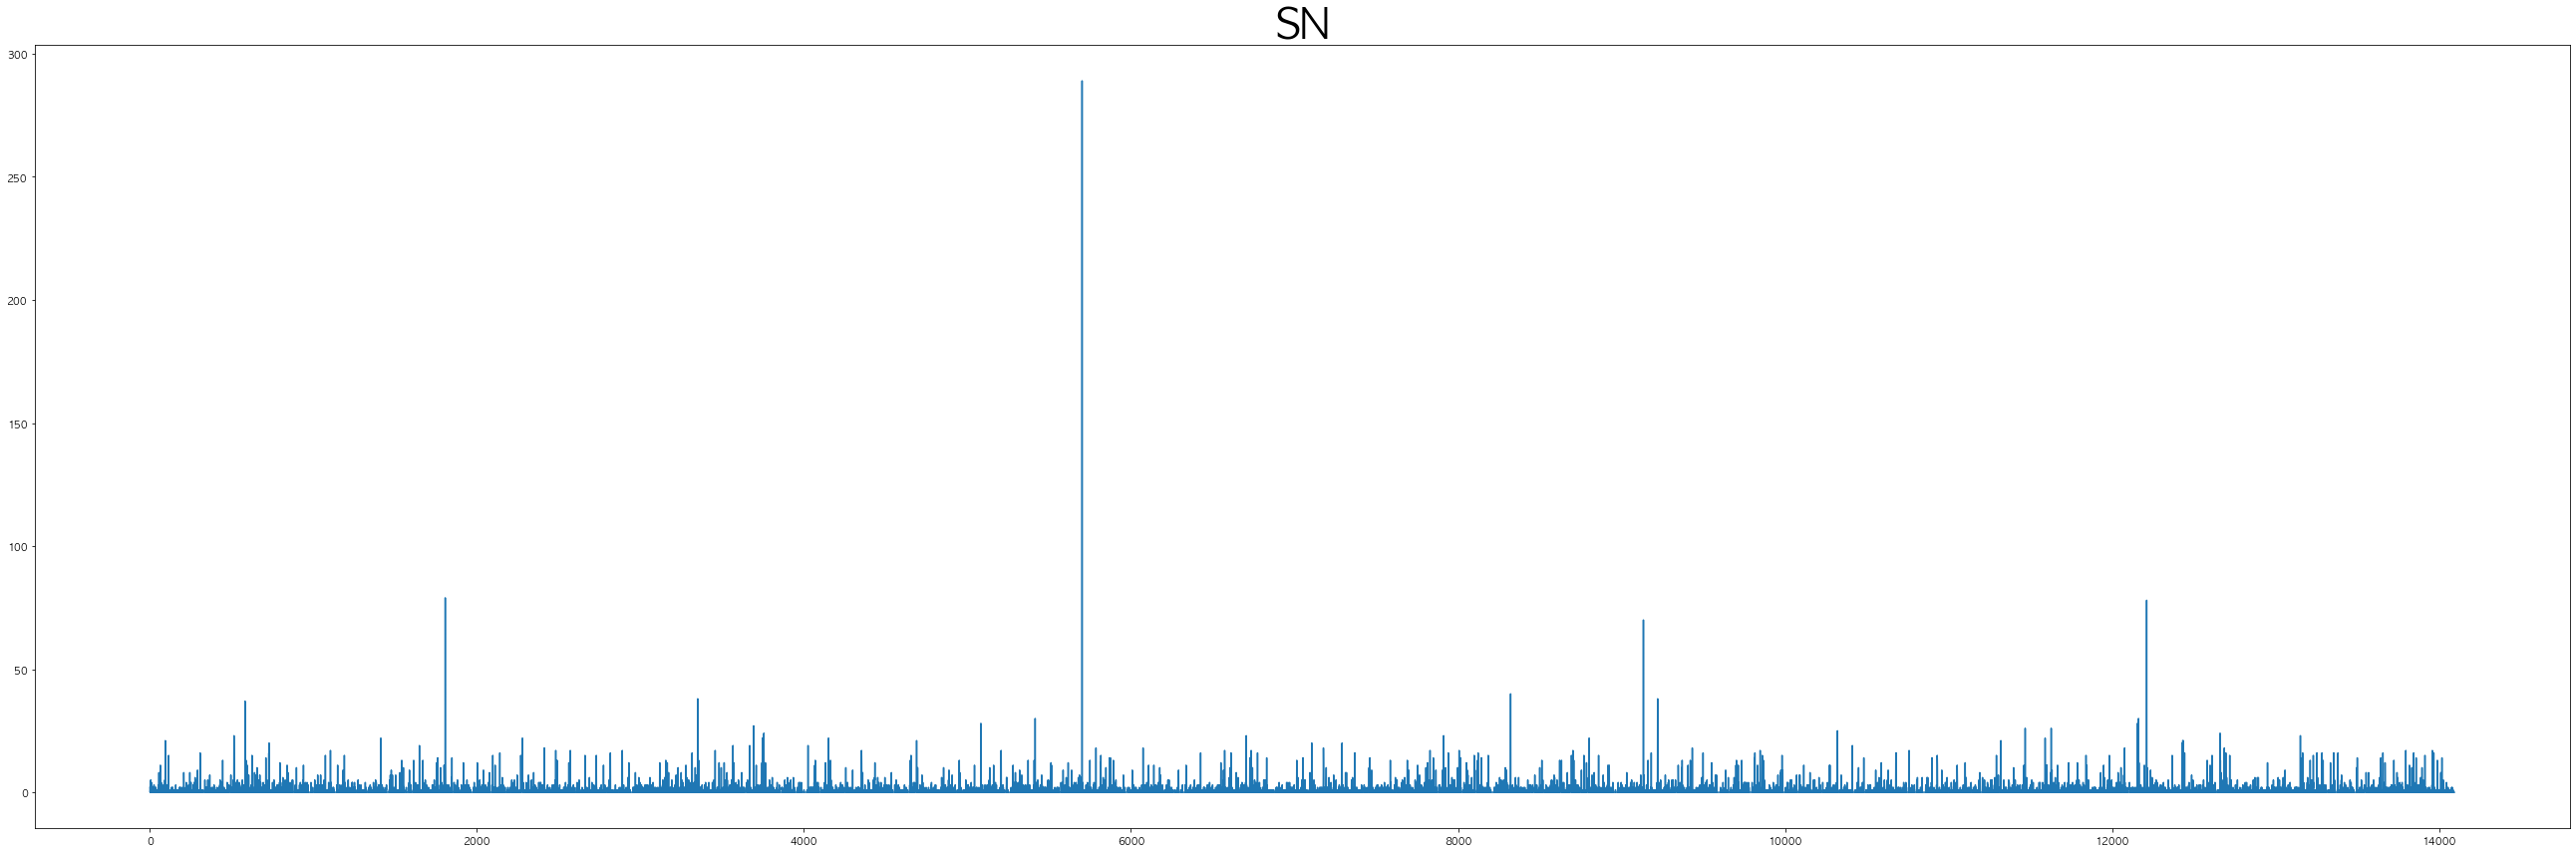

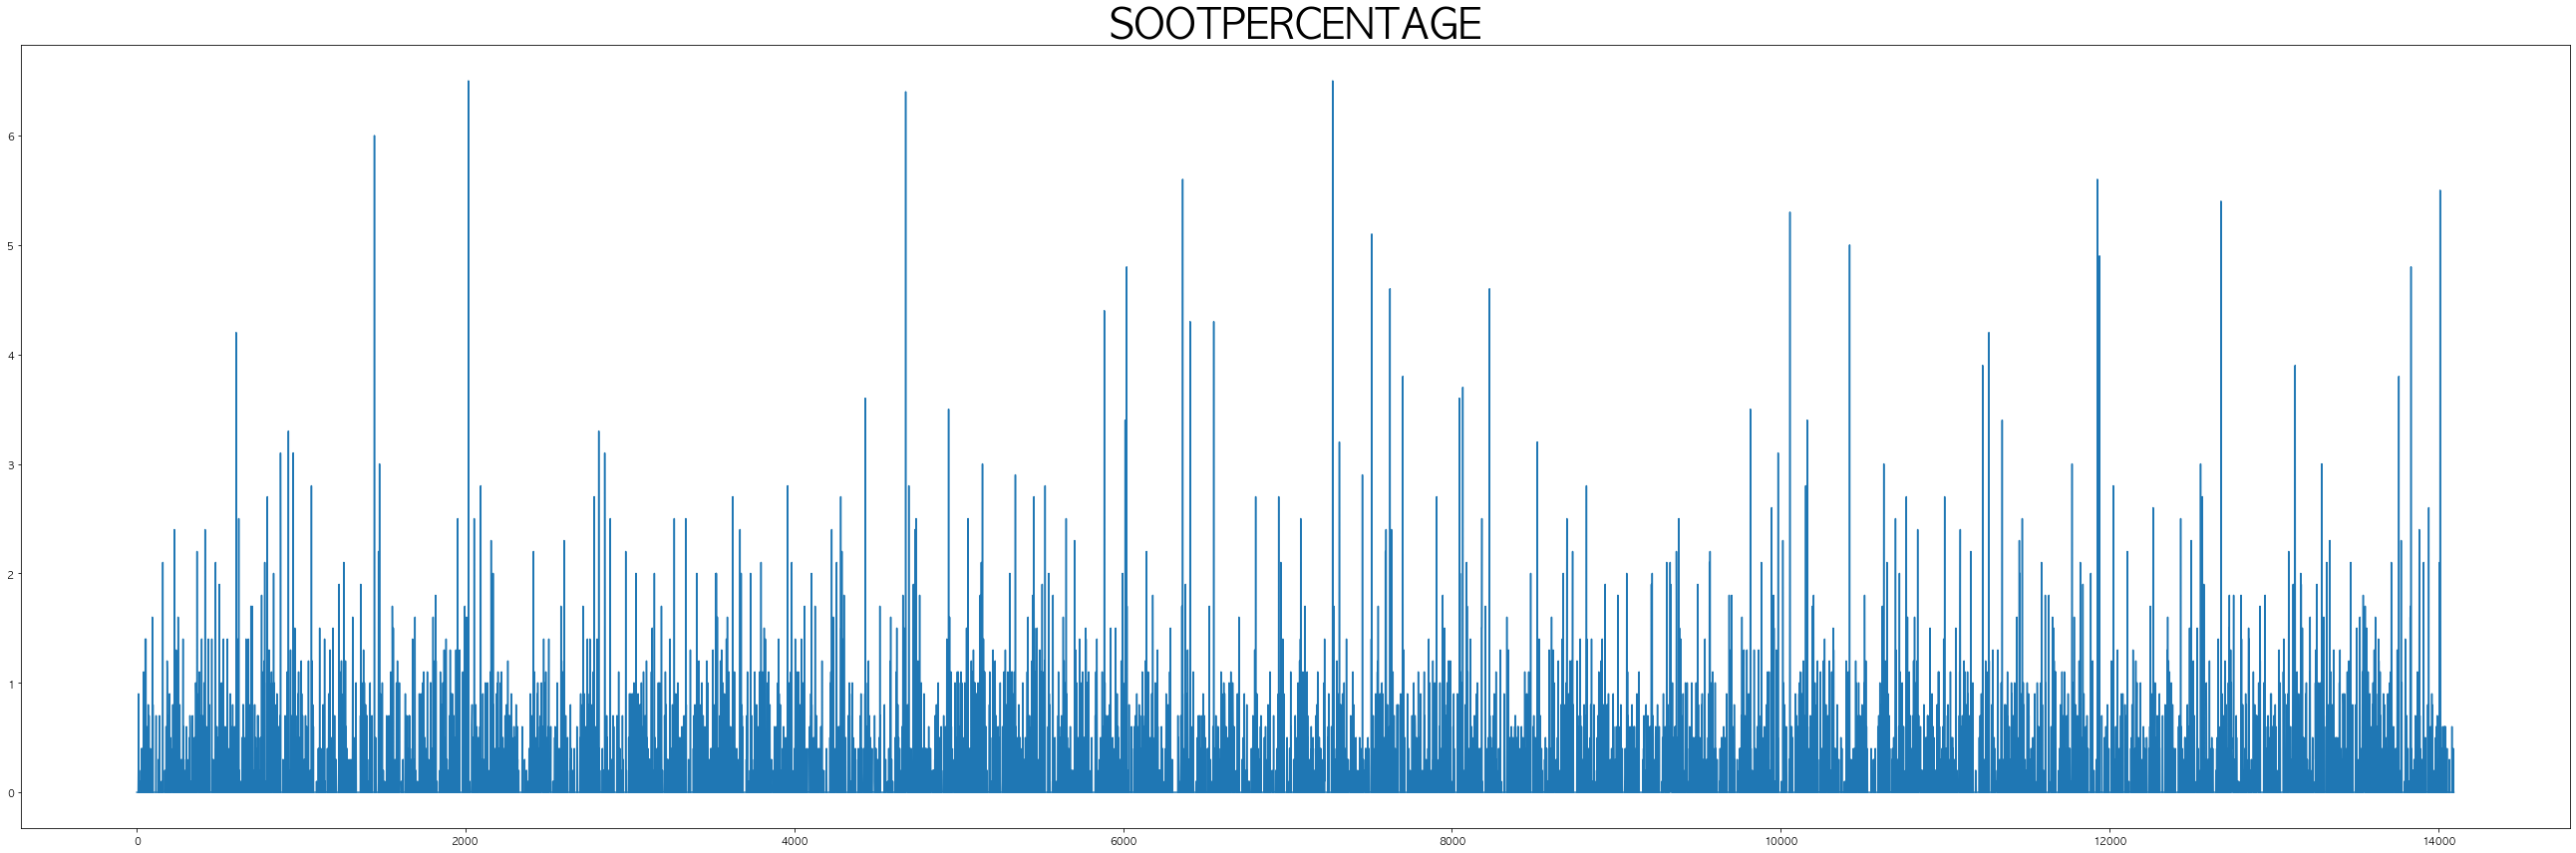

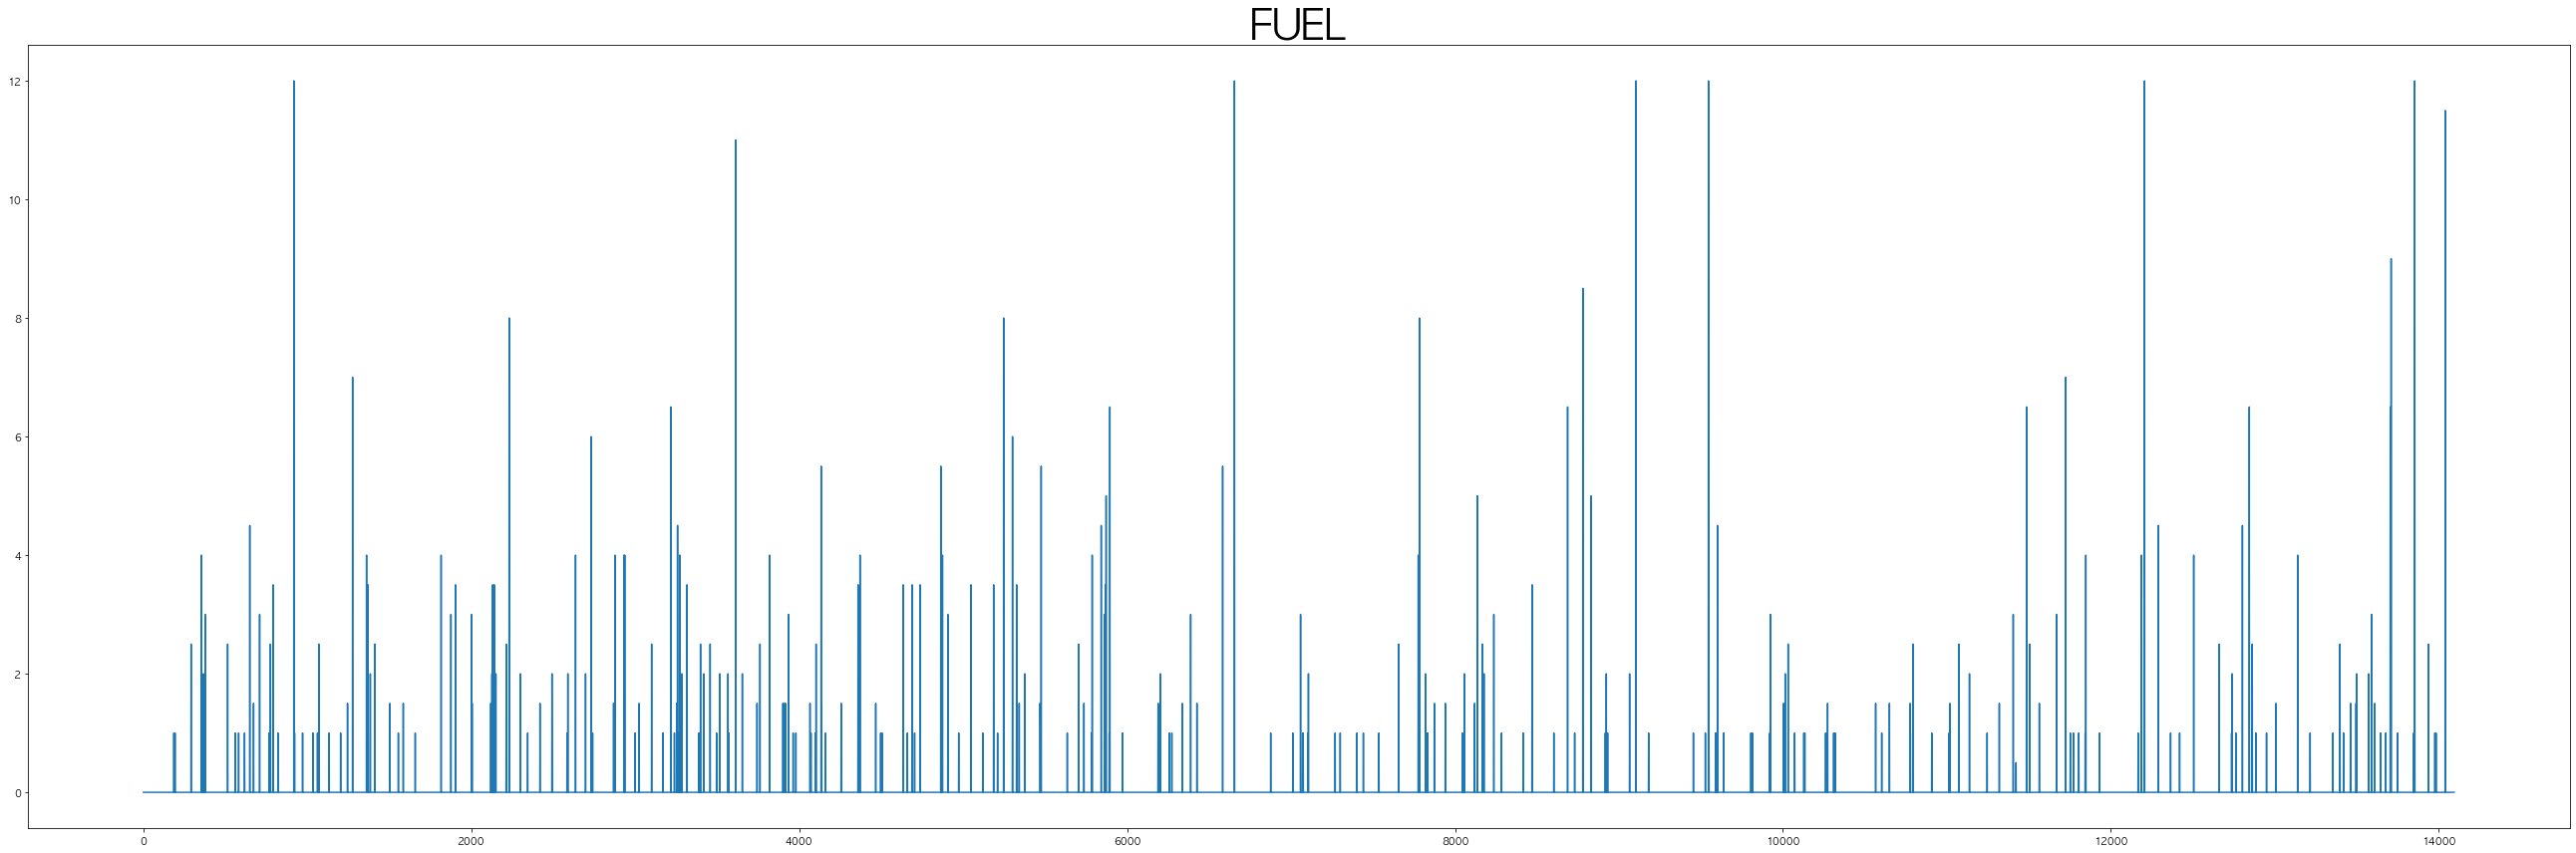

In [28]:
show_plot(train_sample,['AL','B','BA','BE','CA','CD','K','LI','MG','NA','P','PB','S',
                       'SB','SI','SN','SOOTPERCENTAGE','FUEL'])

### Observation
#### 각 원소 함유량에 따라서는 큰 편차는 없어 보임.
#### 다만, AL,B,BA,CD,NA 등 원소에 이상치가 존재하여 전처리 필요

# 입자 크기에 따른 오일 정상 여부

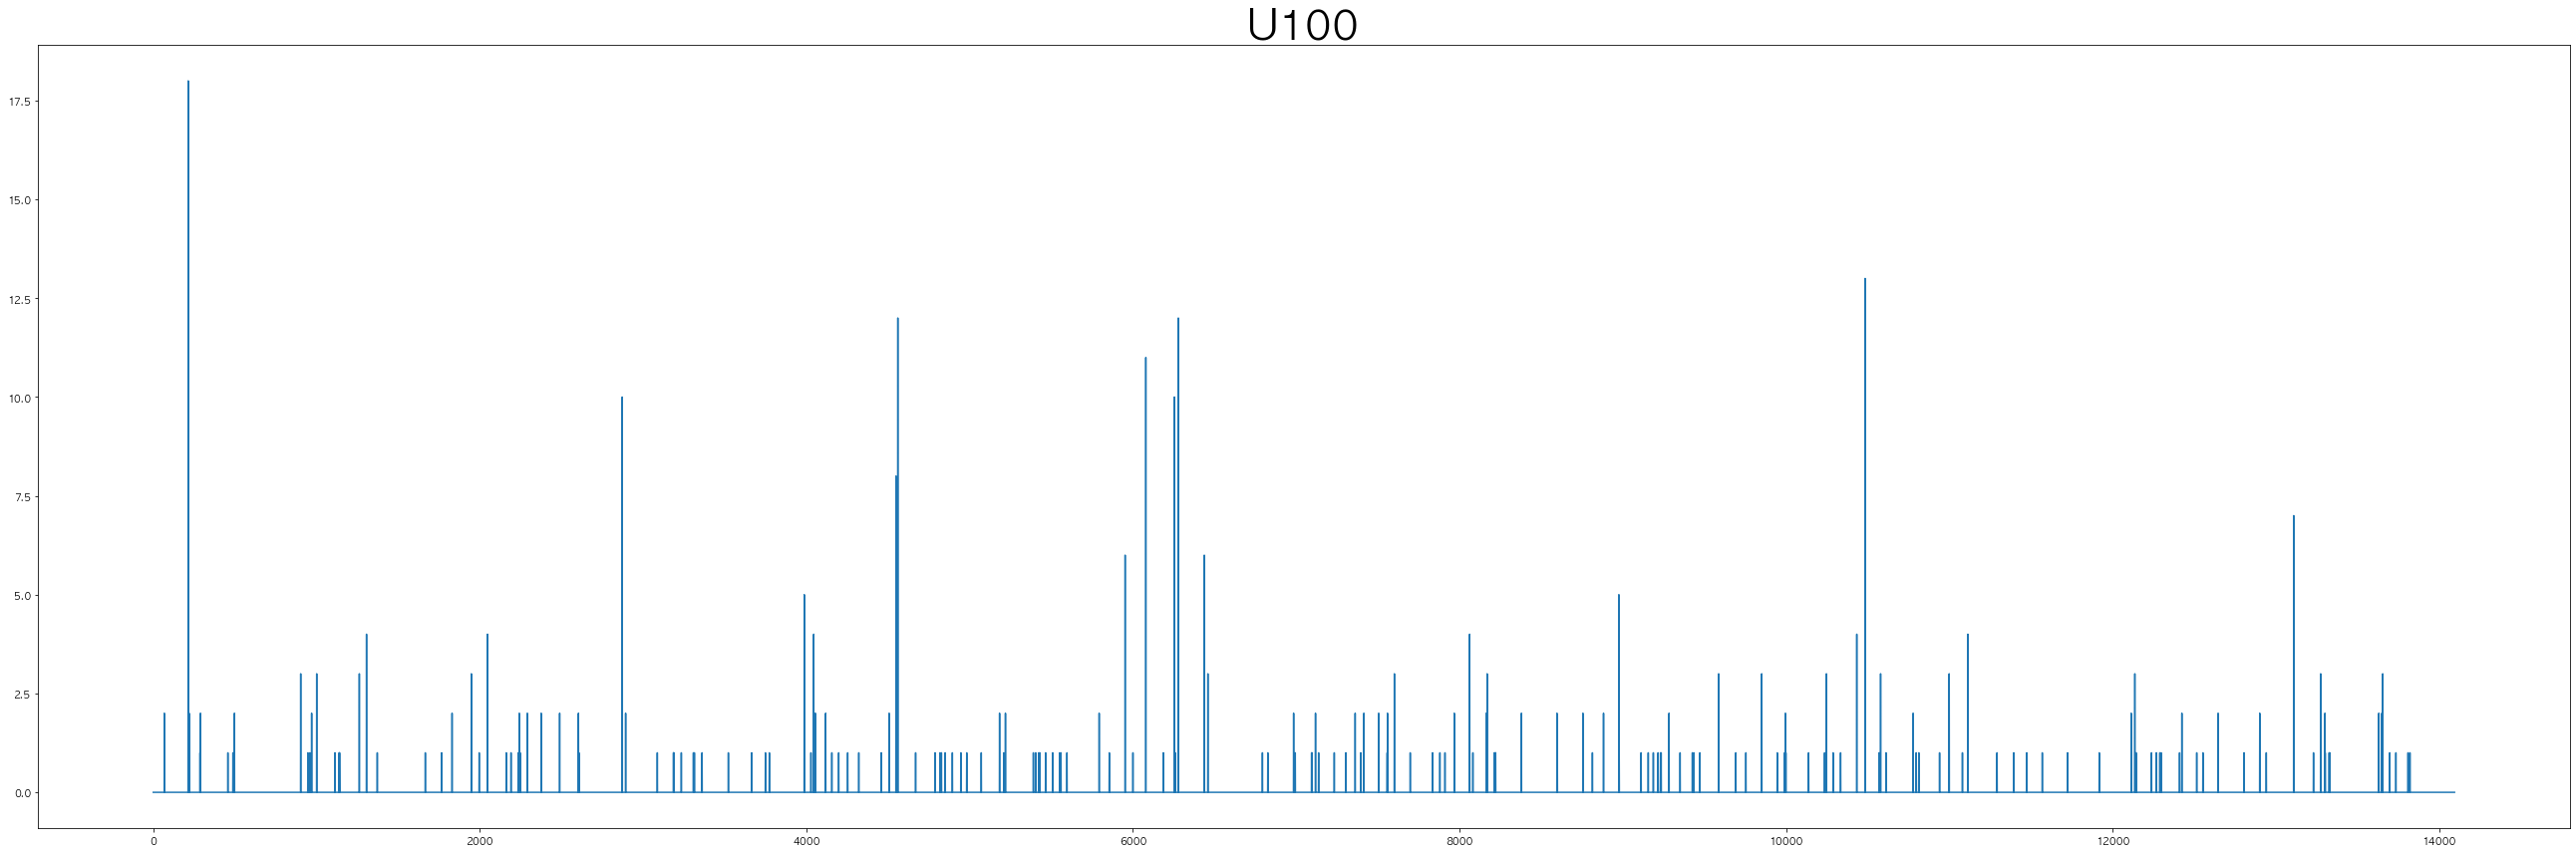

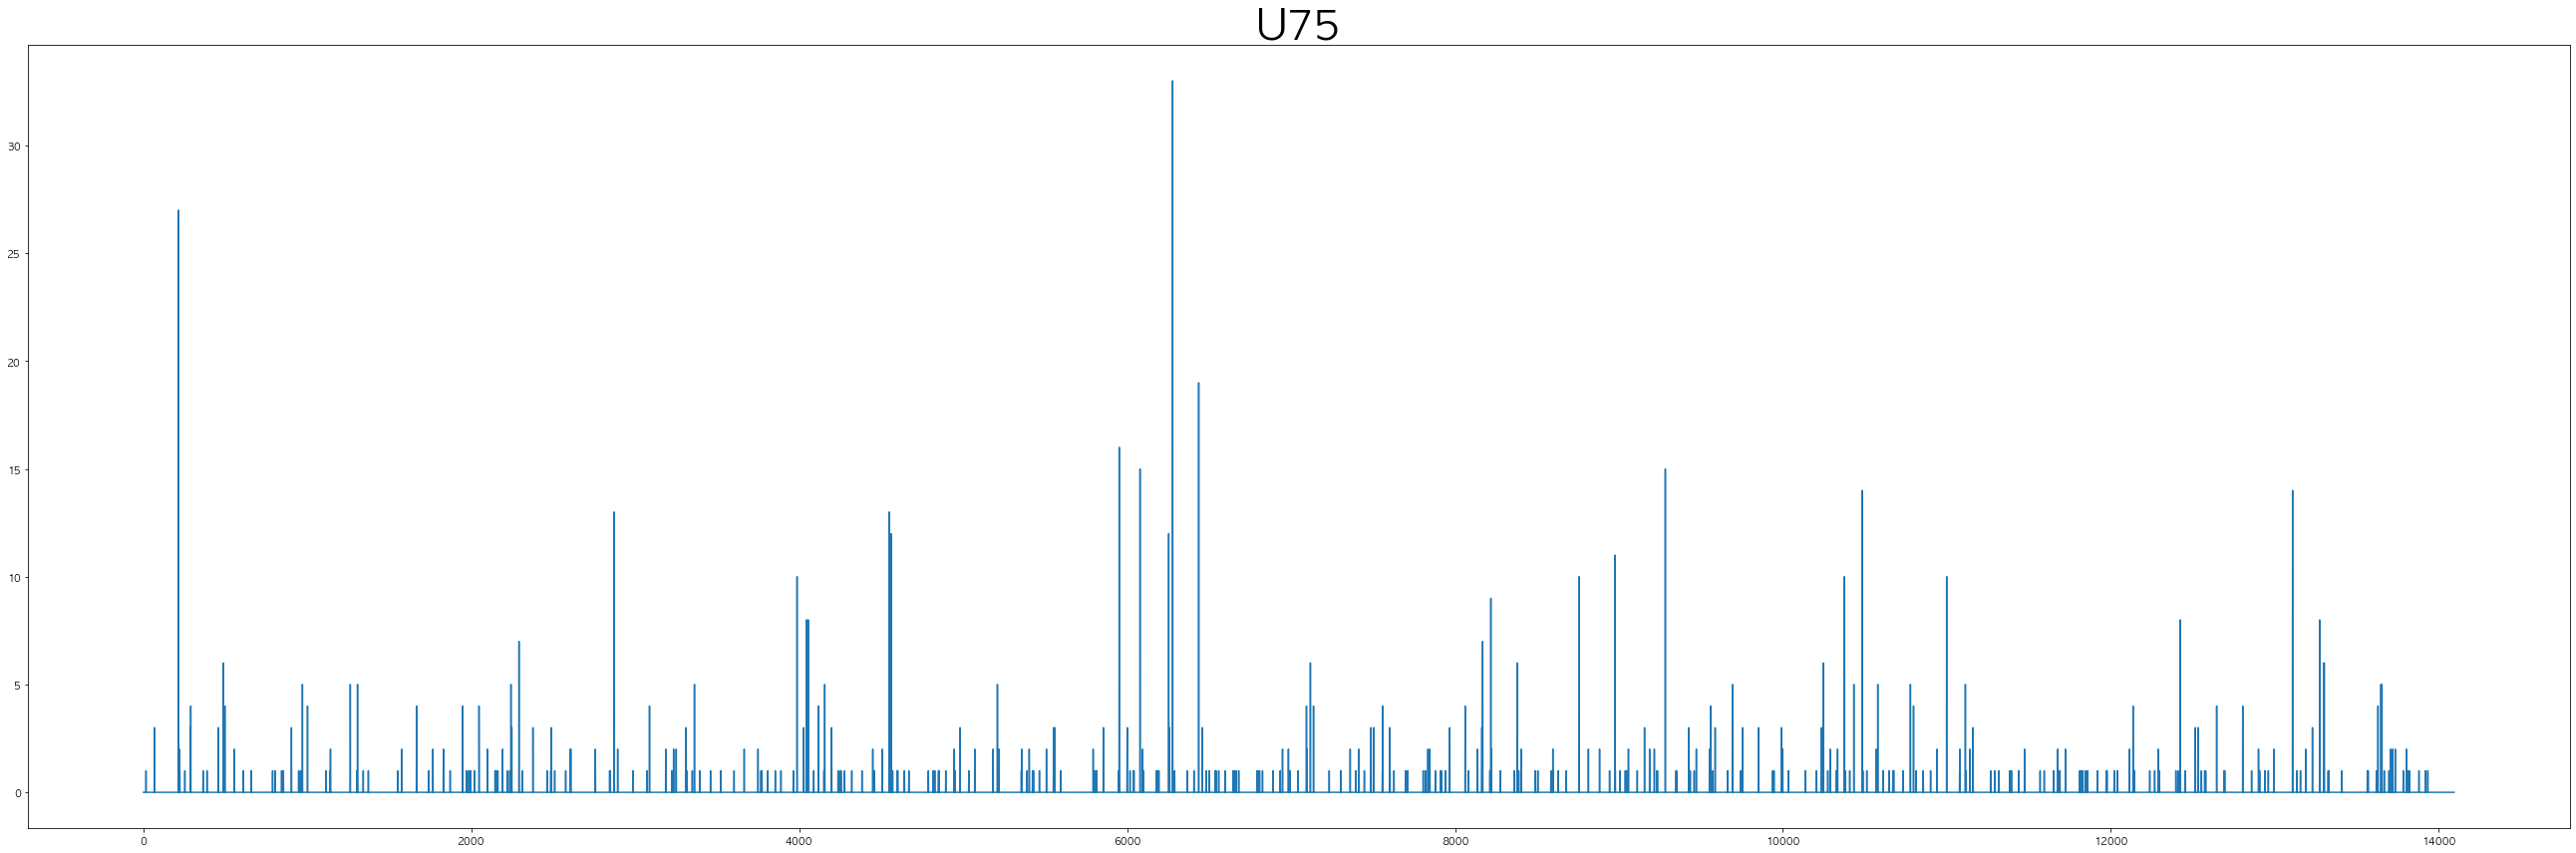

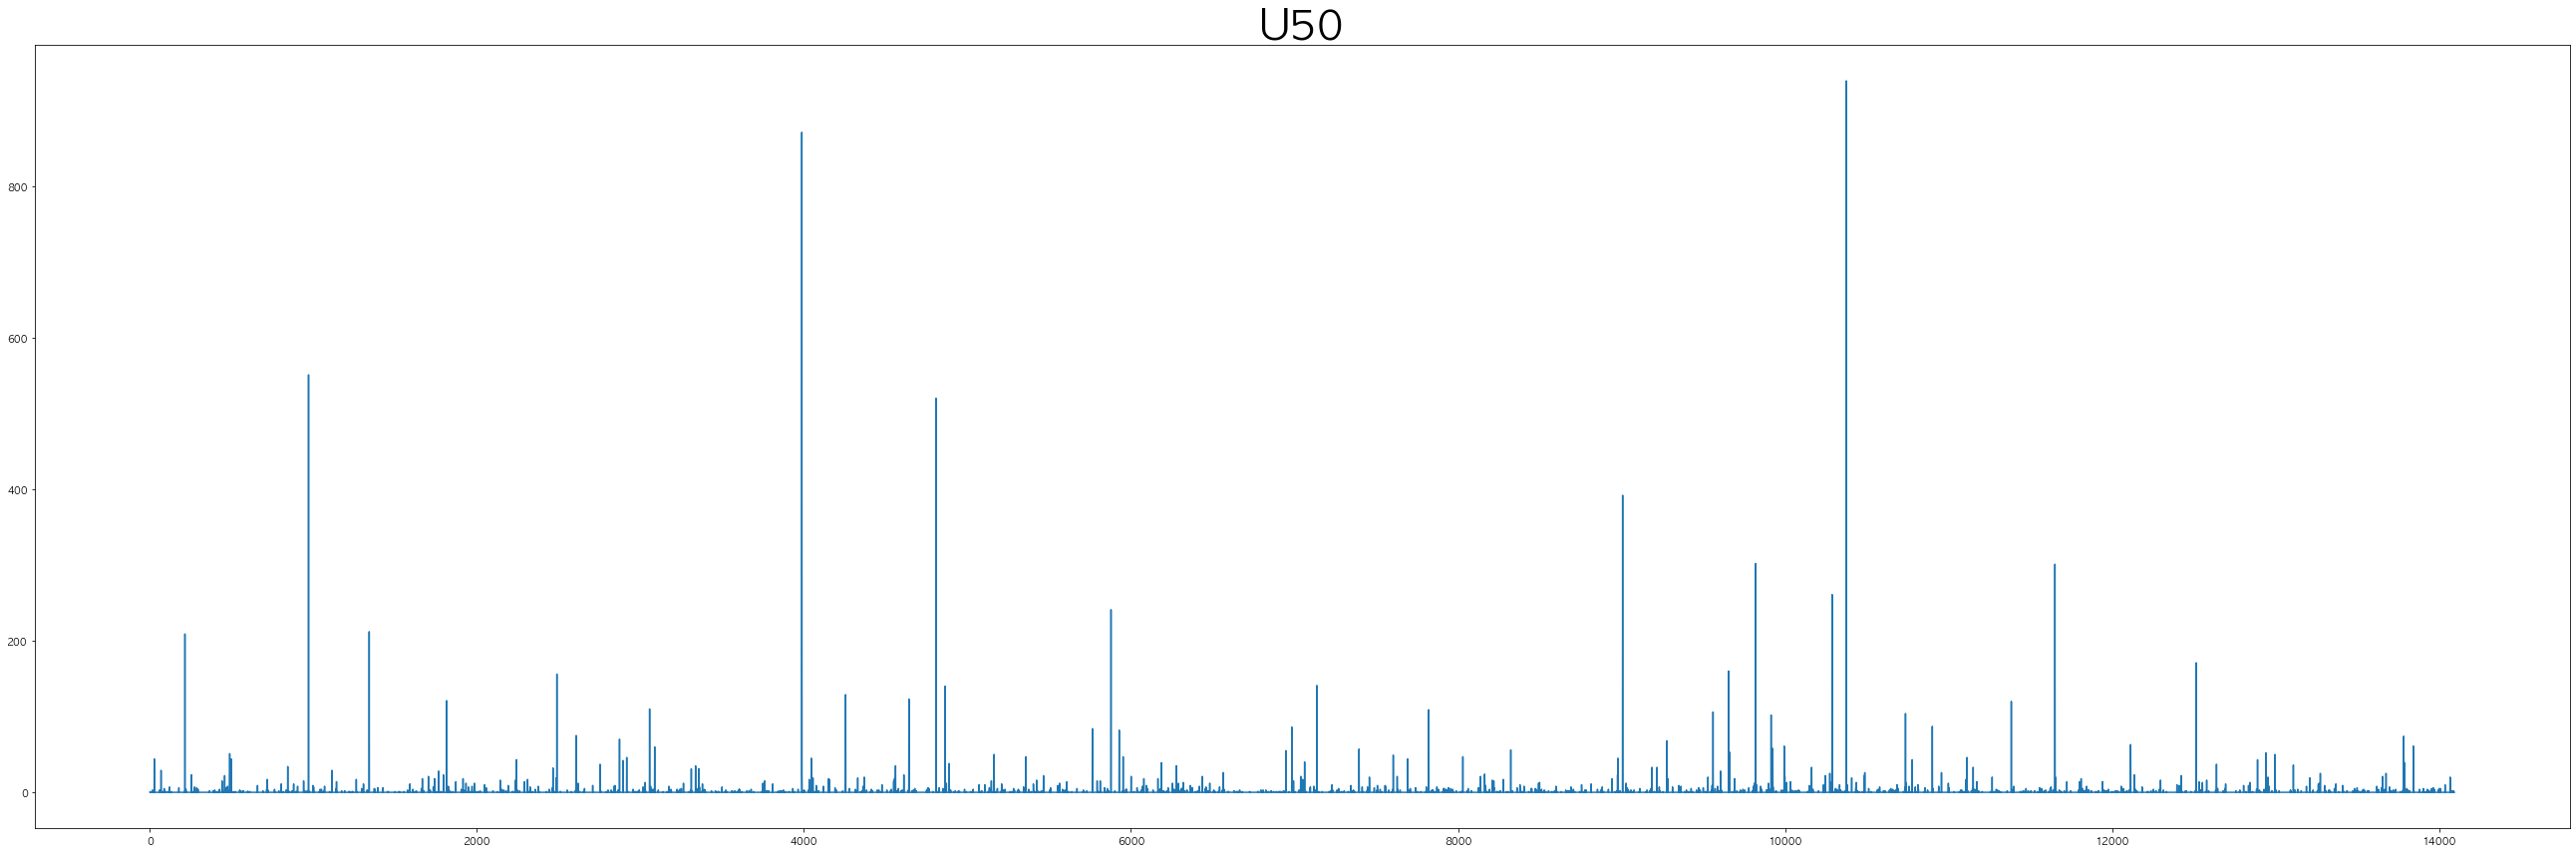

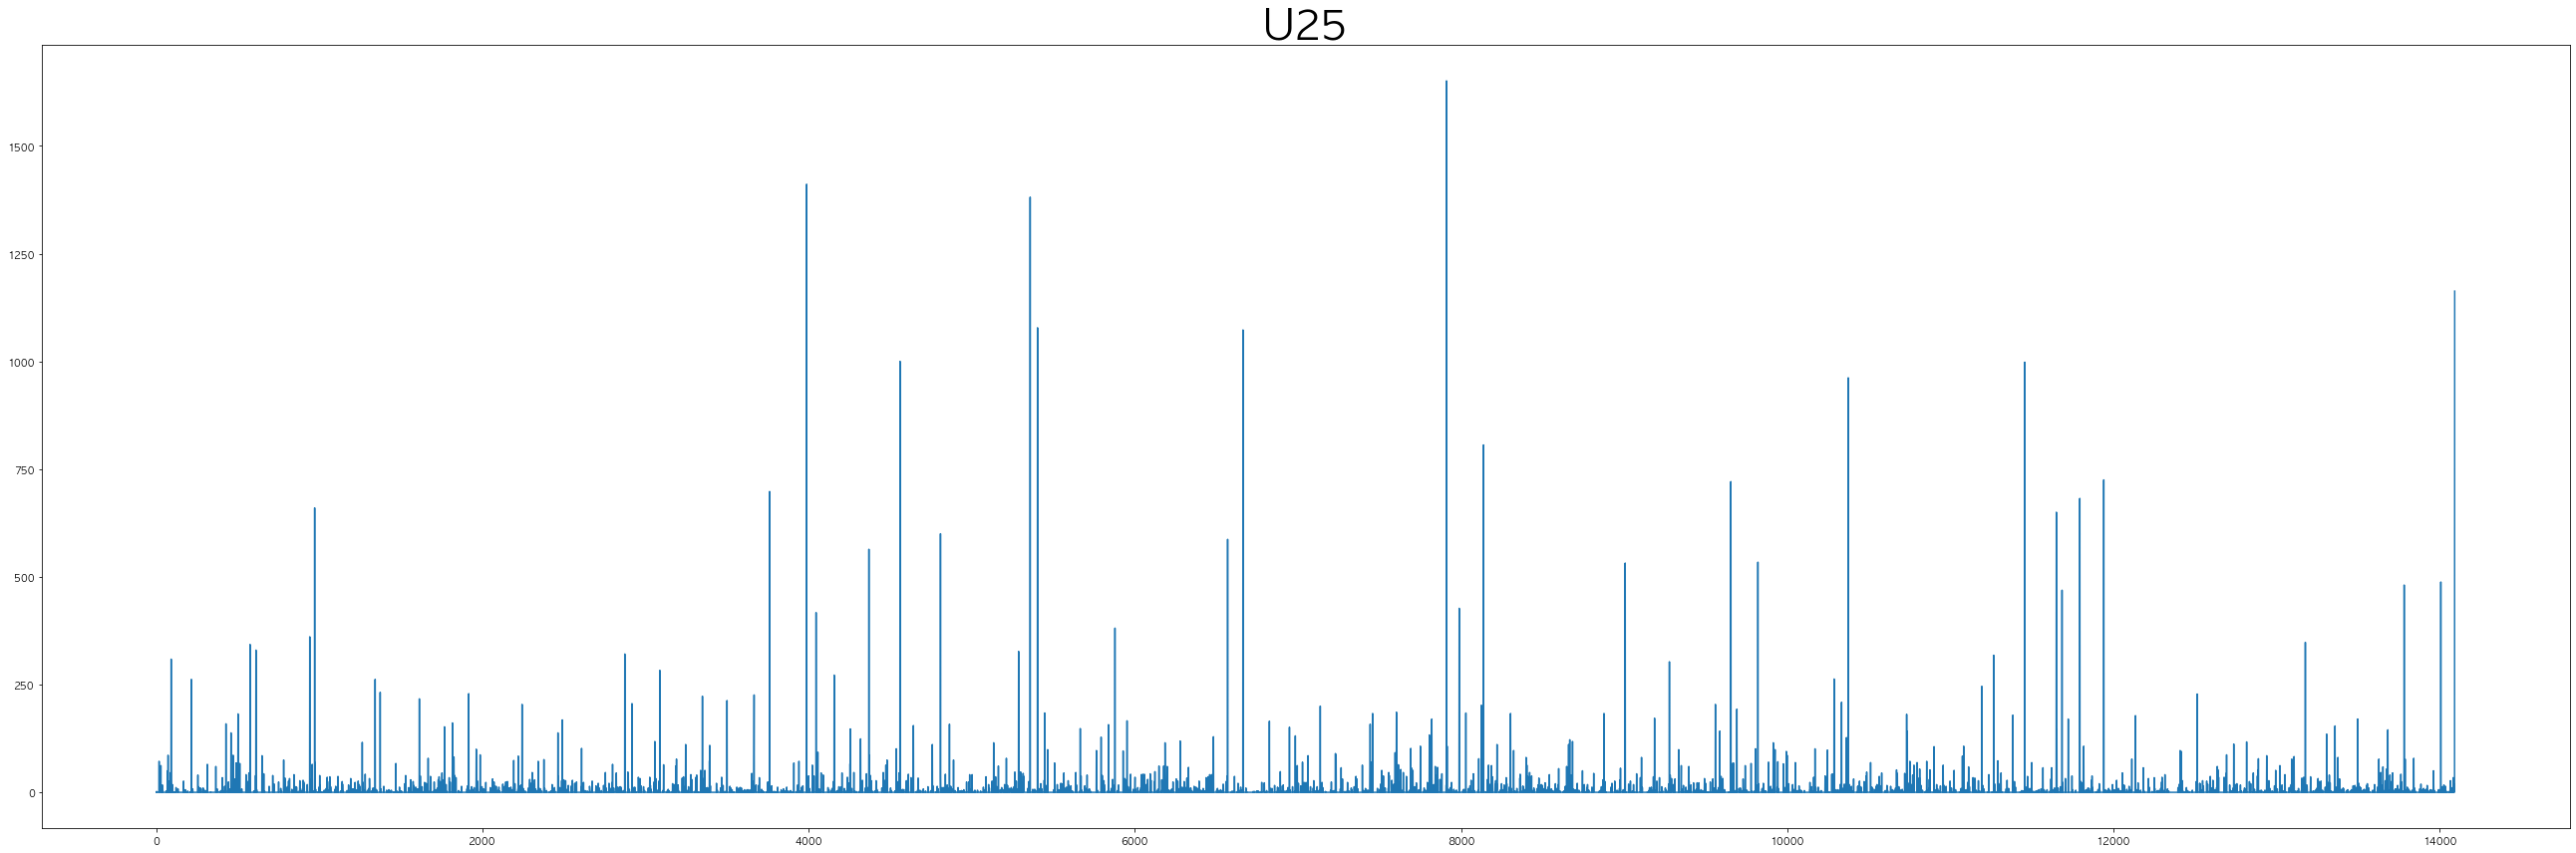

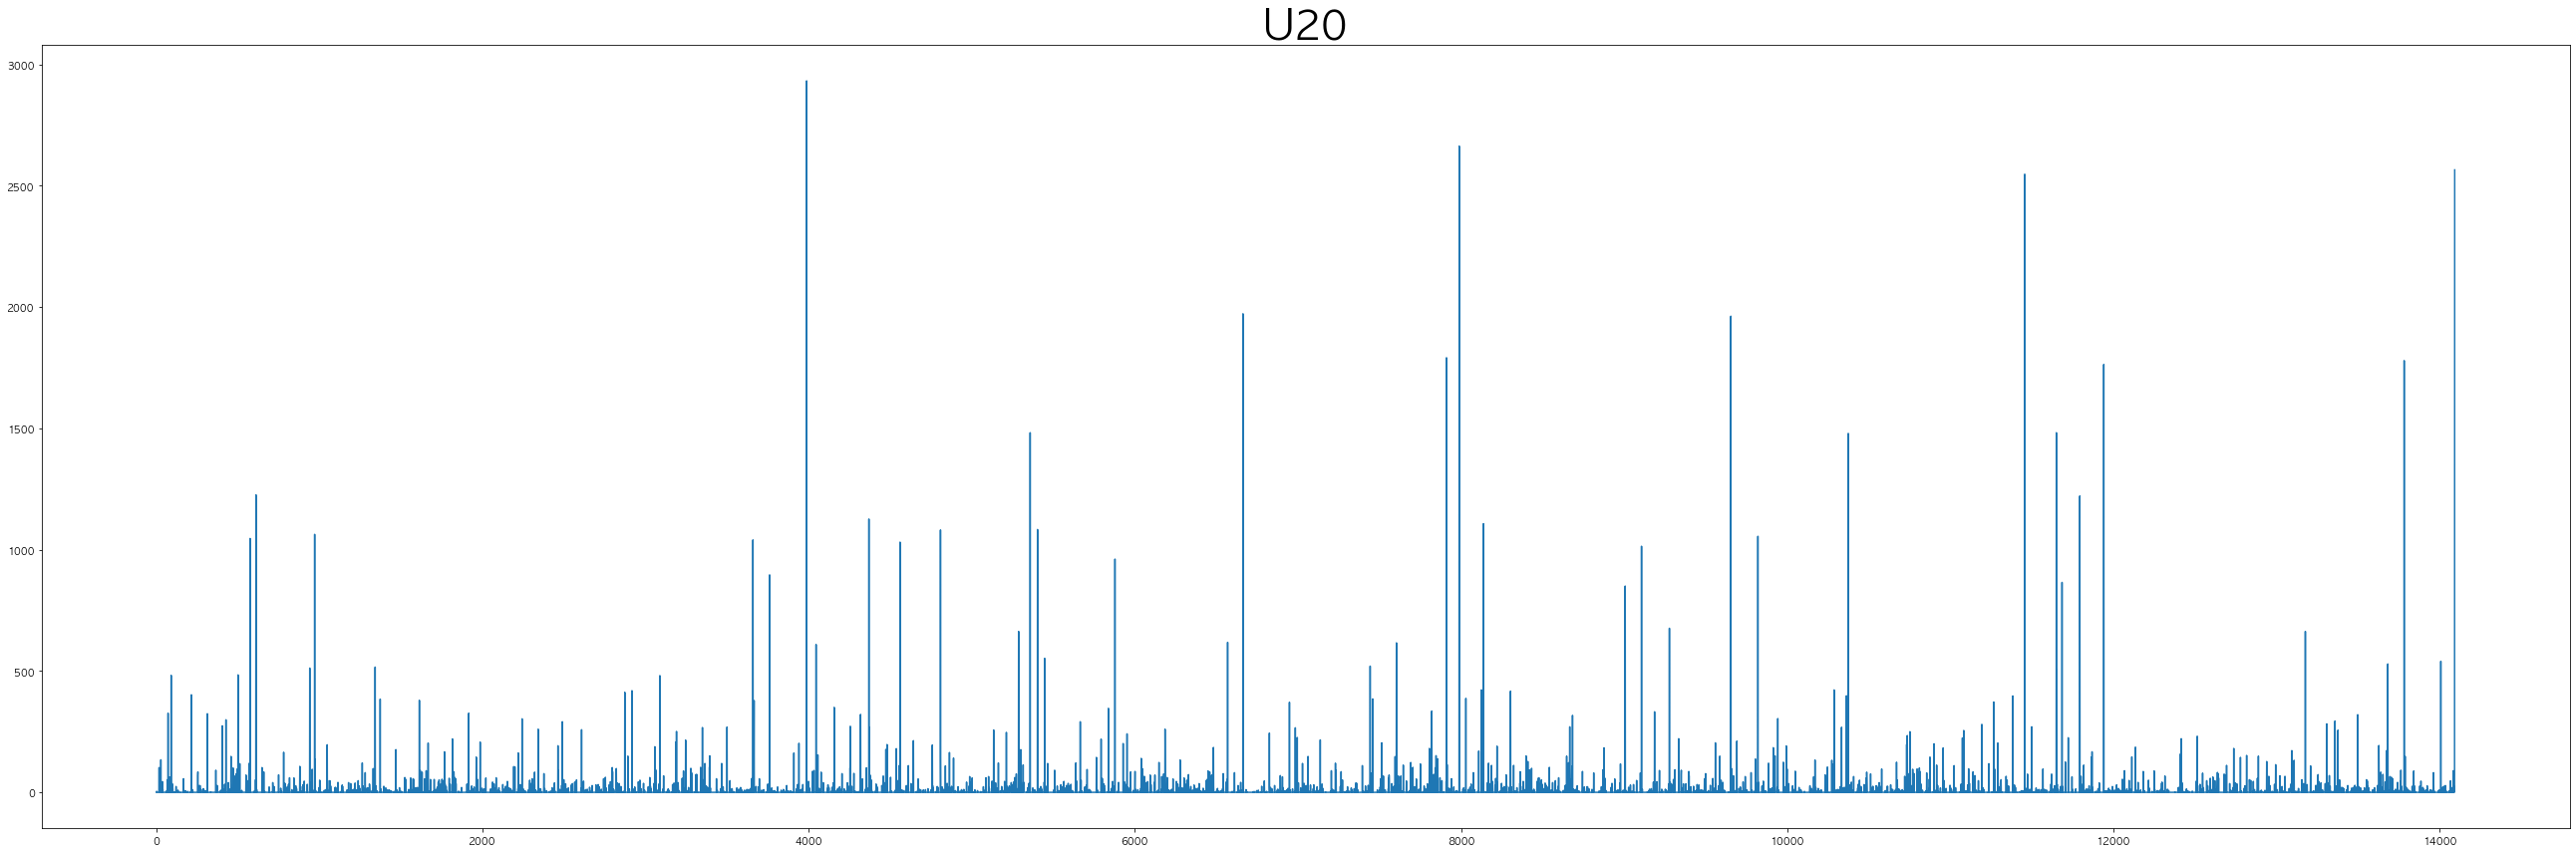

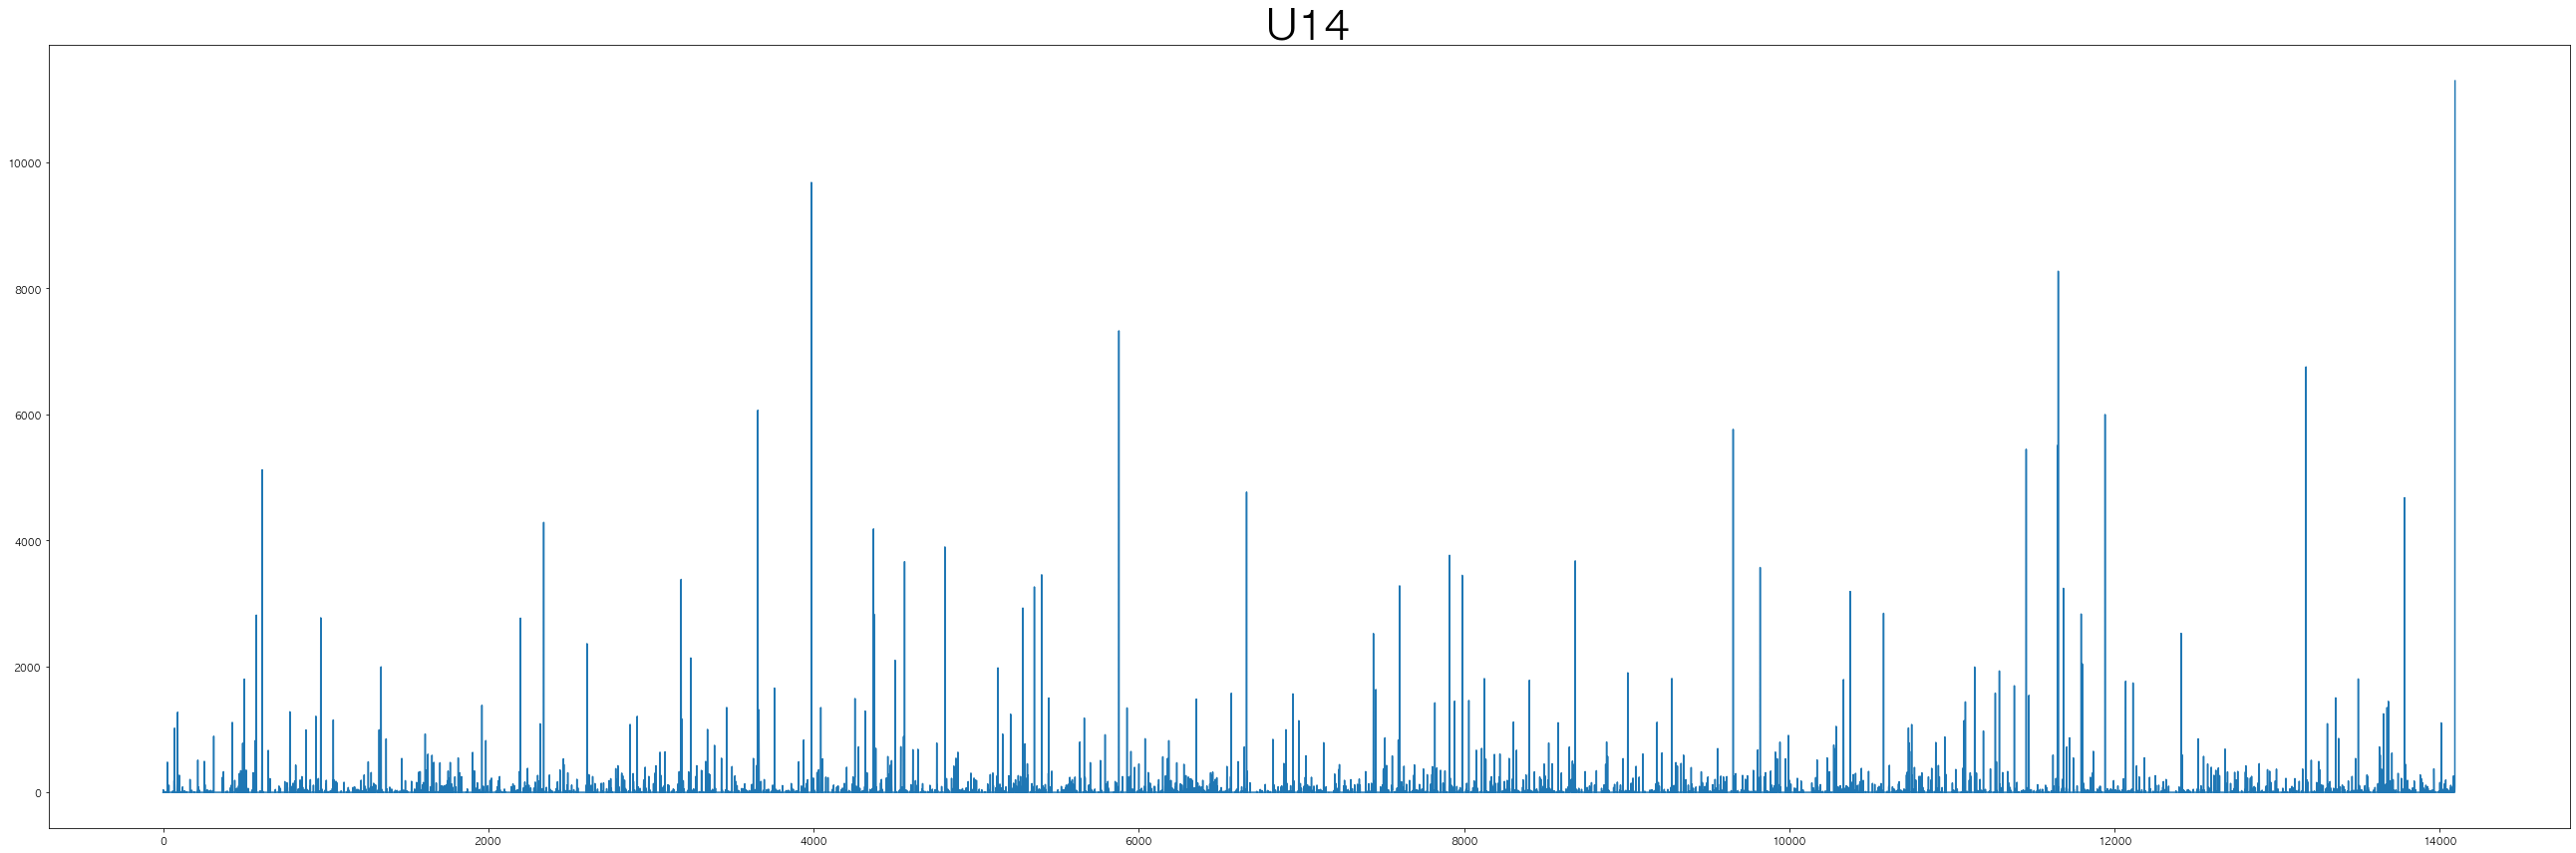

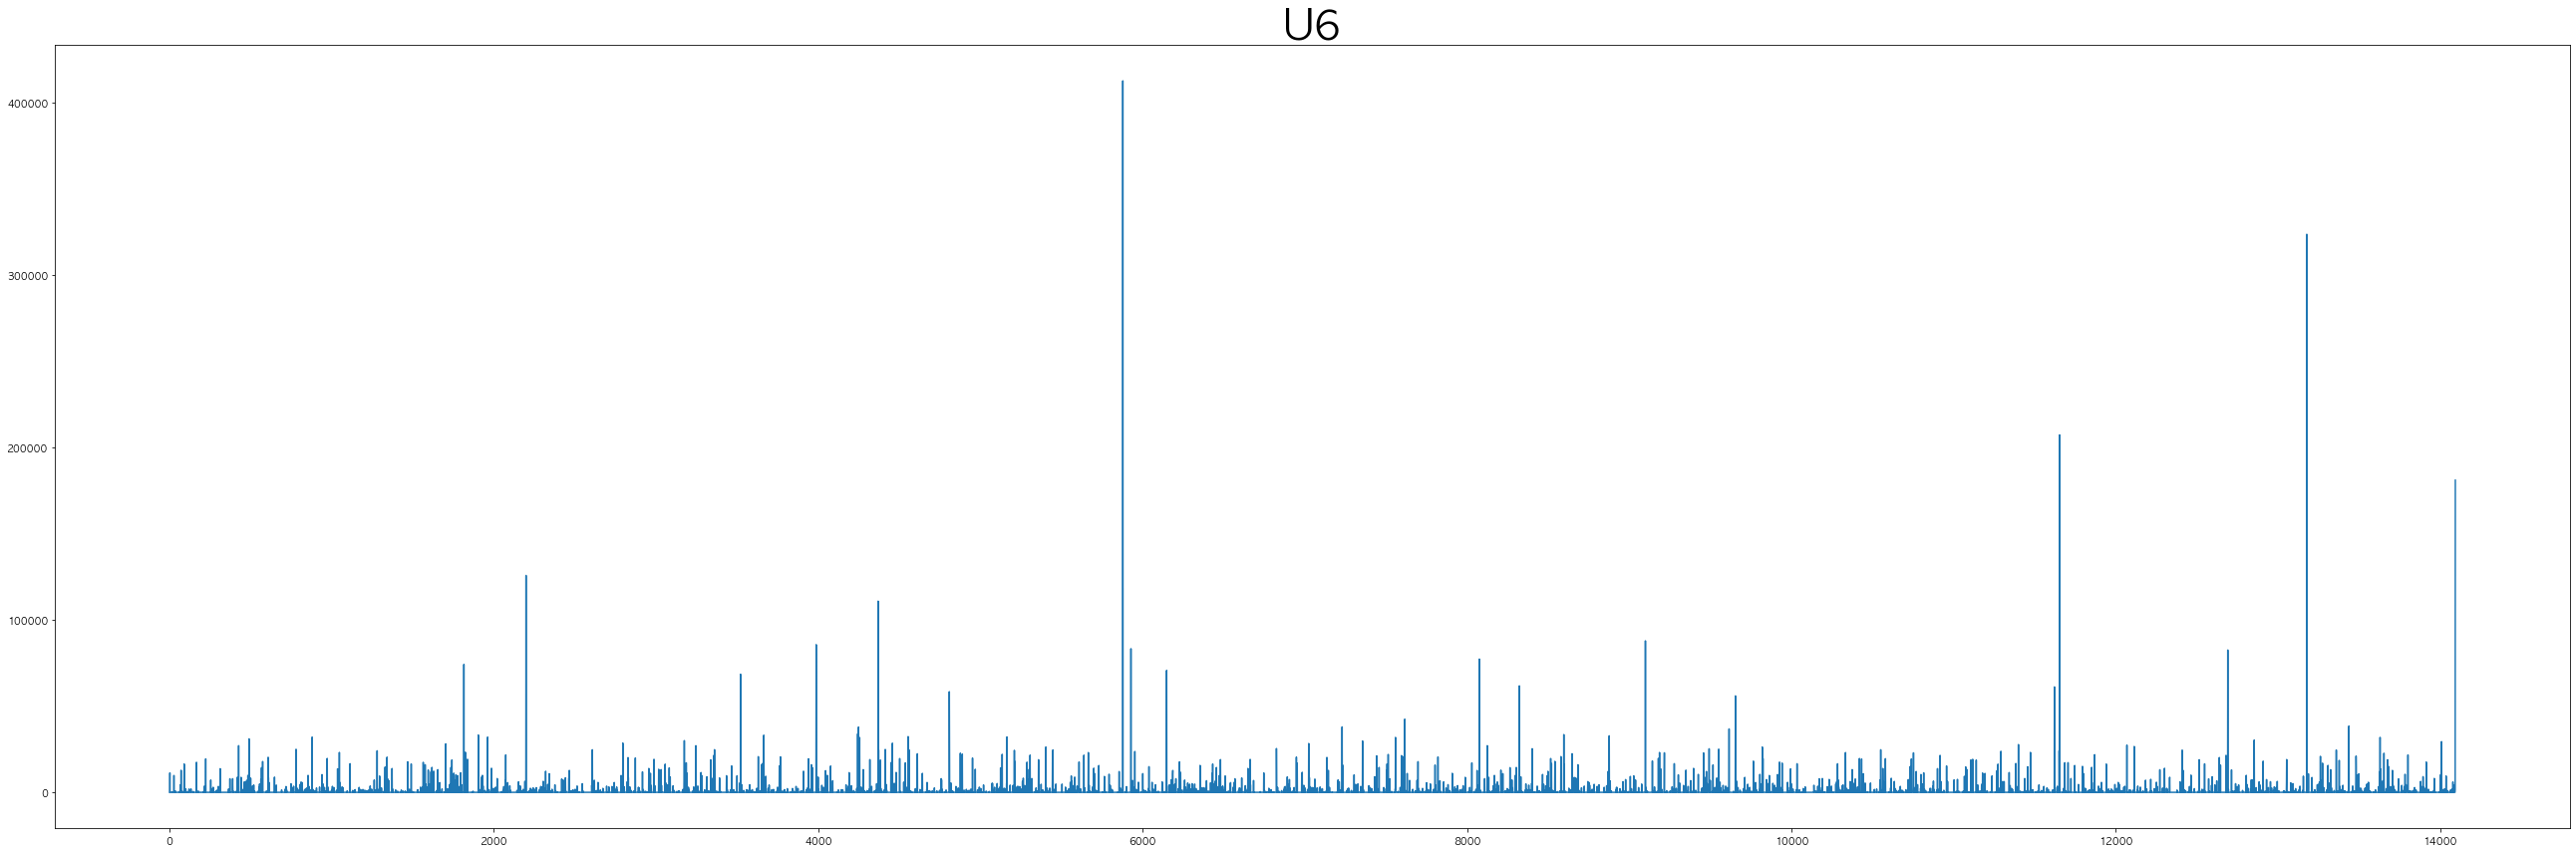

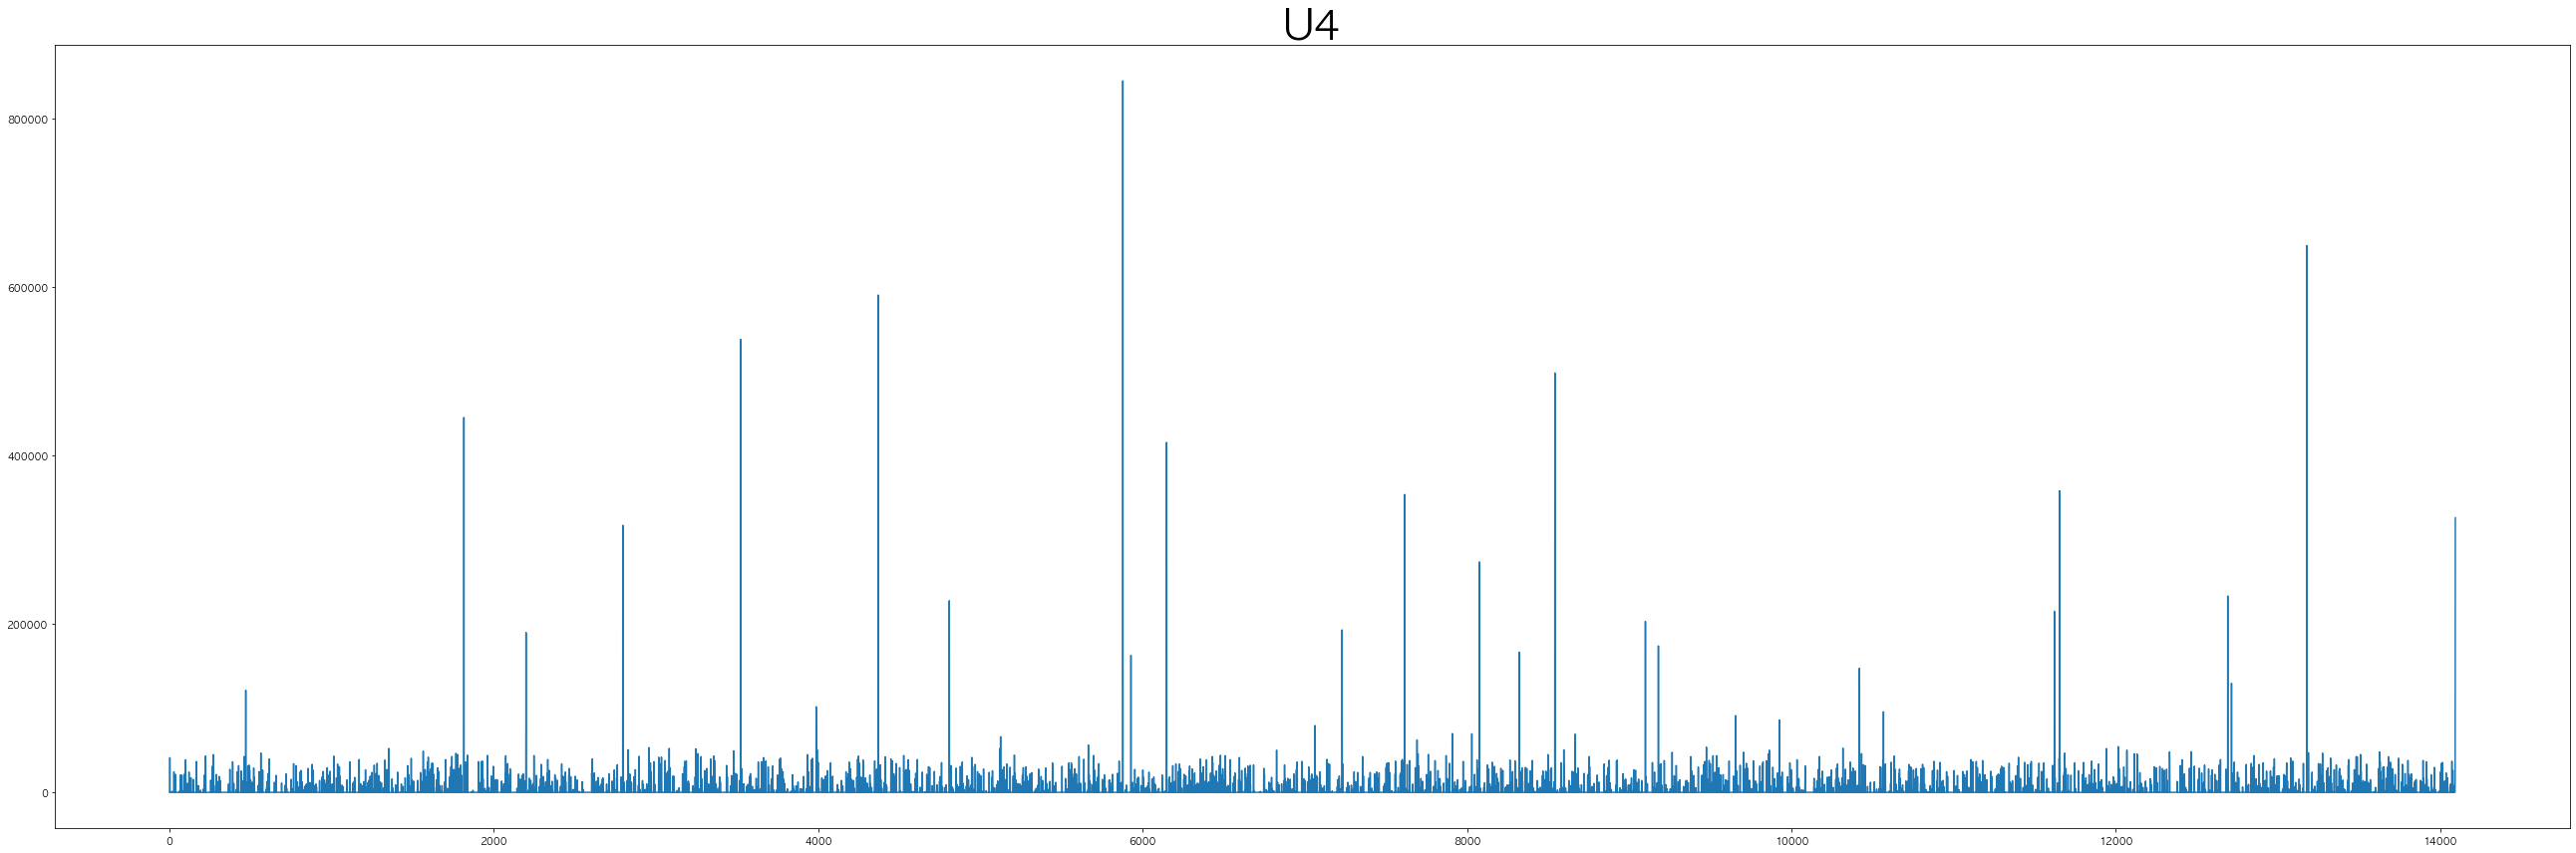

In [29]:
show_plot(train_sample,['U100','U75','U50','U25','U20','U14','U6','U4'])

### Observatoin
#### 이상치들이 존재하는 것 말고는 큰 차이가 없어 보임. 

# Correlation 

In [30]:
new_train_sample

,Component,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,3,1486,2011,7,200,0,3,93,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,154.0,75,0
1,2,1350,2021,51,375,0,2,19,0,0,...,2.0,4.0,6.0,216.0,1454.0,0,0.0,44.0,652,0
2,2,2415,2015,2,200,0,110,1,1,0,...,0.0,3.0,39.0,11261.0,41081.0,0,0.0,72.6,412,1
3,3,7389,2010,2,200,0,8,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.3,7,0
4,3,3954,2015,4,200,0,1,157,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,3,1616,2014,8,200,0,2,201,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,135.4,16,0
14091,1,2784,2013,2,200,0,3,85,0,0,...,0.0,0.0,0.0,0.0,0.0,0,14.5,117.5,1408,0
14092,3,1788,2008,9,550,0,6,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,54.0,1301,0
14093,2,2498,2009,19,550,0,2,4,0,0,...,7.0,8.0,100.0,1625.0,18890.0,0,0.0,44.3,652,0


In [31]:
corr_ratio = new_train_sample[['FH2O','FNOX','FOXID','FSO4','FTBN','Y_LABEL']]
corr_element = new_train_sample[['AL','B','BA','BE','CA','CD','K','LI','MG','NA','P','PB','S',
                       'SB','SI','SN','SOOTPERCENTAGE','FUEL','Y_LABEL']]
corr_size = new_train_sample[['U100','U75','U50','U25','U20','U14','U6','U4','Y_LABEL']]

## 수치에 따른 EDA

In [32]:
corr_ratio

,FH2O,FNOX,FOXID,FSO4,FTBN,Y_LABEL
0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
14090,0.0,0.0,0.0,0.0,0.0,0
14091,13.0,8.0,16.0,21.0,9.1,0
14092,0.0,0.0,0.0,0.0,0.0,0
14093,0.0,0.0,0.0,0.0,0.0,0


In [33]:
train_df = corr_ratio

In [34]:
##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]

## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Y_LABEL', corr_na['Feature 2'] != 'Y_LABEL')].tail(20)



,Feature 1,Feature 2,Correlation Coefficient
10,FH2O,FTBN,0.604072
12,FH2O,FSO4,0.640702
14,FOXID,FH2O,0.641329
16,FNOX,FH2O,0.671791
18,FTBN,FOXID,0.957504
20,FTBN,FNOX,0.957866
22,FSO4,FTBN,0.975925
24,FOXID,FSO4,0.978392
26,FNOX,FOXID,0.982395
28,FNOX,FSO4,0.982497


## 함유량에 따른 상관관계

In [35]:
corr_element

,AL,B,BA,BE,CA,CD,K,LI,MG,NA,P,PB,S,SB,SI,SN,SOOTPERCENTAGE,FUEL,Y_LABEL
0,3,93,0,0,3059,0.0,27.0,1,14,16,1951,0,21370,0,427,2,0.0,0.0,0
1,2,19,0,0,2978,0.0,0.0,0,1,1,572,2,1117,0,0,0,0.0,0.0,0
2,110,1,1,0,17,0.0,0.0,0,0,2,328,0,1334,0,0,1,0.0,0.0,1
3,8,3,0,0,1960,0.0,0.0,0,4,0,906,1,21774,2,1,1,0.0,0.0,0
4,1,157,0,0,71,0.0,0.0,0,0,2,309,0,18470,0,2,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,2,201,1,0,6,0.0,1.0,0,0,8,477,0,22000,0,2,0,0.0,0.0,0
14091,3,85,0,0,2945,0.0,4.0,0,36,3,1163,1,5494,0,5,0,0.4,0.0,0
14092,6,0,1,0,13,0.0,0.0,1,16,3,1175,1,9640,2,18,0,0.0,0.0,0
14093,2,4,0,0,2244,0.0,0.0,0,0,0,441,1,1313,0,0,0,0.0,0.0,0


In [36]:
train_df = corr_element 

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Y_LABEL', corr_na['Feature 2'] != 'Y_LABEL')].tail(20)


,Feature 1,Feature 2,Correlation Coefficient
296,S,CA,0.078747
298,P,SN,0.080960
300,MG,SN,0.082470
302,SI,AL,0.087274
304,FUEL,SOOTPERCENTAGE,0.092680
306,SOOTPERCENTAGE,PB,0.102152
308,K,PB,0.102300
310,PB,NA,0.103961
314,SN,SOOTPERCENTAGE,0.117250
316,SN,PB,0.122374


In [37]:
corr_na

,Feature 1,Feature 2,Correlation Coefficient
0,AL,LI,0.000008
2,AL,B,0.000037
4,SB,MG,0.000481
6,BA,PB,0.000497
8,AL,BE,0.000858
...,...,...,...
332,K,NA,0.310793
334,CA,B,0.356121
336,Y_LABEL,AL,0.370512
338,S,P,0.475394


## 입자 크기에 따른 상관관계 

In [38]:
corr_size

,U100,U75,U50,U25,U20,U14,U6,U4,Y_LABEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0
2,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
14090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14093,0.0,0.0,0.0,7.0,8.0,100.0,1625.0,18890.0,0


In [39]:
train_df = corr_size 

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Y_LABEL', corr_na['Feature 2'] != 'Y_LABEL')].tail(20)




,Feature 1,Feature 2,Correlation Coefficient
32,U20,U75,0.202601
34,U50,U100,0.210258
36,U25,U100,0.219965
38,U75,U25,0.257226
40,U50,U6,0.263106
42,U50,U75,0.300414
44,U4,U25,0.302633
46,U20,U4,0.326598
48,U25,U6,0.388612
50,U20,U6,0.428921


# 전체 데이터 상관관계 추출


In [40]:
train_df = new_train_sample

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Y_LABEL', corr_na['Feature 2'] != 'Y_LABEL')].tail(20)

,Feature 1,Feature 2,Correlation Coefficient
2716,U25,U14,0.761429
2718,FOXID,Component,0.833399
2720,FNOX,Component,0.837502
2722,U4,U6,0.837850
2724,V100,Component,0.846544
2726,U14,U20,0.850818
2728,Component,FSO4,0.860931
2730,FTBN,Component,0.862180
2732,U100,U75,0.875127
2734,U20,U25,0.910352


In [41]:
## 사분위 구간별 Target 분포 (Target Distribution in Quartiles)
## np.zeros((컬럼수, 9)) << 로 변경하여 사용하면 된다.
df_qdist = pd.DataFrame(np.zeros((5, 9)), columns=['Quartile 1 Positives', 'Quartile 2 Positives', 'Quartile 3 Positives', 'Quartile 4 Positives',
                                                     'Quartile 1 Positive Percentage', 'Quartile 2 Positive Percentage', 'Quartile 3 Positive Percentage', 'Quartile 4 Positive Percentage',
                                                     'Quartile Order'])
## feature 변수 중 결과를 뽑을 컬럼명을 넣어준다. 이 컬럼 수는 위에서 지정한 np.zeros((컬럼수,))와 동일해야한다.
features = [col for col in df_T.columns.values.tolist() if col in ['col1', 'col2', 'col3', 'col4', 'col5']]
quartiles = np.arange(0, 1, 0.25)
df_qdist.index = features

for i, feature in enumerate(features):
    for j, quartile in enumerate(quartiles):
        target_counts = df_T[np.logical_and(df_T[feature] >= df_T[feature].quantile(q=quartile), 
                                                df_T[feature] < df_T[feature].quantile(q=quartile + 0.25))].CHURN.value_counts()
        #print("feature: ", feature, " quartile (", quartile, "~", (quartile+0.25), ") has target as below : ")
        if len(target_counts) != 0: // 만약 사분위수 구간 사이에 값이 없을 경우 (이전 사분위수와 다음 사분위수 값이 동일할 경우)
          ones_per = target_counts[1] / (target_counts[0] + target_counts[1]) * 100
          #print(ones_per)
          df_qdist.iloc[i, j] = target_counts[1]
          df_qdist.iloc[i, j + 4] = ones_per
        else : 
           target_count = df_T[df_T[feature] == df_T[feature].quantile(q=quartile)].CHURN.value_counts()
           ones_per = target_count[1] / (target_count[0] + target_count[1]) * 100
           df_qdist.iloc[i, j] = target_count[1]
           df_qdist.iloc[i, j + 4] = ones_per

pers = df_qdist.columns.tolist()[4:-1]         
        
for i, index in enumerate(df_qdist.index):
    order = df_qdist[pers].iloc[[i]].sort_values(by=index, ascending=False, axis=1).columns
    order_str = ''.join([col[9] for col in order])
    df_qdist.iloc[i, 8] = order_str        
                
df_qdist = df_qdist.round(2)
df_qdist[10:]

SyntaxError: invalid syntax (2820141155.py, line 16)

# Component가 타겟 변수?

In [ ]:
corr_ratio = new_train_sample[['FH2O','FNOX','FOXID','FSO4','FTBN','Component']]
corr_element = new_train_sample[['AL','B','BA','BE','CA','CD','K','LI','MG','NA','P','PB','S',
                       'SB','SI','SN','SOOTPERCENTAGE','FUEL','Component']]
corr_size = new_train_sample[['U100','U75','U50','U25','U20','U14','U6','U4','Component']]

In [ ]:
train_df = corr_ratio

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Component', corr_na['Feature 2'] != 'Component')].tail(20)



In [ ]:
train_df = corr_element

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Component', corr_na['Feature 2'] != 'Component')].tail(20)


In [42]:
train_df = corr_size

##상관관계 데이터 추출
df_train_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


## 상관관계가 높은 순서대로 추출
corr_na =  df_train_corr_nd[~df_train_corr_nd['Correlation Coefficient'].isna()]
## Target 변수와의 상관관계는 drop
corr_na[np.logical_and(corr_na['Feature 1'] != 'Y_LABEL',)].tail(20)


TypeError: logical_and() takes from 2 to 3 positional arguments but 1 were given

# 각 시각화 수치에 따른 logic이 필요해보임. 

#### 함유량, 입자 크기, 수치 등에 따른 도메인 서치가 있으면 좋을 것 같음. 

#### 다른 대회 참고 결과 수상자들은 모두 논문이나 개인적인 리서치로 분석을 방향을 잡음. 

#### 디젤엔진 오일은 연료의 황 함량이 대상 오일의 열화를 유도하여 궁극적으로 부품의 부식을 초래한다는 논문 참고 완료. 

#### 각 결측치를 평균값으로 채울지, 중위값으로 채울지 삭제할지에 대한 논의 여부 필요. 

#### 각 이상치에 따른 Y_LABEL 확인 필요


In [ ]:
component는 부품 레이벨 아닌지? 